# Capstone 2
## Finding connections between gender inequality in education and a country's economic potenital within the 2015 Human Development Report

Import all important libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import pathlib

Import the csv files as DataFrames

In [2]:
hdi = pd.read_csv('human_development.csv')
gdi = pd.read_csv('gender_development.csv')
gii = pd.read_csv('gender_inequality.csv')
mpi = pd.read_csv('multidimensional_poverty.csv')

_______________________________________________________________________________________________________________________________

HDI: the Human Development Index (HDI) is a summary measure of achievments in key dimensions of human development: a long and healthy life, access to knowledge and a decent standard of living. The HDI is the geometric mean of normalized indices for ech of the three dimension. 

GDI: The Gender Development Index (GDI) measures gender inequalities in achievement in three basic dimensions of human development: health, measured by female and male expectancy at birth; education, measured by female and male expected years of schooling for children and female and male mean years of schooling for adults ages 25 and older; and command over economic resources, measured by female and male estimated earned incomes.

_______________________________________________________________________________________________________________________________

# Data Cleansing

## HDI Cleansing

In [3]:
# data cleansing for hdi
print(hdi.info())
# Print sum of null values per column
print(hdi.isnull().sum())
hdi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI Rank                                188 non-null    float64
 1   Country                                 195 non-null    object 
 2   Human Development Index (HDI)           195 non-null    float64
 3   Life Expectancy at Birth                195 non-null    float64
 4   Expected Years of Education             195 non-null    float64
 5   Mean Years of Education                 195 non-null    float64
 6   Gross National Income (GNI) per Capita  195 non-null    object 
 7   GNI per Capita Rank Minus HDI Rank      188 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.3+ KB
None
HDI Rank                                  7
Country                                   0
Human Development Index (HDI)             0
Life Expectancy 

HDI Rank      Country  Human Development Index (HDI)  \
0       1.0       Norway                          0.944   
1       2.0    Australia                          0.935   
2       3.0  Switzerland                          0.930   
3       4.0      Denmark                          0.923   
4       5.0  Netherlands                          0.922   

   Life Expectancy at Birth  Expected Years of Education  \
0                      81.6                         17.5   
1                      82.4                         20.2   
2                      83.0                         15.8   
3                      80.2                         18.7   
4                      81.6                         17.9   

   Mean Years of Education Gross National Income (GNI) per Capita  \
0                     12.6                                 64,992   
1                     13.0                                 42,261   
2                     12.8                                 56,431   
3                     12.7                                 44,025   
4                     11.9                                 45,435   

   GNI per Capita Rank Minus HDI Rank  
0                                 5.0  
1                                17.0  
2                                 6.0  
3                                11.0  
4                                 9.0

Can ignore null values because they are not important to future calculations

Calculations will need to be done on the GNI column, but it is an object. Have to remove the comma with '' so that column can be converted into a float

In [4]:
# the comma in Gross National Income (GNI) per Capita column causes the column values to be read as strings
# Need to replace the , with '' so that the values in the column can be converted into float

# have to comment out because I already replaced all values and it gets mad about the .str
hdi['Gross National Income (GNI) per Capita'] = hdi['Gross National Income (GNI) per Capita'].str.replace(',','')
hdi['Gross National Income (GNI) per Capita'] = hdi['Gross National Income (GNI) per Capita'].astype(float, errors = 'raise')

# Check results
print(hdi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI Rank                                188 non-null    float64
 1   Country                                 195 non-null    object 
 2   Human Development Index (HDI)           195 non-null    float64
 3   Life Expectancy at Birth                195 non-null    float64
 4   Expected Years of Education             195 non-null    float64
 5   Mean Years of Education                 195 non-null    float64
 6   Gross National Income (GNI) per Capita  195 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank      188 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.3+ KB
None


In [5]:
# Find education index for each country, calculation provided in summary of database
# Find Dimension indexes for education index
hdi['Index Expected Years'] = (hdi['Expected Years of Education'] - 0) / (18 - 0)
hdi['Index Mean Years'] = (hdi['Mean Years of Education'] - 0) / (18 - 0)

# Take arithmetic mean of two indices to find educaion index
hdi['Education Index'] = (hdi['Index Expected Years'] + hdi['Index Mean Years']) / 2

# Find income index for each country, calculation provided in summary of database

n = (np.log(hdi['Gross National Income (GNI) per Capita']) - np.log(100))
d = (np.log(75000) - np.log(100))

hdi['Income Index'] = n / d

# Print results
hdi.head()

HDI Rank      Country  Human Development Index (HDI)  \
0       1.0       Norway                          0.944   
1       2.0    Australia                          0.935   
2       3.0  Switzerland                          0.930   
3       4.0      Denmark                          0.923   
4       5.0  Netherlands                          0.922   

   Life Expectancy at Birth  Expected Years of Education  \
0                      81.6                         17.5   
1                      82.4                         20.2   
2                      83.0                         15.8   
3                      80.2                         18.7   
4                      81.6                         17.9   

   Mean Years of Education  Gross National Income (GNI) per Capita  \
0                     12.6                                 64992.0   
1                     13.0                                 42261.0   
2                     12.8                                 56431.0   
3                     12.7                                 44025.0   
4                     11.9                                 45435.0   

   GNI per Capita Rank Minus HDI Rank  Index Expected Years  Index Mean Years  \
0                                 5.0              0.972222          0.700000   
1                                17.0              1.122222          0.722222   
2                                 6.0              0.877778          0.711111   
3                                11.0              1.038889          0.705556   
4                                 9.0              0.994444          0.661111   

   Education Index  Income Index  
0         0.836111      0.978365  
1         0.922222      0.913351  
2         0.794444      0.957029  
3         0.872222      0.919528  
4         0.827778      0.924290

In [6]:
# Create a column that labels an hdi value as very high, high, medium, or low

# Define function 
def f(row):
    if row['Human Development Index (HDI)'] >= 0.8:
        val = 'very high'
    elif row['Human Development Index (HDI)'] >= 0.7:
        val = 'high'
    elif row['Human Development Index (HDI)'] >= 0.55:
        val = 'medium'
    else:
        val = 'low'
    return val

# Apply function to new column labeled 'level'
hdi['level'] = hdi.apply(f, axis=1)

In [7]:
# Make list of index values for that meet condition
vh = hdi[hdi['level'] == 'very high'].index.values.tolist()
h = hdi[hdi['level'] == 'high'].index.values.tolist()
m = hdi[hdi['level'] == 'medium'].index.values.tolist()
l = hdi[hdi['level'] == 'low'].index.values.tolist()

# Print the arrays and the final list 
print(vh)
print(h)
print(m)
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 189, 190, 191, 194]
[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 188, 192]
[144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 193]


In [8]:
# make dfs for each HDI level based on index values 
very_high = hdi.iloc[vh, :]
high = hdi.iloc[h, :]
medium = hdi.iloc[m, :]
low = hdi.iloc[l, :]

# Print count of countries per level to show if it satisfies n
print(very_high['Country'].count())
print(high['Country'].count())
print(medium['Country'].count())
print(low['Country'].count())

49
60
41
45


## GDI Cleaning

In [9]:
# Left join hdi and gdi to drill down into gender differences in education and income
# on country
gdi = hdi.merge(gdi, on = 'Country')

In [10]:
# Describe new df
print(gdi.info())
print(gdi.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   HDI Rank                                             188 non-null    float64
 1   Country                                              195 non-null    object 
 2   Human Development Index (HDI)                        195 non-null    float64
 3   Life Expectancy at Birth                             195 non-null    float64
 4   Expected Years of Education                          195 non-null    float64
 5   Mean Years of Education                              195 non-null    float64
 6   Gross National Income (GNI) per Capita               195 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank                   188 non-null    float64
 8   Index Expected Years                                 195 non-null    f

Can ignore nulls, not important for future calculations

In [11]:
# the dataset contains cells with '..' instead of value or a null
# Find the index value of each cell within specified columns
# Add the index values in each column to an array
# Convert array to list
expected = gdi[gdi['Expected Years of Education (Female)'] == '..'].index.values.tolist()
mean = gdi[gdi['Mean Years of Education (Female)'] == '..'].index.values.tolist()
gni = gdi[gdi['Estimated Gross National Income per Capita (Female)'] == '..'].index.values.tolist()

# add the arrays together
todrop = expected + mean + gni

# using set() to remove duplicated values from array 
# Convert to a list
todrop = list(set(todrop))

# Print the arrays and the final list 
print(expected)
print(mean)
print(gni)
print(todrop)

[33, 54, 86, 93, 109, 117, 122, 137, 147, 157, 162, 168, 177, 185]
[12, 33, 57, 59, 63, 76, 78, 93, 97, 108, 121, 122, 136, 148, 156, 167, 177, 185]
[12, 33, 57, 59, 63, 76, 78, 93, 122, 136, 168]
[136, 137, 12, 147, 148, 156, 157, 33, 162, 167, 168, 177, 54, 185, 57, 59, 63, 76, 78, 86, 93, 97, 108, 109, 117, 121, 122]


In [12]:
# Drop all rows that contain '..' in columns we are interested in
gdi.drop(todrop, inplace = True)

In [13]:
# Convert columns into floats
inter = ['Gender Development Index (GDI)', 'Human Development Index (Female)', 'Human Development Index (Male)', 
         'Expected Years of Education (Female)', 'Expected Years of Education (Male)', 'Mean Years of Education (Female)',
        'Mean Years of Education (Male)', 'Estimated Gross National Income per Capita (Female)', 'Estimated Gross National Income per Capita (Male)']

for i in inter:
    gdi[i] = gdi[i].astype(float, errors = 'raise')
    
gdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   HDI Rank                                             161 non-null    float64
 1   Country                                              168 non-null    object 
 2   Human Development Index (HDI)                        168 non-null    float64
 3   Life Expectancy at Birth                             168 non-null    float64
 4   Expected Years of Education                          168 non-null    float64
 5   Mean Years of Education                              168 non-null    float64
 6   Gross National Income (GNI) per Capita               168 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank                   161 non-null    float64
 8   Index Expected Years                                 168 non-null    f

In [14]:
# Find education index for each country, calculation provided in summary of database
# Find Dimension indexes for education index

gdi['Index Expected Years (Female)'] = (gdi['Expected Years of Education (Female)'] - 0) / (18 - 0)
gdi['Index Mean Years (Female)'] = (gdi['Mean Years of Education (Female)'] - 0) / (18 - 0)
gdi['Index Expected Years (Male)'] = (gdi['Expected Years of Education (Male)'] - 0) / (18 - 0)
gdi['Index Mean Years (Male)'] = (gdi['Mean Years of Education (Male)'] - 0) / (18 - 0)

# Take arithmetic mean of two indices to find educaion index
gdi['Education Index (Female)'] = (gdi['Index Expected Years (Female)'] + gdi['Index Mean Years (Female)']) / 2
gdi['Education Index (Male)'] = (gdi['Index Expected Years (Male)'] + gdi['Index Mean Years (Female)']) / 2

# Find income index for each country, calculation provided in summary of database
d = (np.log(75000) - np.log(100))

gdi['Income Index (Female)'] = (np.log(gdi['Estimated Gross National Income per Capita (Female)']) - np.log(100))/d
gdi['Income Index (Male)'] = (np.log(gdi['Estimated Gross National Income per Capita (Male)']) - np.log(100))/d

# Print results

In [15]:
# Sort gdi by HDI descending
gdi = gdi.sort_values('Human Development Index (HDI)', ascending = False)

# Make list of index values for that meet condition
gdi_vh = gdi[gdi['level'] == 'very high'].index.values.tolist()
gdi_h = gdi[gdi['level'] == 'high'].index.values.tolist()
gdi_m = gdi[gdi['level'] == 'medium'].index.values.tolist()
gdi_l = gdi[gdi['level'] == 'low'].index.values.tolist()

# make dfs for each HDI level based on index values 
very_high_gdi = gdi.iloc[:gdi_vh[-2], :]
high_gdi = gdi.loc[gdi_vh[-1]+1:gdi_h[-1], :]
medium_gdi = gdi.loc[gdi_h[-1]+1:gdi_m[-1], :]
low_gdi = gdi.loc[gdi_m[-1]+1:, :]

# Print count of countries per level to show if it satisfies n
print(very_high_gdi['Country'].count())
print(high_gdi['Country'].count())
print(medium_gdi['Country'].count())
print(low_gdi['Country'].count())

47
51
34
35


Each group still contains at least 10% of the population (population = # of countries = 195)

## GII Cleansing

In [16]:
# Left join hdi and gdi to drill down into gender differences in education and income
# on country
gii = hdi.merge(gii, on = 'Country')

In [17]:
# Describe Table
print(gii.info())
print(gii.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HDI Rank                                      188 non-null    float64
 1   Country                                       195 non-null    object 
 2   Human Development Index (HDI)                 195 non-null    float64
 3   Life Expectancy at Birth                      195 non-null    float64
 4   Expected Years of Education                   195 non-null    float64
 5   Mean Years of Education                       195 non-null    float64
 6   Gross National Income (GNI) per Capita        195 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank            188 non-null    float64
 8   Index Expected Years                          195 non-null    float64
 9   Index Mean Years                              195 non-null    flo

Can ignore nulls, not important for future calculations

In [18]:
# the dataset contains cells with '..' instead of value or a null
# Find the index value of each cell within specified columns
# Add the index values in each column to an array
# Convert array to list
second = gii[gii['Population with Secondary Education (Female)'] == '..'].index.values.tolist()
labour = gii[gii['Labour Force Participation Rate (Female)'] == '..'].index.values.tolist()

# add the arrays together
gii_todrop = second + labour

# using set() to remove duplicated values from array 
# Convert to a list
gii_todrop = list(set(gii_todrop))

# Print the arrays and the final list 
print(second)
print(labour)
print(gii_todrop)

[12, 57, 59, 76, 78, 88, 97, 108, 113, 121, 122, 132, 134, 136, 137, 143, 148, 151, 153, 156, 158, 167, 168, 177, 181, 185]
[12, 33, 57, 59, 63, 76, 78, 93, 122, 136, 168]
[132, 134, 136, 137, 12, 143, 148, 151, 153, 156, 158, 33, 167, 168, 177, 181, 57, 185, 59, 63, 76, 78, 88, 93, 97, 108, 113, 121, 122]


In [19]:
# Drop all rows that contain '..' in columns we are interested in
gii.drop(gii_todrop, inplace = True)

In [20]:
# Convert columns into floats
inter = ['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
         'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']

for i in inter:
    gii[i] = gii[i].astype(float, errors = 'raise')
    
gii.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 194
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HDI Rank                                      159 non-null    float64
 1   Country                                       166 non-null    object 
 2   Human Development Index (HDI)                 166 non-null    float64
 3   Life Expectancy at Birth                      166 non-null    float64
 4   Expected Years of Education                   166 non-null    float64
 5   Mean Years of Education                       166 non-null    float64
 6   Gross National Income (GNI) per Capita        166 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank            159 non-null    float64
 8   Index Expected Years                          166 non-null    float64
 9   Index Mean Years                              166 non-null    flo

In [21]:
# Check to make sure sample sizes are still big enough after dropping rows
gii = gii.sort_values('Human Development Index (HDI)', ascending = False)

# Make list of index values for that meet condition
gii_vh = gii[gii['level'] == 'very high'].index.values.tolist()
gii_h = gii[gii['level'] == 'high'].index.values.tolist()
gii_m = gii[gii['level'] == 'medium'].index.values.tolist()
gii_l = gii[gii['level'] == 'low'].index.values.tolist()

# make dfs for each HDI level based on index values 
very_high_gii = gii.iloc[:gii_vh[-2], :]
high_gii = gii.loc[gii_vh[-1]+1:gii_h[-1], :]
medium_gii = gii.loc[gii_h[-1]+1:gii_m[-1], :]
low_gii = gii.loc[gii_m[-1]+2:, :]

# Print count of countries per level to show if it satisfies n
print(very_high_gii['Country'].count())
print(high_gii['Country'].count())
print(medium_gii['Country'].count())
print(low_gii['Country'].count())

47
52
32
35


## MPI Cleansing

In [23]:
# Left join gdi and mpi to drill down into gender differences in education and poverty
# on country
mpi = gdi.merge(mpi, on = 'Country')

In [24]:
# Describe MPI
print(mpi.info())
print(mpi.isnull().sum())
mpi.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 45 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   HDI Rank                                             93 non-null     float64
 1   Country                                              93 non-null     object 
 2   Human Development Index (HDI)                        93 non-null     float64
 3   Life Expectancy at Birth                             93 non-null     float64
 4   Expected Years of Education                          93 non-null     float64
 5   Mean Years of Education                              93 non-null     float64
 6   Gross National Income (GNI) per Capita               93 non-null     float64
 7   GNI per Capita Rank Minus HDI Rank                   93 non-null     float64
 8   Index Expected Years                                 93 non-null     flo

HDI Rank     Country  Human Development Index (HDI)  \
0      40.0   Argentina                          0.836   
1      49.0  Montenegro                          0.802   
2      50.0     Belarus                          0.798   
3      56.0  Kazakhstan                          0.788   
4      57.0    Barbados                          0.785   

   Life Expectancy at Birth  Expected Years of Education  \
0                      76.3                         17.9   
1                      76.2                         15.2   
2                      71.3                         15.7   
3                      69.4                         15.0   
4                      75.6                         15.4   

   Mean Years of Education  Gross National Income (GNI) per Capita  \
0                      9.8                                 22050.0   
1                     11.2                                 14558.0   
2                     12.0                                 16676.0   
3                     11.4                                 20867.0   
4                     10.5                                 12488.0   

   GNI per Capita Rank Minus HDI Rank  Index Expected Years  Index Mean Years  \
0                                11.0              0.994444          0.544444   
1                                27.0              0.844444          0.622222   
2                                14.0              0.872222          0.666667   
3                                -1.0              0.833333          0.633333   
4                                27.0              0.855556          0.583333   

   ...  MPI HDRO Percent  Multidimensional Poverty Index (MPI, 2010)  \
0  ...               3.7                                       0.011   
1  ...               0.5                                       0.001   
2  ...               0.4                                       0.000   
3  ...               1.1                                       0.001   
4  ...               1.2                                       0.003   

  MPI 2010 Percent  Population in Multidimensional Poverty  \
0              2.9                                   1,438   
1              0.3                                       3   
2              0.0                                      41   
3              0.2                                     173   
4              0.9                                       3   

   Intensity of Deprivation  Education Deprivation  Health Deprivation  \
0                      39.1                   38.2                27.8   
1                      38.9                   22.0                59.9   
2                      34.5                    2.6                89.7   
3                      36.4                    4.3                83.9   
4                      33.7                    1.5                95.9   

  Living Standards Population Below National Poverty Line  \
0             34.0                                     ..   
1             18.1                                   11.3   
2              7.7                                    5.5   
3             11.8                                    2.9   
4              2.6                                     ..   

   Population Below $1.25 per Day  
0                             1.4  
1                             0.2  
2                             0.0  
3                             0.1  
4                              ..  

[5 rows x 45 columns]

Can ignore nulls, not important for future calculations

In [25]:
# the dataset contains cells with '..' instead of value or a null
# Find the index value of each cell within specified columns
# Add the index values in each column to an array
# Convert array to list
pop = mpi[mpi['Population in Multidimensional Poverty'] == '..'].index.values.tolist()
npl = mpi[mpi['Population Below National Poverty Line'] == '..'].index.values.tolist()
pd = mpi[mpi['Population Below $1.25 per Day'] == '..'].index.values.tolist()

# add the arrays together
mpi_todrop = pop + npl + pd

# using set() to remove duplicated values from array 
# Convert to a list
mpi_todrop = list(set(mpi_todrop))

# Print the arrays and the final list 
print(pop)
print(npl)
print(pd)
print(mpi_todrop)

[]
[0, 4, 5, 18, 19, 22, 26, 28, 29, 40, 49]
[4, 5, 18, 20, 22, 26, 28, 34, 40, 49, 66, 77]
[0, 34, 66, 4, 5, 40, 77, 49, 18, 19, 20, 22, 26, 28, 29]


In [26]:
# Drop all rows that contain '..' in columns we are interested in
mpi.drop(mpi_todrop, inplace = True)

In [27]:
# Replace ',' in column with '' so that column can be converted to float
mpi['Population in Multidimensional Poverty'] = mpi['Population in Multidimensional Poverty'].str.replace(',','')

In [28]:
# Convert columns into floats
inter = ['Population in Multidimensional Poverty', 'Population Below National Poverty Line', 
         'Population Below $1.25 per Day']

# Iterate through mpi and change colum of interest to floats
for i in inter:
    mpi[i] = mpi[i].astype(float, errors = 'raise')
    
mpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 92
Data columns (total 45 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   HDI Rank                                             78 non-null     float64
 1   Country                                              78 non-null     object 
 2   Human Development Index (HDI)                        78 non-null     float64
 3   Life Expectancy at Birth                             78 non-null     float64
 4   Expected Years of Education                          78 non-null     float64
 5   Mean Years of Education                              78 non-null     float64
 6   Gross National Income (GNI) per Capita               78 non-null     float64
 7   GNI per Capita Rank Minus HDI Rank                   78 non-null     float64
 8   Index Expected Years                                 78 non-null     flo

In [29]:
# Check to make sure sample sizes are still big enough after dropping rows
mpi = mpi.sort_values('Human Development Index (HDI)', ascending = False)

# Make list of index values for that meet condition
mpi_vh = mpi[mpi['level'] == 'very high'].index.values.tolist()
mpi_h = mpi[mpi['level'] == 'high'].index.values.tolist()
mpi_m = mpi[mpi['level'] == 'medium'].index.values.tolist()
mpi_l = mpi[mpi['level'] == 'low'].index.values.tolist()

In [30]:
# make dfs for each HDI level based on index values 
very_high_mpi = mpi.loc[:mpi_vh[-1], :]
high_mpi = mpi.loc[mpi_vh[-1]+1:mpi_h[-1], :]
medium_mpi = mpi.loc[mpi_h[-1]+3:mpi_m[-1], :]
low_mpi = mpi.loc[mpi_l, :]

# Print count of countries per level to show if it satisfies n
print(very_high_mpi['Country'].count())
print(high_mpi['Country'].count())
print(medium_mpi['Country'].count())
print(low_mpi['Country'].count())

1
19
25
33


Data cleansing is done.

--------------------------------------------------------------------------------------------------------------------------------

In [31]:
pathlib.Path().resolve()

WindowsPath('C:/Users/18607/Desktop/Springboard/Capstone 2/Data')

In [52]:
hdi.to_csv(r'C:/Users/18607/Desktop/Springboard/Capstone 2/Data\hdi.csv')
gdi.to_csv(r'C:/Users/18607/Desktop/Springboard/Capstone 2/Data\gdi.csv')
gii.to_csv(r'C:/Users/18607/Desktop/Springboard/Capstone 2/Data\gii.csv')
mpi.to_csv(r'C:/Users/18607/Desktop/Springboard/Capstone 2/Data\mpi.csv')

# Analysis
## Using the 2015 human development index, a negative relationship between education inequality between sexes/genders within a country and the countries economic potential exists.  

_______________________________________________________________________________________________________________________________

The HDI DataFrame includes information about human development potential in 2015. Gender Development Index (GDI) uses HDI calculations to create further insights based on sex-segregated data. Since the dataframe has calculations depending on HDI, only need to find a connection between education and a country's economic potential (GNI) within HDI DataFrame to know if there will be similar trends in GDI. If these trends exist, analysis can begin on GDI to find connections dealing with sex/gender.

## Grouping: Data grouped as recommended by authors of dataset

Very high human development: >= 0.8

 High human development: 0.7 >= x > 0.8

Medium human development: 0.55 <= x < 0.7

Low human development: x < 0.55

_______________________________________________________________________________________________________________________________

## HDI Descriptive Statistics

In [31]:
# Describe the DataFrame
print(hdi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI Rank                                188 non-null    float64
 1   Country                                 195 non-null    object 
 2   Human Development Index (HDI)           195 non-null    float64
 3   Life Expectancy at Birth                195 non-null    float64
 4   Expected Years of Education             195 non-null    float64
 5   Mean Years of Education                 195 non-null    float64
 6   Gross National Income (GNI) per Capita  195 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank      188 non-null    float64
 8   Index Expected Years                    195 non-null    float64
 9   Index Mean Years                        195 non-null    float64
 10  Education Index                         195 non-null    float6

--------------------------------------------------------------------------------------------------------------------------------

MEAN & MEDIAN

--------------------------------------------------------------------------------------------------------------------------------

In [32]:
# Start with finding the mean, median, and spread of HID Values per country OVERALL
hdi_interest = ['Human Development Index (HDI)', 'Expected Years of Education', 
            'Mean Years of Education', 'Gross National Income (GNI) per Capita', 'Education Index', 'Income Index']

# Iterate through hdi to find the mean and median for each element in hdi_interest
for i in hdi_interest:
    mean = round(np.mean(hdi[i]),2)
    median = round(np.median(hdi[i]),2)
    # Print resutls
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Human Development Index (HDI) Mean : 0.69
Human Development Index (HDI) Median: 0.72
Expected Years of Education Mean : 12.86
Expected Years of Education Median: 13.1
Mean Years of Education Mean : 8.08
Mean Years of Education Median: 8.4
Gross National Income (GNI) per Capita Mean : 16801.32
Gross National Income (GNI) per Capita Median: 10939.0
Education Index Mean : 0.58
Education Index Median: 0.6
Income Index Mean : 0.68
Income Index Median: 0.71


The mean GNI is significantly different than the median GNI, implying the data has a skew

In [33]:
# Find the mean, median, and spread of HID Values per country in very_high df
for i in hdi_interest:
    mean = round(np.mean(very_high[i]),2)
    median = round(np.median(very_high[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Human Development Index (HDI) Mean : 0.87
Human Development Index (HDI) Median: 0.88
Expected Years of Education Mean : 16.07
Expected Years of Education Median: 16.0
Mean Years of Education Mean : 11.18
Mean Years of Education Median: 11.5
Gross National Income (GNI) per Capita Mean : 41643.84
Gross National Income (GNI) per Capita Median: 38599.0
Education Index Mean : 0.76
Education Index Median: 0.76
Income Index Mean : 0.9
Income Index Median: 0.9


In [34]:
# Find the mean, median, and spread of HID Values per country in high df
for i in hdi_interest:
    mean = round(np.mean(high[i]),2)
    median = round(np.median(high[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Human Development Index (HDI) Mean : 0.75
Human Development Index (HDI) Median: 0.75
Expected Years of Education Mean : 13.76
Expected Years of Education Median: 13.65
Mean Years of Education Mean : 9.25
Mean Years of Education Median: 9.25
Gross National Income (GNI) per Capita Mean : 14031.0
Gross National Income (GNI) per Capita Median: 12922.5
Education Index Mean : 0.64
Education Index Median: 0.63
Income Index Mean : 0.74
Income Index Median: 0.73


In [35]:
# Find the mean, median, and spread of HID Values per country in medium df
for i in hdi_interest:
    mean = round(np.mean(medium[i]),2)
    median = round(np.median(medium[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Human Development Index (HDI) Mean : 0.63
Human Development Index (HDI) Median: 0.63
Expected Years of Education Mean : 11.72
Expected Years of Education Median: 11.7
Mean Years of Education Mean : 7.04
Mean Years of Education Median: 6.6
Gross National Income (GNI) per Capita Mean : 7089.59
Gross National Income (GNI) per Capita Median: 5605.0
Education Index Mean : 0.52
Education Index Median: 0.52
Income Index Mean : 0.62
Income Index Median: 0.61


In [36]:
# Find the mean, median, and spread of HID Values per country in low df
for i in hdi_interest:
    mean = round(np.mean(low[i]),2)
    median = round(np.median(low[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Human Development Index (HDI) Mean : 0.47
Human Development Index (HDI) Median: 0.48
Expected Years of Education Mean : 9.2
Expected Years of Education Median: 9.2
Mean Years of Education Mean : 4.1
Mean Years of Education Median: 4.1
Gross National Income (GNI) per Capita Mean : 2292.8
Gross National Income (GNI) per Capita Median: 1767.0
Education Index Mean : 0.37
Education Index Median: 0.37
Income Index Mean : 0.45
Income Index Median: 0.43


_______________________________________________________________________________________________________________________________

SPREAD

--------------------------------------------------------------------------------------------------------------------------------

In [37]:
# To find spread, I will calculate IQR for overall data
# Define Q1 & Q3
q1 = hdi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = hdi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in hdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Human Development Index (HDI) IQR is:   0.22, Lower limit is:   0.25, and upper limit is:   1.13
Expected Years of Education IQR is:   3.8, Lower limit is:   5.4, and upper limit is:   20.6
Mean Years of Education IQR is:   5.05, Lower limit is:   -2.02, and upper limit is:   18.17
Gross National Income (GNI) per Capita IQR is:   18545.0, Lower limit is:   -24046.0, and upper limit is:   50134.0
Education Index IQR is:   0.24, Lower limit is:   0.1, and upper limit is:   1.06
Income Index IQR is:   0.27, Lower limit is:   0.14, and upper limit is:   1.22


From the lower limit values, we can see that there cannot be outliers for most of the values since dataset publishers set minimum values (0 or 20 depending on column) for most of the columns. Additionally, there cannot be any outliers that go beyond the upper limit for Indexes since the max value can only be 1

In [38]:
# takes dataframe_raw and says if any datapoints go above or below the IQR then that row will be saved
# Outliers = pump failure
outliers = hdi[((hdi < lower_limit) | ((hdi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in hdi DataFrame')
# Count original amount of rows
count = hdi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data is within the IQR')

There are 19 outliers in hdi DataFrame
90.26% of the data is within the IQR


In [39]:
# Repeat for groups
# very_high df (hdi >= 0.8)

# To find spread, I will calculate IQR for overall data
# Define Q1 & Q3
q1 = very_high.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = very_high.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in hdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Human Development Index (HDI) IQR is:   0.07, Lower limit is:   0.73, and upper limit is:   1.01
Expected Years of Education IQR is:   1.6, Lower limit is:   12.8, and upper limit is:   19.2
Mean Years of Education IQR is:   2.0, Lower limit is:   7.3, and upper limit is:   15.3
Gross National Income (GNI) per Capita IQR is:   18976.0, Lower limit is:   -1804.0, and upper limit is:   74100.0
Education Index IQR is:   0.08, Lower limit is:   0.6, and upper limit is:   0.92
Income Index IQR is:   0.08, Lower limit is:   0.72, and upper limit is:   1.04


In [40]:
# takes df and says if any datapoints go above or below the IQR then that row will be saved
# Outliers = pump failure
outliers = very_high[((very_high < lower_limit) | ((very_high > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in very_high DataFrame
print('There are ' + str(count_out) + ' outliers in hdi DataFrame')
# Count original amount of rows
count = very_high.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in very_high df is within the IQR')

There are 8 outliers in hdi DataFrame
83.67% of the data in very_high df is within the IQR


In [41]:
# Repeat for groups
# high df (0.8 > hdi >= 0.7)

# To find spread, I will calculate IQR for overall data
# Define Q1 & Q3
q1 = high.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = high.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in hdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Human Development Index (HDI) IQR is:   0.05, Lower limit is:   0.65, and upper limit is:   0.85
Expected Years of Education IQR is:   1.35, Lower limit is:   11.05, and upper limit is:   16.45
Mean Years of Education IQR is:   2.62, Lower limit is:   3.97, and upper limit is:   14.46
Gross National Income (GNI) per Capita IQR is:   6249.25, Lower limit is:   927.62, and upper limit is:   25924.62
Education Index IQR is:   0.07, Lower limit is:   0.5, and upper limit is:   0.78
Income Index IQR is:   0.07, Lower limit is:   0.6, and upper limit is:   0.88


In [42]:
# takes df and says if any datapoints go above or below the IQR then that row will be saved
# Outliers = pump failure
outliers = high[((high < lower_limit) | ((high > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in high DataFrame')
# Count original amount of rows
count = high.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in high df is within the IQR')

There are 4 outliers in high DataFrame
93.33% of the data in high df is within the IQR


In [43]:
# Repeat for groups
# medium df (0.7 > hdi >= 0.55)

# To find spread, I will calculate IQR for overall data
# Define Q1 & Q3
q1 = medium.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = medium.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in hdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Human Development Index (HDI) IQR is:   0.07, Lower limit is:   0.49, and upper limit is:   0.77
Expected Years of Education IQR is:   1.4, Lower limit is:   9.0, and upper limit is:   14.6
Mean Years of Education IQR is:   3.0, Lower limit is:   1.0, and upper limit is:   13.0
Gross National Income (GNI) per Capita IQR is:   4063.0, Lower limit is:   -2242.5, and upper limit is:   14009.5
Education Index IQR is:   0.11, Lower limit is:   0.3, and upper limit is:   0.74
Income Index IQR is:   0.11, Lower limit is:   0.39, and upper limit is:   0.83


In [44]:
# takes df and says if any datapoints go above or below the IQR then that row will be saved
# Outliers = pump failure
outliers = medium[((medium < lower_limit) | ((medium > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in medium DataFrame')
# Count original amount of rows
count = medium.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in medium df is within the IQR')

There are 5 outliers in medium DataFrame
87.8% of the data in medium df is within the IQR


In [45]:
# Repeat for groups
# low df (hdi <= 0.55)

# To find spread, I will calculate IQR for overall data
# Define Q1 & Q3
q1 = low.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = low.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in hdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Human Development Index (HDI) IQR is:   0.08, Lower limit is:   0.31, and upper limit is:   0.63
Expected Years of Education IQR is:   1.8, Lower limit is:   5.8, and upper limit is:   13.0
Mean Years of Education IQR is:   2.0, Lower limit is:   0.1, and upper limit is:   8.1
Gross National Income (GNI) per Capita IQR is:   1809.0, Lower limit is:   -1351.5, and upper limit is:   5884.5
Education Index IQR is:   0.1, Lower limit is:   0.17, and upper limit is:   0.57
Income Index IQR is:   0.13, Lower limit is:   0.2, and upper limit is:   0.72


In [46]:
# takes df and says if any datapoints go above or below the IQR then that row will be saved
# Outliers = pump failure
outliers = low[((low < lower_limit) | ((low > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in low DataFrame')
# Count original amount of rows
count = low.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in low df is within the IQR')

There are 3 outliers in low DataFrame
93.33% of the data in low df is within the IQR


Text(0.5, 1.0, 'Education')

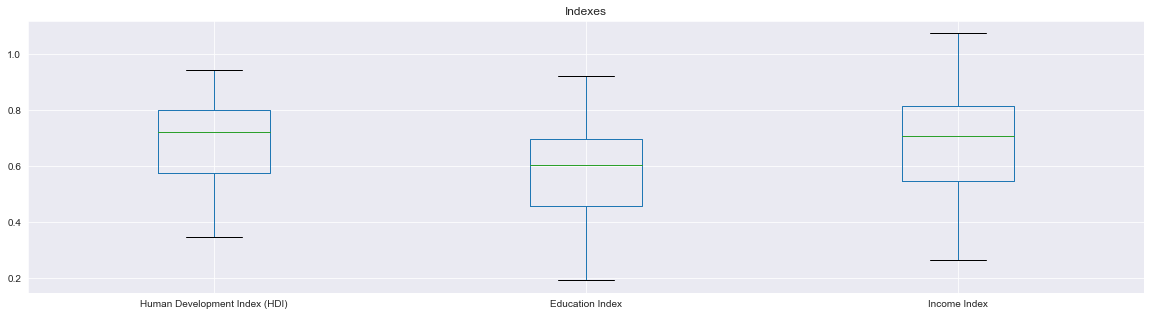

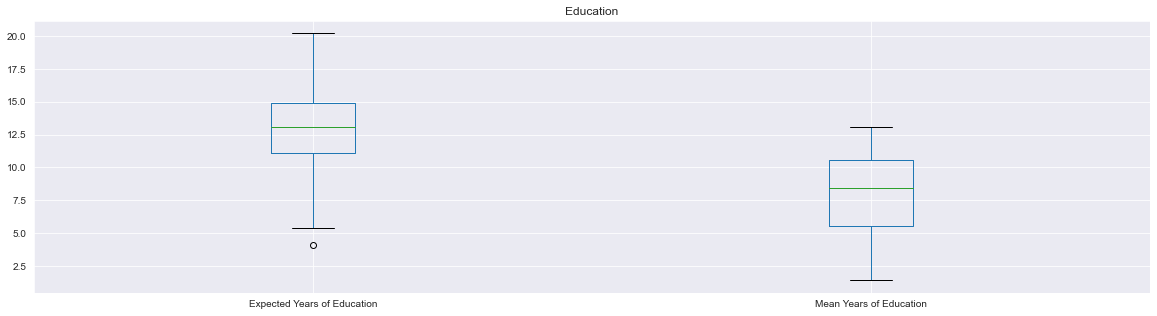

In [47]:
# Create boxplot of hdi, education index, and income index to compare them
hdi[['Human Development Index (HDI)', 'Education Index', 'Income Index']].plot(kind = 'box')
plt.title('Indexes')
# Create boxplot of education descriptive columns to compare
hdi[['Expected Years of Education', 'Mean Years of Education']].plot(kind = 'box')
plt.title('Education')

Text(0.5, 1.0, 'GNI Boxplot')

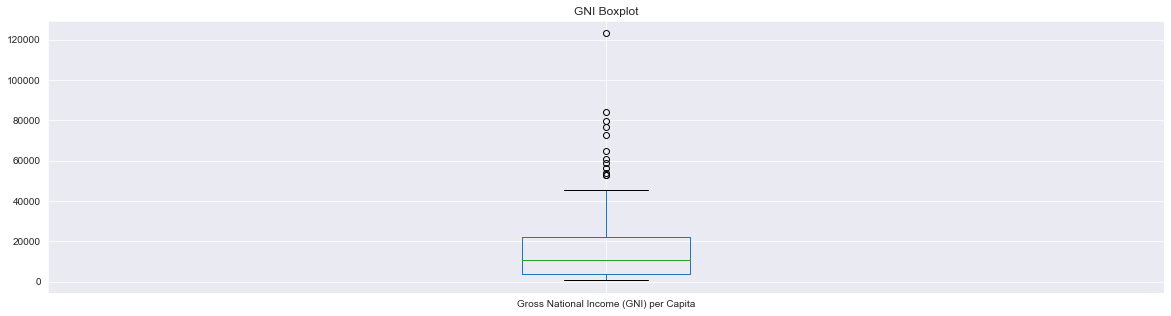

In [48]:
# Create boxplot to visualize GNI
hdi['Gross National Income (GNI) per Capita'].plot(kind = 'box')
plt.title('GNI Boxplot')

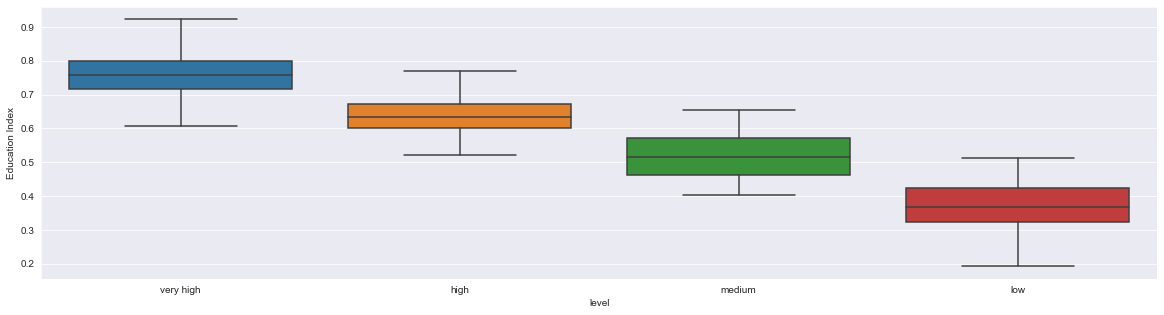

In [49]:
# Create graph with boxplot representing each hdi level for education index
ax = sns.boxplot(x="level", y="Education Index",data=hdi)
plt.show()

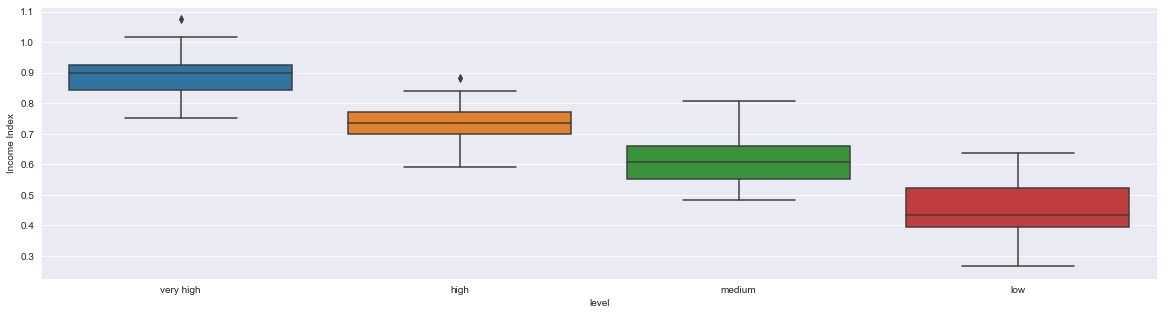

In [50]:
# Create graph with boxplot representing each hdi level for income index
ax = sns.boxplot(x="level", y="Income Index",data=hdi)# RUN PLOT   
plt.show()

## Inferential Stats on HDI

We are now looking for the relationship between Education Index and Income Index

## Overall HDI data

## Scatter Plots

[Text(0.5, 1.0, 'Education index vs. income index')]

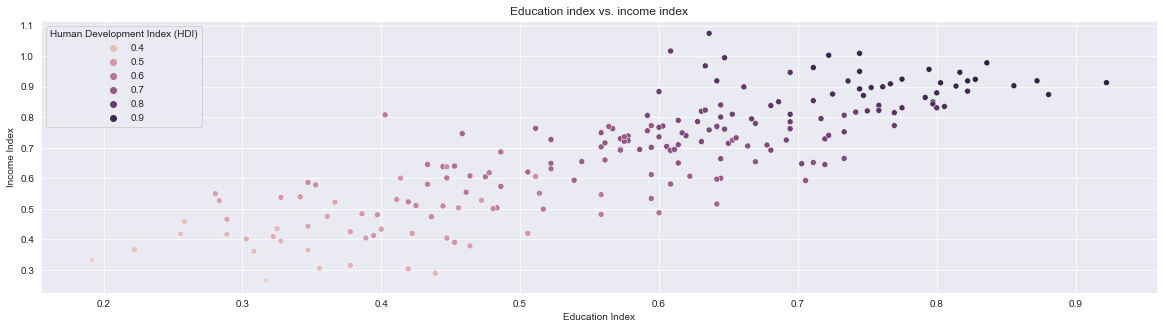

In [51]:
# Create scatter plot of Education Index vs. Income Index for all data
sns.scatterplot(x = 'Education Index', y = 'Income Index', data = hdi, hue = 'Human Development Index (HDI)').set(title= 'Education index vs. income index')


At first glance there appears to be a strong positve trend between Education Index and Income Index

There appaers to be a positive correlation between years of education and GNI until reach around $40000 per capita

[Text(0.5, 1.0, 'GNI vs. Education index')]

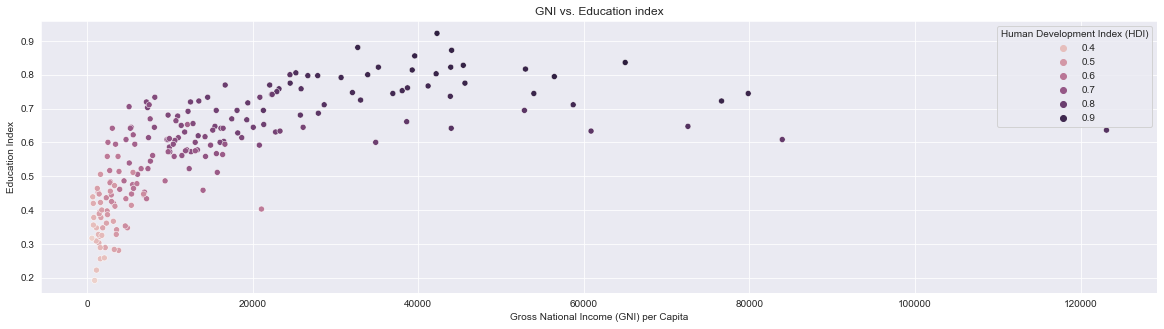

In [52]:
# GNI vs. education index
sns.scatterplot(y = 'Education Index', x = 'Gross National Income (GNI) per Capita', data = hdi, hue = 'Human Development Index (HDI)').set(title= 'GNI vs. Education index')

## Heat Map

<AxesSubplot:>

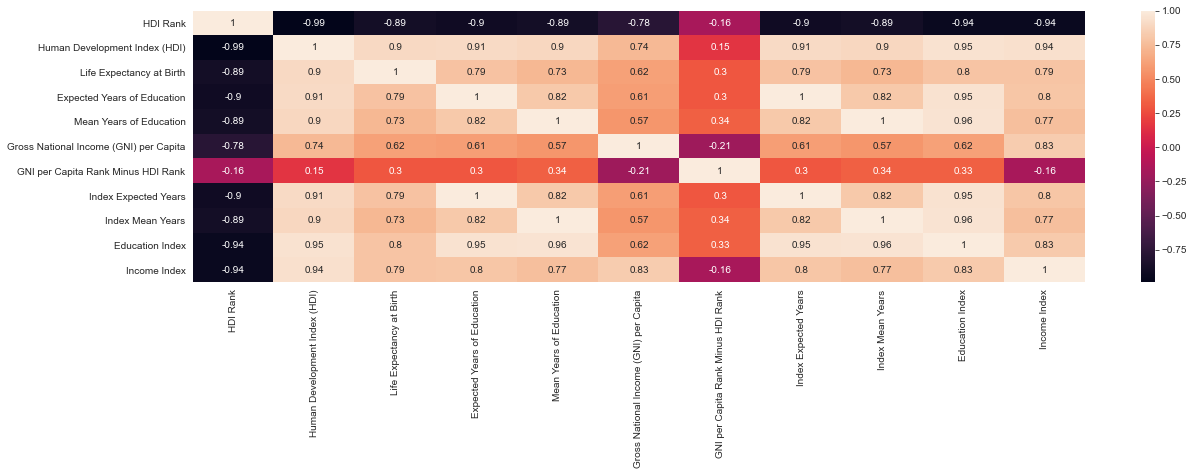

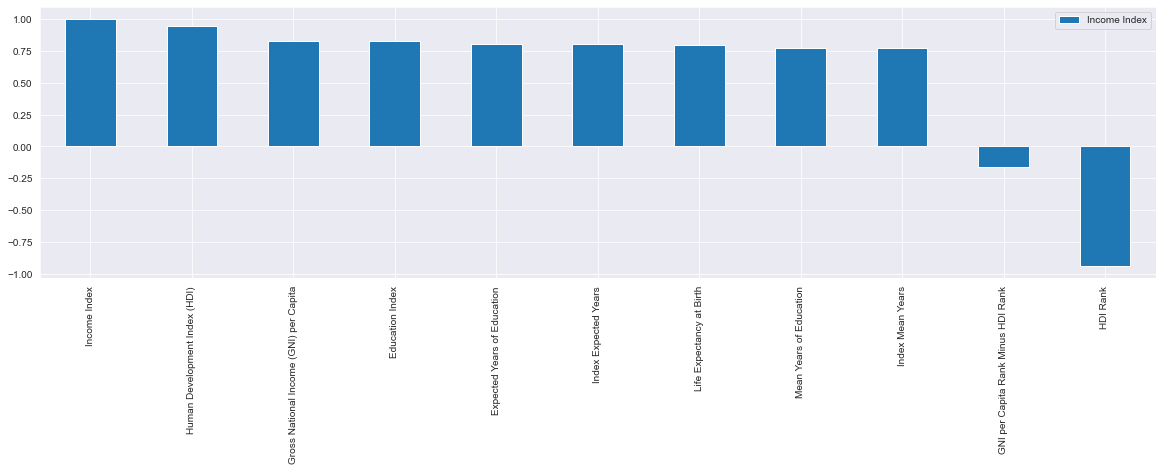

In [53]:
# Find Correlations between values we are interested in using heat map
# Compute pairwise correlation of columns
correlated_hdi = hdi.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_hdi, annot = True)

# Create bar plots to see correlations with income index 
sorted_correlated_df = correlated_hdi.sort_values('Income Index', ascending = False)
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

There is a high correlation between the education index and the income index (0.83). Expected Years of Education and Mean Years of Education also have a strong, positive correlation with Income Index, 0.8 & 0.77 respectively

## Regression Models

Find Regression Models. Our Independent variables are Expected years of education, mean years of education, & education index. Our dependent variables are GNI and income index

In [32]:
# Find regression model between independent and dependent variables as noted above
# Find regression model for independent variable: Education Index
# Find regression model for dependent variable: Income Index 
independent_variables = hdi['Education Index']
dependent_variables = hdi['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calcaulate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     414.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.79e-50
Time:                        16:15:48   Log-Likelihood:                 172.19
No. Observations:                 195   AIC:                            -340.4
Df Residuals:                     193   BIC:                            -333.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1358      0.028     

C:\Users\18607\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

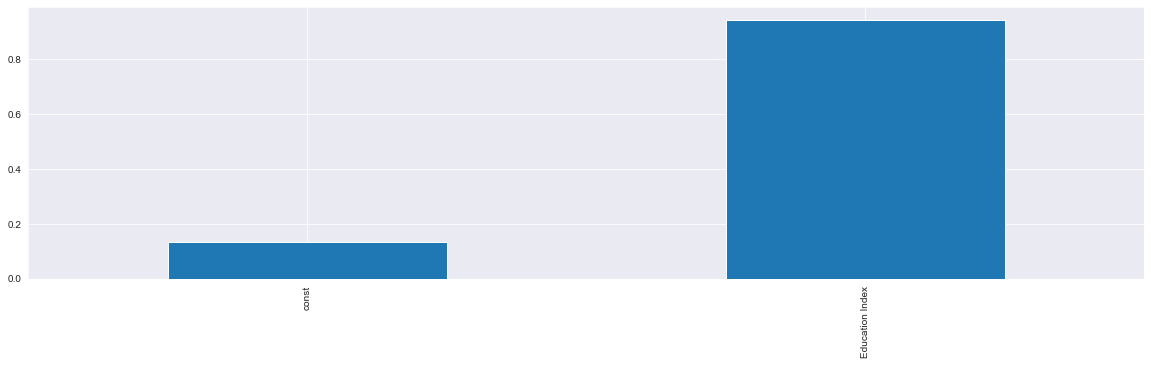

In [33]:
# Create panda core series from regression model paramaters
# Sort values
regression_params = regression_model.params.sort_values()

# Plot regression_params as bar chart
regression_params.plot(kind = 'bar', y = 'Income Index')

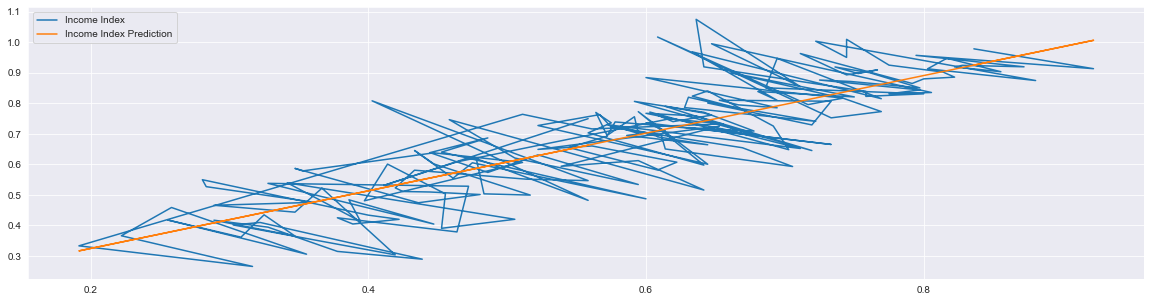

In [34]:
# Create a prediction model column based on independent variables in regression_model 
hdi['Income Index Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs income index
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(hdi['Education Index'], 
       hdi[['Income Index', 'Income Index Prediction']])

plt.legend(labels = ['Income Index', 'Income Index Prediction'])

plt.show()

In [35]:
# Find regression model between independent and dependent variables as noted above
# Find regression model for independent variable: Education Index
# Find regression model for dependent variable: Income Index 
independent_variables = hdi['Education Index']
dependent_variables = hdi['Gross National Income (GNI) per Capita']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calcaulate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Gross National Income (GNI) per Capita   R-squared:                       0.384
Model:                                                OLS   Adj. R-squared:                  0.381
Method:                                     Least Squares   F-statistic:                     120.2
Date:                                    Sun, 19 Dec 2021   Prob (F-statistic):           4.65e-22
Time:                                            16:16:20   Log-Likelihood:                -2145.0
No. Observations:                                     195   AIC:                             4294.
Df Residuals:                                         193   BIC:                             4301.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

C:\Users\18607\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

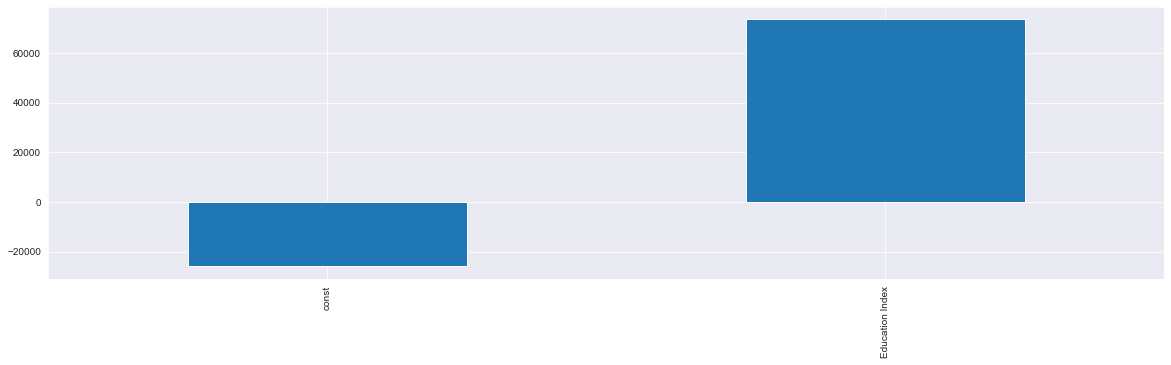

In [36]:
# Create panda core series from regression model paramaters
# Sort values
regression_params = regression_model.params.sort_values()

# Plot regression_params as bar chart
regression_params.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

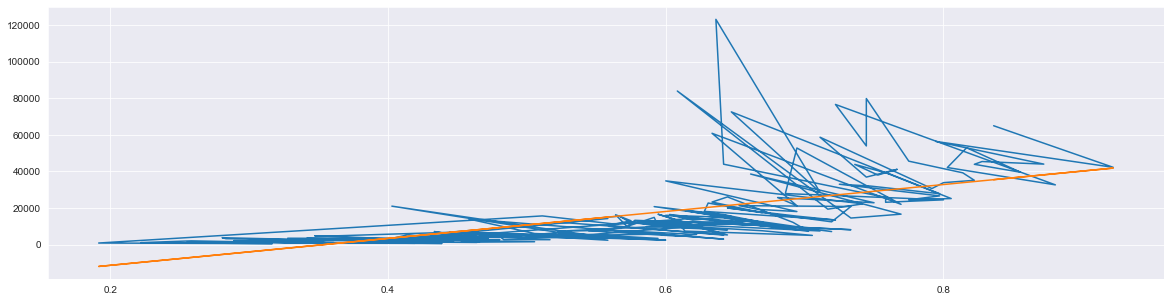

In [37]:
# Create a prediction model column based on independent variables in regression_model 
hdi['GNI Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs GNI
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(hdi['Education Index'], 
       hdi[['Gross National Income (GNI) per Capita', 'GNI Prediction']])

plt.show()

In [38]:
hdi.head()

HDI Rank      Country  Human Development Index (HDI)  \
0       1.0       Norway                          0.944   
1       2.0    Australia                          0.935   
2       3.0  Switzerland                          0.930   
3       4.0      Denmark                          0.923   
4       5.0  Netherlands                          0.922   

   Life Expectancy at Birth  Expected Years of Education  \
0                      81.6                         17.5   
1                      82.4                         20.2   
2                      83.0                         15.8   
3                      80.2                         18.7   
4                      81.6                         17.9   

   Mean Years of Education  Gross National Income (GNI) per Capita  \
0                     12.6                                 64992.0   
1                     13.0                                 42261.0   
2                     12.8                                 56431.0   
3                     12.7                                 44025.0   
4                     11.9                                 45435.0   

   GNI per Capita Rank Minus HDI Rank  Index Expected Years  Index Mean Years  \
0                                 5.0              0.972222          0.700000   
1                                17.0              1.122222          0.722222   
2                                 6.0              0.877778          0.711111   
3                                11.0              1.038889          0.705556   
4                                 9.0              0.994444          0.661111   

   Education Index  Income Index      level  Income Index Prediction  \
0         0.836111      0.978365  very high                 0.924982   
1         0.922222      0.913351  very high                 1.006258   
2         0.794444      0.957029  very high                 0.885655   
3         0.872222      0.919528  very high                 0.959066   
4         0.827778      0.924290  very high                 0.917117   

   GNI Prediction  
0    35521.421671  
1    41856.827953  
2    32455.902503  
3    38178.204951  
4    34908.317838

There is a connection between years of education and Income Index when looking at the data as a whole. Now we can move to the next branch in the issue tree and find how gender/sex affects the income index

## HDI Level Data

## Scatter plots

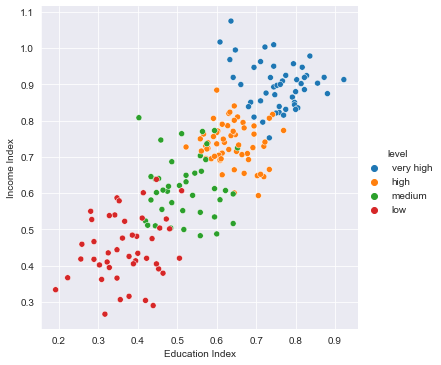

In [60]:
# Use seaborn to create scatter plot of Education Index vs. Income index
# Use level column to determine color of dots
ax = sns.relplot(x = 'Education Index',hue="level", y="Income Index",data=hdi, kind = 'scatter')# RUN PLOT   
plt.show()

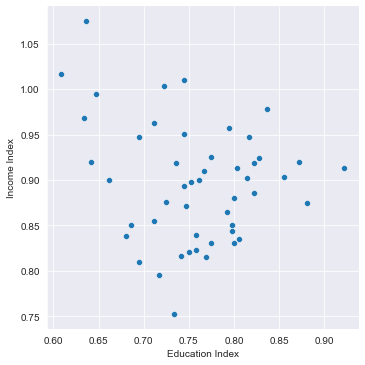

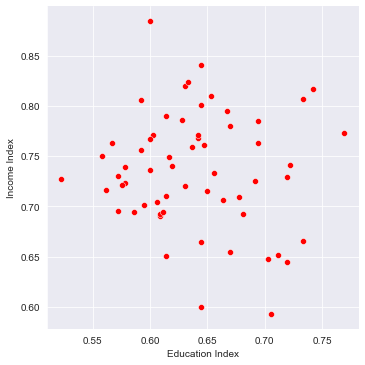

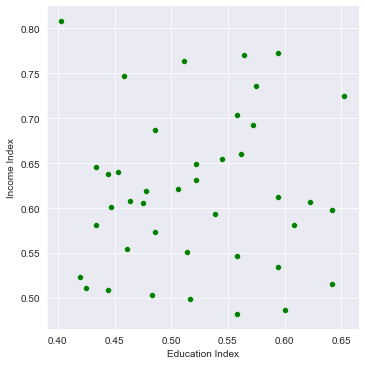

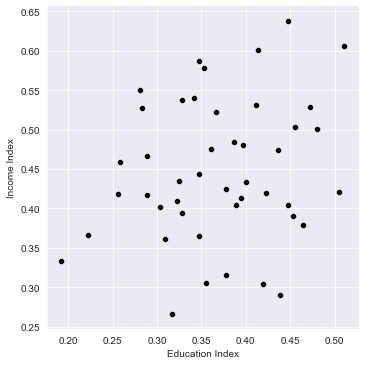

In [61]:
# Create scatter plot for each level df (very_high, high, ...) 
# Education Index vs. Income Index
ax = sns.relplot(x = 'Education Index', y="Income Index",data=very_high, kind = 'scatter')# RUN PLOT   
ax = sns.relplot(x = 'Education Index', y="Income Index",data=high, kind = 'scatter', color = 'r')# RUN PLOT   
ax = sns.relplot(x = 'Education Index', y="Income Index",data=medium, kind = 'scatter', color = 'g')# RUN PLOT   
ax = sns.relplot(x = 'Education Index', y="Income Index",data=low, kind = 'scatter', color = 'black')# RUN PLOT   

plt.show()

The data does not show any obvious trends when broken down into levels

## Heatmaps

<AxesSubplot:>

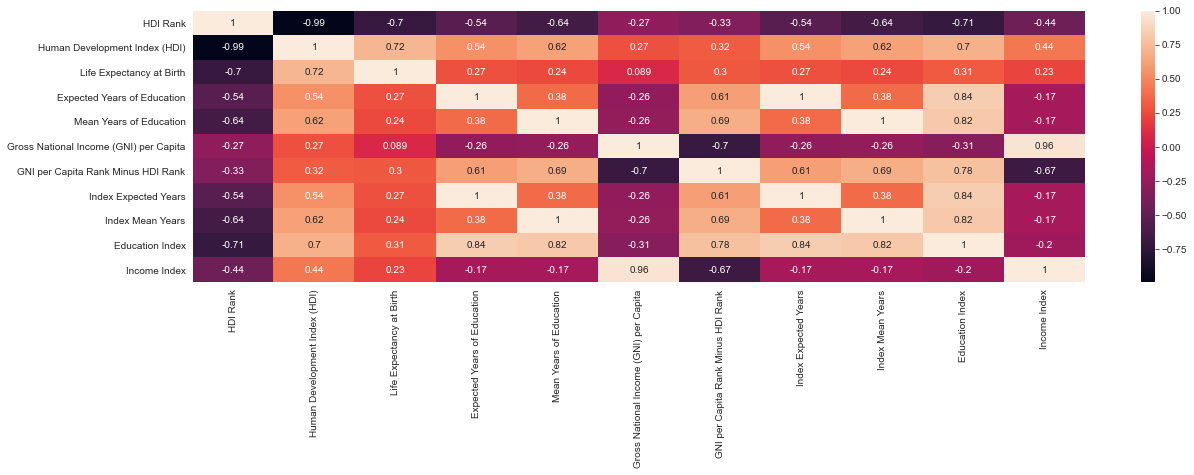

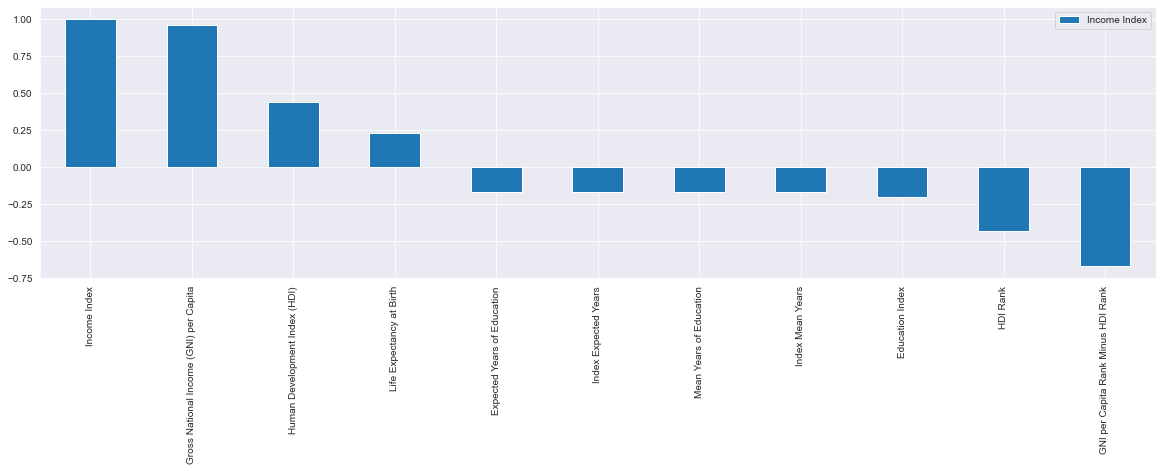

In [62]:
# very_high df
# Find Correlations between values we are interested in using heat map
correlated_vh = very_high.corr()
# Generate heatmap
sns.heatmap(correlated_vh, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_vh.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

<AxesSubplot:>

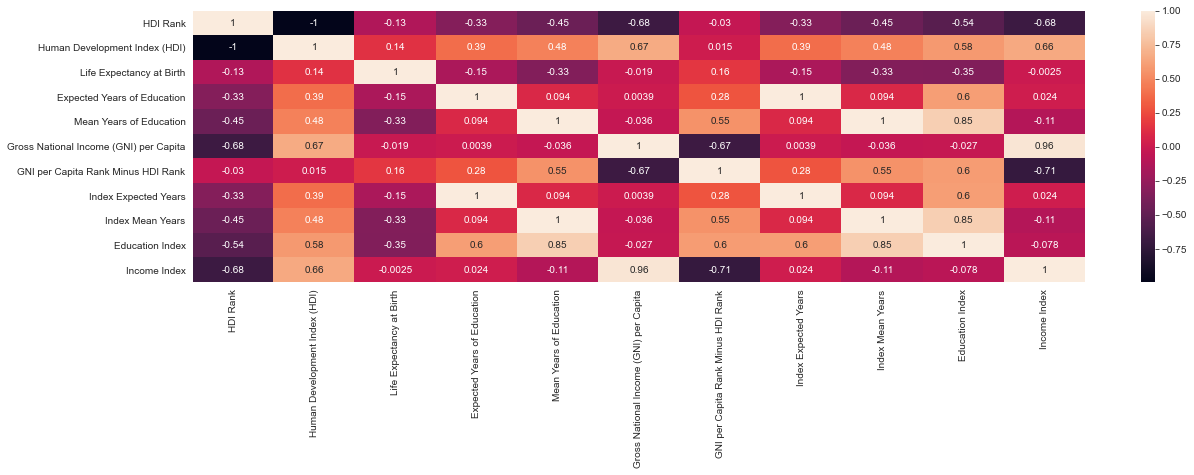

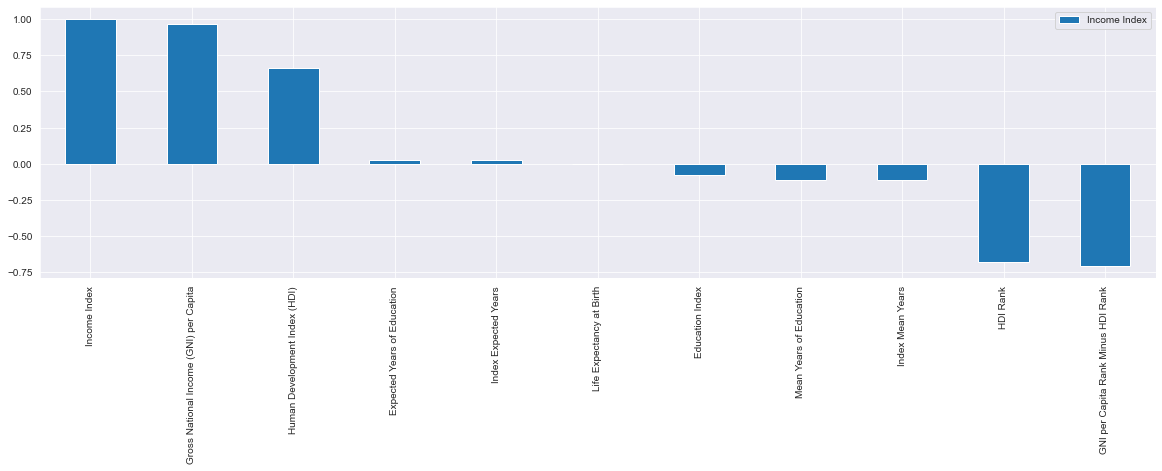

In [63]:
# high df
# Find Correlations between values we are interested in using heat map
correlated_h = high.corr()
# Generate heatmap
sns.heatmap(correlated_h, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_h.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

<AxesSubplot:>

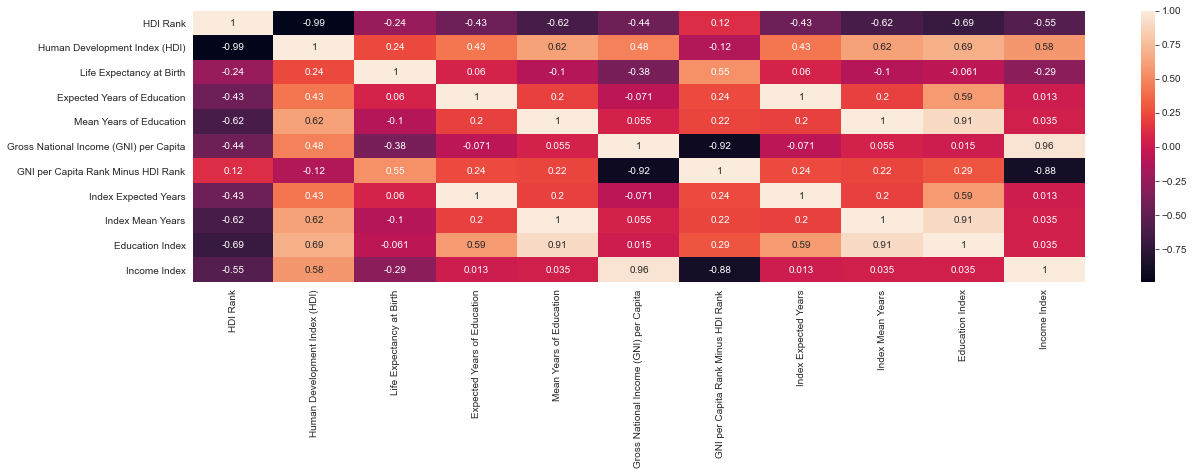

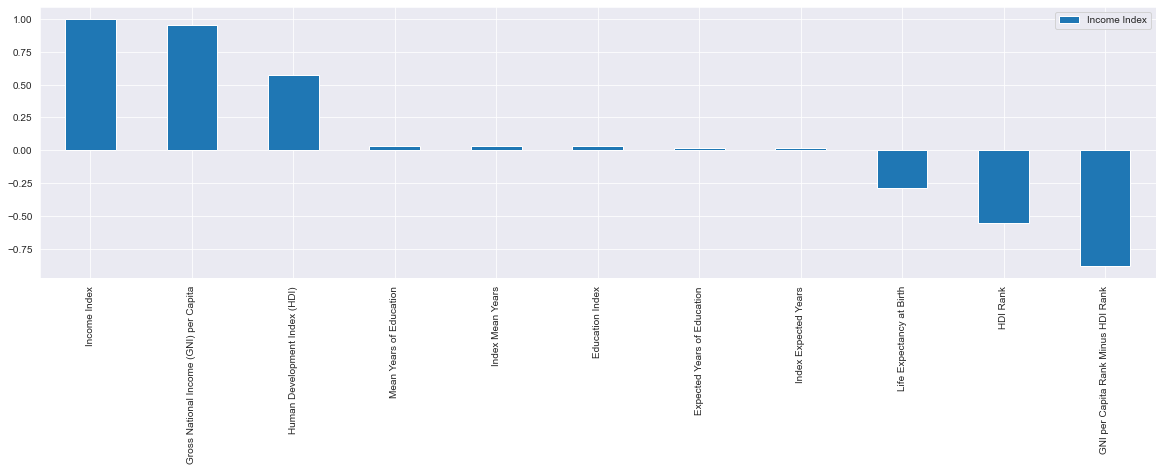

In [64]:
# medium df
# Find Correlations between values we are interested in using heat map
correlated_m = medium.corr()
# Generate heatmap
sns.heatmap(correlated_m, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_m.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

<AxesSubplot:>

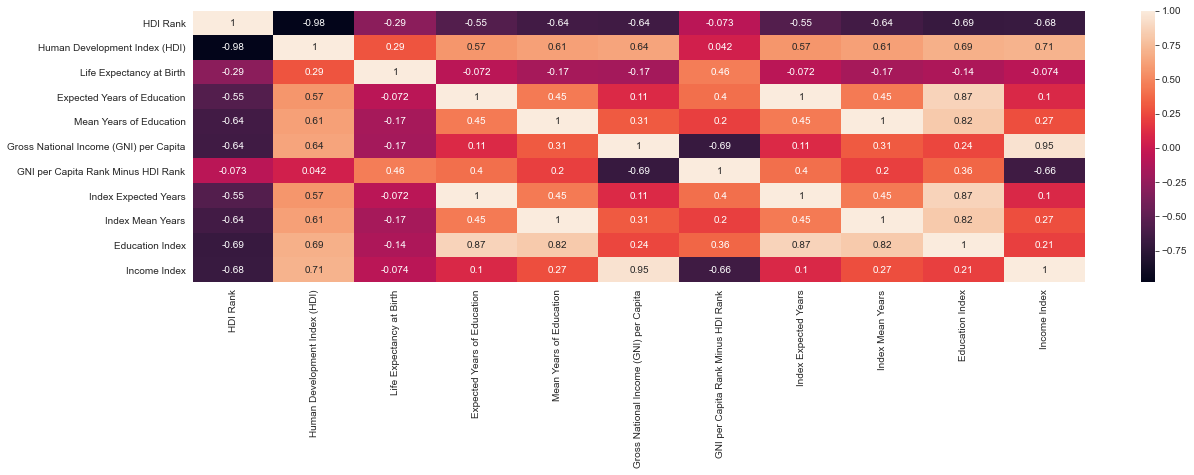

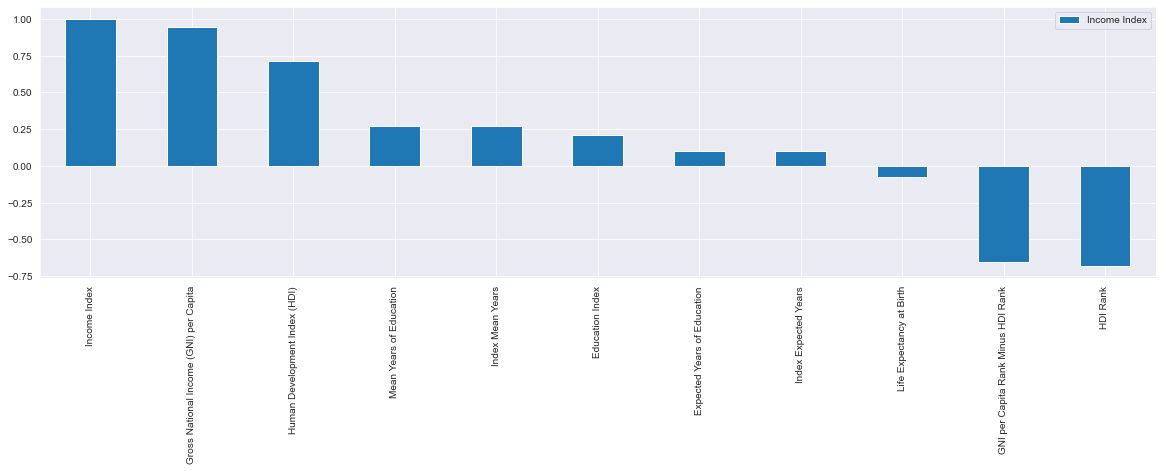

In [65]:
# low df
# Find Correlations between values we are interested in using heat map
correlated_l = low.corr()
# Generate heatmap
sns.heatmap(correlated_l, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_l.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

## Regression Analysis

In [66]:
# very_high df
# Find regression model between independent and dependent variables as noted above
# Find regression model for independent variable: Education Index
# Find regression model for dependent variable: Income Index 
independent_variables = very_high['Education Index']
dependent_variables = very_high['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.049
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.159
Time:                        16:46:47   Log-Likelihood:                 65.580
No. Observations:                  49   AIC:                            -127.2
Df Residuals:                      47   BIC:                            -123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0454      0.104     

The null hypothesis cannot be rejected because of the high p value

In [67]:
# high df
# Find regression model between independent and dependent variables as noted above
# Find regression model for independent variable: Education Index
# Find regression model for dependent variable: Income Index 
independent_variables = high['Education Index']
dependent_variables = high['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3586
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.552
Time:                        16:46:48   Log-Likelihood:                 86.259
No. Observations:                  60   AIC:                            -168.5
Df Residuals:                      58   BIC:                            -164.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7904      0.091     

The null hypothesis cannot be rejected because of the high p value

In [68]:
# medium df
# Find regression model between independent and dependent variables as noted above
# Find regression model for independent variable: Education Index
# Find regression model for dependent variable: Income Index 
independent_variables = medium['Education Index']
dependent_variables = medium['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.04658
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.830
Time:                        16:46:50   Log-Likelihood:                 42.525
No. Observations:                  41   AIC:                            -81.05
Df Residuals:                      39   BIC:                            -77.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5955      0.106     

The null hypothesis cannot be rejected because of the high p value

In [69]:
# low df
# Find regression model between independent and dependent variables as noted above
# Find regression model for independent variable: Education Index
# Find regression model for dependent variable: Income Index 
independent_variables = low['Education Index']
dependent_variables = low['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.987
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.166
Time:                        16:46:51   Log-Likelihood:                 45.933
No. Observations:                  45   AIC:                            -87.87
Df Residuals:                      43   BIC:                            -84.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3534      0.068     

The null hypothesis cannot be rejected because of the high p value

## GDI Descriptive Analysis

Join HDI df and GDI df and drop rows where there is no data for the columns we are interested in

New columns of interest: Gender Development Index (GDI), Human Development Index (Female/Male), Expected Years of Education (F/M), Mean Years of Education (F/M), GNI(F/M)

In [70]:
# Describe the df
print(gdi.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 187
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   HDI Rank                                             161 non-null    float64
 1   Country                                              168 non-null    object 
 2   Human Development Index (HDI)                        168 non-null    float64
 3   Life Expectancy at Birth                             168 non-null    float64
 4   Expected Years of Education                          168 non-null    float64
 5   Mean Years of Education                              168 non-null    float64
 6   Gross National Income (GNI) per Capita               168 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank                   161 non-null    float64
 8   Index Expected Years                                 168 non-null    f

____________________________________________________________________________________________________________________________

MEAN & MEDIAN

____________________________________________________________________________________________________________________________

In [71]:
# Start with finding the mean & median of GDI Values per country OVERALL
gdi_interest = ['Gender Development Index (GDI)', 'Human Development Index (Female)', 
            'Human Development Index (Male)', 'Expected Years of Education (Female)', 'Expected Years of Education (Male)', 
            'Mean Years of Education (Female)', 'Mean Years of Education (Male)', 
            'Estimated Gross National Income per Capita (Female)', 'Estimated Gross National Income per Capita (Male)', 
           'Education Index (Female)', 'Education Index (Male)', 'Income Index (Female)', 'Income Index (Male)']
# itereate through gdi to find the mean and median for the values in gdi_interest
for i in gdi_interest:
    mean = round(np.mean(gdi[i]),2)
    median = round(np.median(gdi[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Gender Development Index (GDI) Mean : 0.93
Gender Development Index (GDI) Median: 0.95
Human Development Index (Female) Mean : 0.67
Human Development Index (Female) Median: 0.71
Human Development Index (Male) Mean : 0.72
Human Development Index (Male) Median: 0.73
Expected Years of Education (Female) Mean : 13.16
Expected Years of Education (Female) Median: 13.6
Expected Years of Education (Male) Mean : 13.05
Expected Years of Education (Male) Median: 13.1
Mean Years of Education (Female) Mean : 7.75
Mean Years of Education (Female) Median: 8.3
Mean Years of Education (Male) Mean : 8.6
Mean Years of Education (Male) Median: 8.6
Estimated Gross National Income per Capita (Female) Mean : 12074.52
Estimated Gross National Income per Capita (Female) Median: 7549.5
Estimated Gross National Income per Capita (Male) Mean : 22142.01
Estimated Gross National Income per Capita (Male) Median: 14774.5
Education Index (Female) Mean : 0.58
Education Index (Female) Median: 0.61
Education Index (Male)

In [72]:
# Find the mean & median of GDI Values per country that are in very_high_gdi
for i in gdi_interest:
    mean = round(np.mean(very_high_gdi[i]),2)
    median = round(np.median(very_high_gdi[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Gender Development Index (GDI) Mean : 0.97
Gender Development Index (GDI) Median: 0.98
Human Development Index (Female) Mean : 0.86
Human Development Index (Female) Median: 0.86
Human Development Index (Male) Mean : 0.88
Human Development Index (Male) Median: 0.88
Expected Years of Education (Female) Mean : 16.56
Expected Years of Education (Female) Median: 16.4
Expected Years of Education (Male) Mean : 15.76
Expected Years of Education (Male) Median: 15.6
Mean Years of Education (Female) Mean : 11.02
Mean Years of Education (Female) Median: 11.3
Mean Years of Education (Male) Mean : 11.35
Mean Years of Education (Male) Median: 11.9
Estimated Gross National Income per Capita (Female) Mean : 28832.23
Estimated Gross National Income per Capita (Female) Median: 24309.0
Estimated Gross National Income per Capita (Male) Mean : 50901.53
Estimated Gross National Income per Capita (Male) Median: 46018.0
Education Index (Female) Mean : 0.77
Education Index (Female) Median: 0.76
Education Index 

In [73]:
# Find the mean & median of GDI Values per country that are in high_gdi
for i in gdi_interest:
    mean = round(np.mean(high_gdi[i]),2)
    median = round(np.median(high_gdi[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Gender Development Index (GDI) Mean : 0.96
Gender Development Index (GDI) Median: 0.96
Human Development Index (Female) Mean : 0.73
Human Development Index (Female) Median: 0.73
Human Development Index (Male) Mean : 0.76
Human Development Index (Male) Median: 0.76
Expected Years of Education (Female) Mean : 14.15
Expected Years of Education (Female) Median: 14.0
Expected Years of Education (Male) Mean : 13.45
Expected Years of Education (Male) Median: 13.4
Mean Years of Education (Female) Mean : 8.94
Mean Years of Education (Female) Median: 9.0
Mean Years of Education (Male) Mean : 9.38
Mean Years of Education (Male) Median: 9.3
Estimated Gross National Income per Capita (Female) Mean : 9309.63
Estimated Gross National Income per Capita (Female) Median: 9029.0
Estimated Gross National Income per Capita (Male) Mean : 18142.53
Estimated Gross National Income per Capita (Male) Median: 17033.0
Education Index (Female) Mean : 0.64
Education Index (Female) Median: 0.63
Education Index (Male)

In [74]:
# Find the mean & median of GDI Values per country that are in medium_gdi
for i in gdi_interest:
    mean = round(np.mean(medium_gdi[i]),2)
    median = round(np.median(medium_gdi[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Gender Development Index (GDI) Mean : 0.91
Gender Development Index (GDI) Median: 0.92
Human Development Index (Female) Mean : 0.6
Human Development Index (Female) Median: 0.6
Human Development Index (Male) Mean : 0.65
Human Development Index (Male) Median: 0.65
Expected Years of Education (Female) Mean : 11.61
Expected Years of Education (Female) Median: 11.45
Expected Years of Education (Male) Mean : 11.8
Expected Years of Education (Male) Median: 11.7
Mean Years of Education (Female) Mean : 6.27
Mean Years of Education (Female) Median: 5.7
Mean Years of Education (Male) Mean : 7.5
Mean Years of Education (Male) Median: 7.35
Estimated Gross National Income per Capita (Female) Mean : 4234.68
Estimated Gross National Income per Capita (Female) Median: 3948.5
Estimated Gross National Income per Capita (Male) Mean : 8856.18
Estimated Gross National Income per Capita (Male) Median: 7628.0
Education Index (Female) Mean : 0.5
Education Index (Female) Median: 0.5
Education Index (Male) Mean 

In [75]:
# Find the mean & median of GDI Values per country that are in low_gdi
for i in gdi_interest:
    mean = round(np.mean(low_gdi[i]),2)
    median = round(np.median(low_gdi[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Gender Development Index (GDI) Mean : 0.84
Gender Development Index (GDI) Median: 0.84
Human Development Index (Female) Mean : 0.42
Human Development Index (Female) Median: 0.43
Human Development Index (Male) Mean : 0.5
Human Development Index (Male) Median: 0.51
Expected Years of Education (Female) Mean : 8.67
Expected Years of Education (Female) Median: 8.7
Expected Years of Education (Male) Mean : 10.04
Expected Years of Education (Male) Median: 10.0
Mean Years of Education (Female) Mean : 3.24
Mean Years of Education (Female) Median: 2.8
Mean Years of Education (Male) Mean : 4.98
Mean Years of Education (Male) Median: 5.2
Estimated Gross National Income per Capita (Female) Mean : 1505.09
Estimated Gross National Income per Capita (Female) Median: 1325.0
Estimated Gross National Income per Capita (Male) Mean : 2811.91
Estimated Gross National Income per Capita (Male) Median: 2043.0
Education Index (Female) Mean : 0.33
Education Index (Female) Median: 0.32
Education Index (Male) Mean

____________________________________________________________________________________________________________________________

SPREAD

____________________________________________________________________________________________________________________________

In [76]:
# Find spread
# IQR for OVERALL GDI data

# Define Q1 & Q3
q1 = gdi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = gdi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR, lower limit, and upper limit for columns we are interested in
for i in gdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Gender Development Index (GDI) IQR is:   0.08, Lower limit is:   0.77, and upper limit is:   1.1
Human Development Index (Female) IQR is:   0.27, Lower limit is:   0.14, and upper limit is:   1.21
Human Development Index (Male) IQR is:   0.22, Lower limit is:   0.28, and upper limit is:   1.16
Expected Years of Education (Female) IQR is:   4.6, Lower limit is:   4.0, and upper limit is:   22.4
Expected Years of Education (Male) IQR is:   3.42, Lower limit is:   6.17, and upper limit is:   19.85
Mean Years of Education (Female) IQR is:   5.48, Lower limit is:   -3.17, and upper limit is:   18.74
Mean Years of Education (Male) IQR is:   4.5, Lower limit is:   -0.3, and upper limit is:   17.7
Estimated Gross National Income per Capita (Female) IQR is:   14841.0, Lower limit is:   -19775.75, and upper limit is:   39588.25
Estimated Gross National Income per Capita (Male) IQR is:   24743.25, Lower limit is:   -31616.88, and upper limit is:   67356.12
Education Index (Female) IQR is:   0.28,

In [77]:
# Overall GDI Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers

outliers = gdi[((gdi < lower_limit) | ((gdi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in gdi')

# Count original amount of rows
count = gdi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in gdi is within the IQR')

There are 23 outliers in gdi
86.31% of the data in gdi is within the IQR


SPREAD BY HDI LEVEL

In [78]:
# Find spread
# IQR for very_high_gdi data

# Define Q1 & Q3
q1 = very_high_gdi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = very_high_gdi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Gender Development Index (GDI) IQR is:   0.03, Lower limit is:   0.92, and upper limit is:   1.03
Human Development Index (Female) IQR is:   0.06, Lower limit is:   0.74, and upper limit is:   0.98
Human Development Index (Male) IQR is:   0.08, Lower limit is:   0.72, and upper limit is:   1.04
Expected Years of Education (Female) IQR is:   2.05, Lower limit is:   12.42, and upper limit is:   20.62
Expected Years of Education (Male) IQR is:   1.8, Lower limit is:   12.05, and upper limit is:   19.25
Mean Years of Education (Female) IQR is:   2.4, Lower limit is:   6.3, and upper limit is:   15.9
Mean Years of Education (Male) IQR is:   2.2, Lower limit is:   7.0, and upper limit is:   15.8
Estimated Gross National Income per Capita (Female) IQR is:   14221.0, Lower limit is:   -1265.5, and upper limit is:   55618.5
Estimated Gross National Income per Capita (Male) IQR is:   27376.0, Lower limit is:   -8206.5, and upper limit is:   101297.5
Education Index (Female) IQR is:   0.1, Lower 

In [79]:
# very_high_gdi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = very_high_gdi[((very_high_gdi < lower_limit) | ((very_high_gdi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in very_high_gdi df')

# Count original amount of rows
count = very_high_gdi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in very_high_gdi df is within the IQR')

There are 9 outliers in very_high_gdi df
80.85% of the data in very_high_gdi df is within the IQR


In [80]:
# Find spread
# IQR for high_gdi data

# Define Q1 & Q3
q1 = high_gdi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = high_gdi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Gender Development Index (GDI) IQR is:   0.05, Lower limit is:   0.87, and upper limit is:   1.07
Human Development Index (Female) IQR is:   0.05, Lower limit is:   0.63, and upper limit is:   0.83
Human Development Index (Male) IQR is:   0.05, Lower limit is:   0.66, and upper limit is:   0.86
Expected Years of Education (Female) IQR is:   1.65, Lower limit is:   10.88, and upper limit is:   17.48
Expected Years of Education (Male) IQR is:   1.15, Lower limit is:   11.08, and upper limit is:   15.68
Mean Years of Education (Female) IQR is:   2.85, Lower limit is:   3.38, and upper limit is:   14.78
Mean Years of Education (Male) IQR is:   2.5, Lower limit is:   4.4, and upper limit is:   14.4
Estimated Gross National Income per Capita (Female) IQR is:   4687.0, Lower limit is:   -750.5, and upper limit is:   17997.5
Estimated Gross National Income per Capita (Male) IQR is:   9070.5, Lower limit is:   -354.25, and upper limit is:   35927.75
Education Index (Female) IQR is:   0.1, Lower

In [81]:
# high_gdi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = high_gdi[((high_gdi < lower_limit) | ((high_gdi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in high_gdi df')

# Count original amount of rows
count = high_gdi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in high_gdi df is within the IQR')

There are 8 outliers in high_gdi df
84.31% of the data in high_gdi df is within the IQR


In [82]:
# Find spread
# IQR for medium_gdi data
q1 = medium_gdi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = medium_gdi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Gender Development Index (GDI) IQR is:   0.08, Lower limit is:   0.75, and upper limit is:   1.07
Human Development Index (Female) IQR is:   0.09, Lower limit is:   0.41, and upper limit is:   0.77
Human Development Index (Male) IQR is:   0.06, Lower limit is:   0.54, and upper limit is:   0.77
Expected Years of Education (Female) IQR is:   1.67, Lower limit is:   8.32, and upper limit is:   15.0
Expected Years of Education (Male) IQR is:   1.0, Lower limit is:   9.8, and upper limit is:   13.8
Mean Years of Education (Female) IQR is:   3.7, Lower limit is:   -0.95, and upper limit is:   13.85
Mean Years of Education (Male) IQR is:   2.85, Lower limit is:   1.6, and upper limit is:   13.0
Estimated Gross National Income per Capita (Female) IQR is:   3028.0, Lower limit is:   -2242.25, and upper limit is:   9869.75
Estimated Gross National Income per Capita (Male) IQR is:   5536.75, Lower limit is:   -3593.12, and upper limit is:   18553.88
Education Index (Female) IQR is:   0.14, Lower

In [83]:
# medium_gdi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = medium_gdi[((medium_gdi < lower_limit) | ((medium_gdi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in medium_gdi df')

# Count original amount of rows
count = medium_gdi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in medium_gdi df is within the IQR')

There are 7 outliers in medium_gdi df
79.41% of the data in medium_gdi df is within the IQR


In [84]:
# Find spread
# IQR for low_gdi data

# Define Q1 & Q3
q1 = low_gdi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = low_gdi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gdi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Gender Development Index (GDI) IQR is:   0.09, Lower limit is:   0.66, and upper limit is:   1.02
Human Development Index (Female) IQR is:   0.09, Lower limit is:   0.25, and upper limit is:   0.6
Human Development Index (Male) IQR is:   0.08, Lower limit is:   0.35, and upper limit is:   0.66
Expected Years of Education (Female) IQR is:   2.5, Lower limit is:   3.7, and upper limit is:   13.7
Expected Years of Education (Male) IQR is:   1.95, Lower limit is:   6.02, and upper limit is:   13.82
Mean Years of Education (Female) IQR is:   2.6, Lower limit is:   -2.0, and upper limit is:   8.4
Mean Years of Education (Male) IQR is:   2.4, Lower limit is:   0.15, and upper limit is:   9.75
Estimated Gross National Income per Capita (Female) IQR is:   850.5, Lower limit is:   -356.75, and upper limit is:   3045.25
Estimated Gross National Income per Capita (Male) IQR is:   2211.0, Lower limit is:   -1848.5, and upper limit is:   6995.5
Education Index (Female) IQR is:   0.13, Lower limit is

In [85]:
# low_gdi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = low_gdi[((low_gdi < lower_limit) | ((low_gdi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in low_gdi df')
# Count original amount of rows
count = low_gdi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in low_gdi df is within the IQR')

There are 5 outliers in low_gdi df
85.71% of the data in low_gdi df is within the IQR


____________________________________________________________________________________________________________________________

BOXPLOTS

____________________________________________________________________________________________________________________________

Text(0.5, 1.0, 'Income Index Comparison')

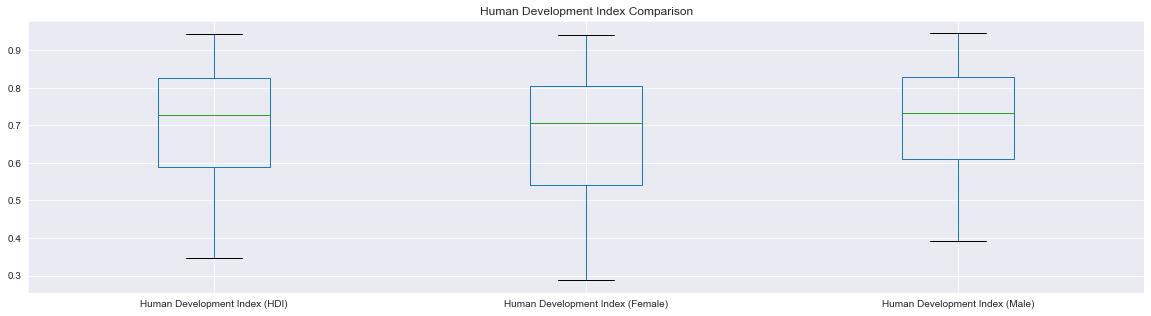

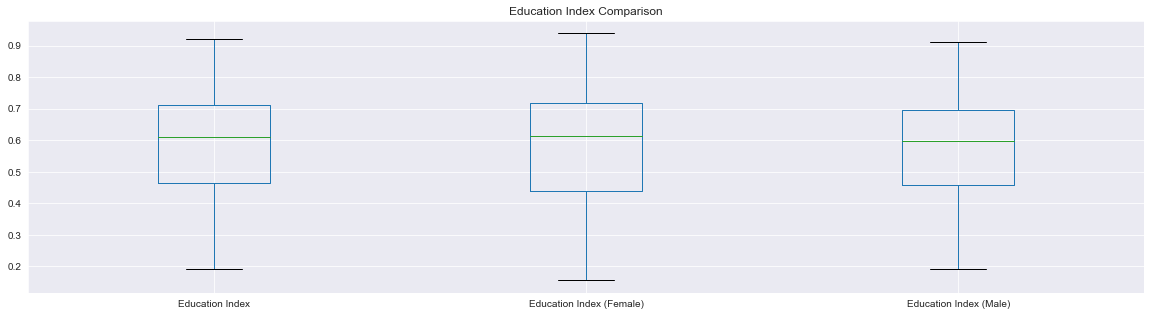

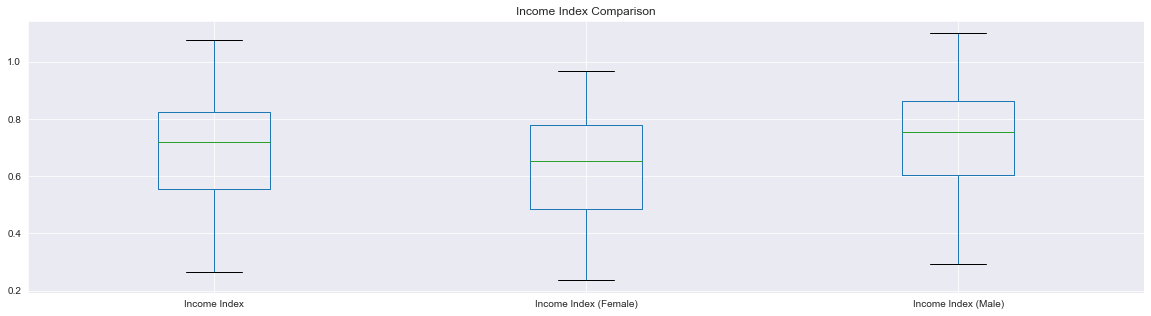

In [86]:
# Construct boxplots to show index distrubution by sex
# Overall GDI data

# Human Development Index vs. HDI for female and male
gdi[['Human Development Index (HDI)', 'Human Development Index (Female)', 'Human Development Index (Male)']].plot(kind = 'box')
plt.title('Human Development Index Comparison')

# Education Index vs. HDI for female and male
gdi[['Education Index', 'Education Index (Female)', 'Education Index (Male)']].plot(kind = 'box')
plt.title('Education Index Comparison')

# Income Index vs. HDI for female and male
gdi[['Income Index', 'Income Index (Female)', 'Income Index (Male)']].plot(kind = 'box')
plt.title('Income Index Comparison')


Text(0.5, 1.0, 'Years  of Education')

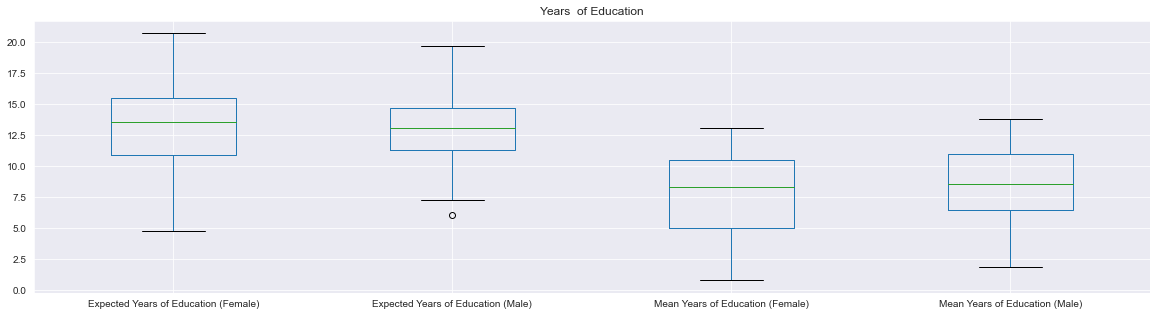

In [87]:
# Construct boxplots to show education specific distrubutions by sex
# Overall GDI data

# Expected and mean years of education vs. HDI for female and male
gdi[['Expected Years of Education (Female)', 'Expected Years of Education (Male)','Mean Years of Education (Female)', 'Mean Years of Education (Male)']].plot(kind = 'box')
plt.title('Years  of Education')

Text(0.5, 1.0, 'Estimated Gross National Income per Capita')

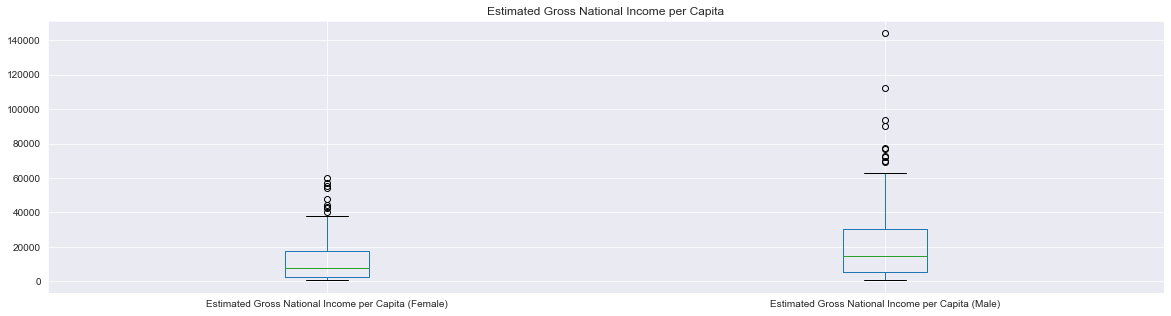

In [88]:
# Construct boxplots to show income specific distrubutions by sex
# Overall GDI data

# GDI distribution for female and male
gdi[['Estimated Gross National Income per Capita (Female)', 'Estimated Gross National Income per Capita (Male)']].plot(kind = 'box')
plt.title('Estimated Gross National Income per Capita')

BOXPLOTS BY HDI LEVEL

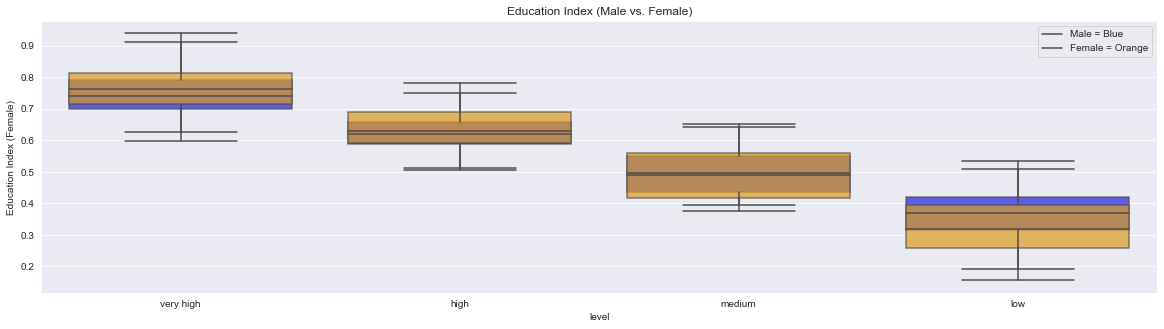

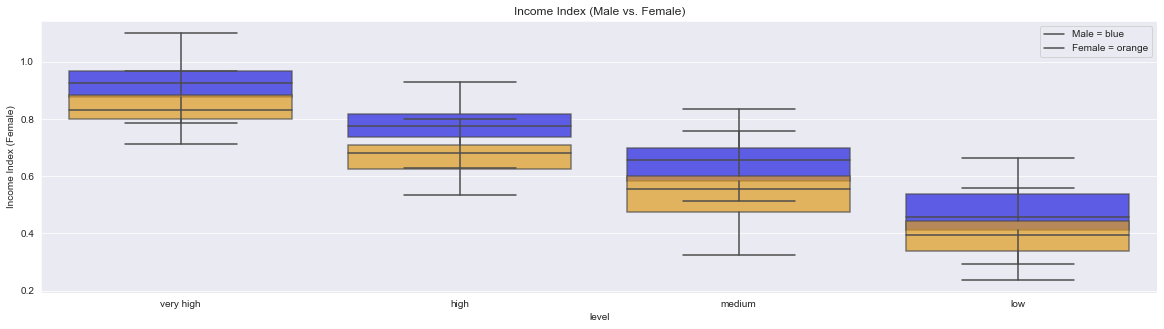

In [24]:
# Create graph with boxplot that compares education index between sexes per hdi level
ax = sns.boxplot(x="level", y='Education Index (Male)',data=gdi, color = 'b', boxprops=dict(alpha=.7))
ax = sns.boxplot(x="level", y='Education Index (Female)',data=gdi, color = 'orange', boxprops=dict(alpha=.7))

# Add title and legend
plt.title('Education Index (Male vs. Female)')
plt.legend(labels = ['Male = Blue', 'Female = Orange'])

# Show plot
plt.show()

# Create graph with boxplot that compares income index between sexes per hdi level
ax = sns.boxplot(x="level", y='Income Index (Male)',data=gdi, color = 'b', boxprops=dict(alpha=.7))
ax = sns.boxplot(x="level", y='Income Index (Female)',data=gdi, color = 'orange', boxprops=dict(alpha=.7))

# Add title and legend
plt.title('Income Index (Male vs. Female)')
plt.legend(labels = ['Male = blue', 'Female = orange'])

# Show plot
plt.show()

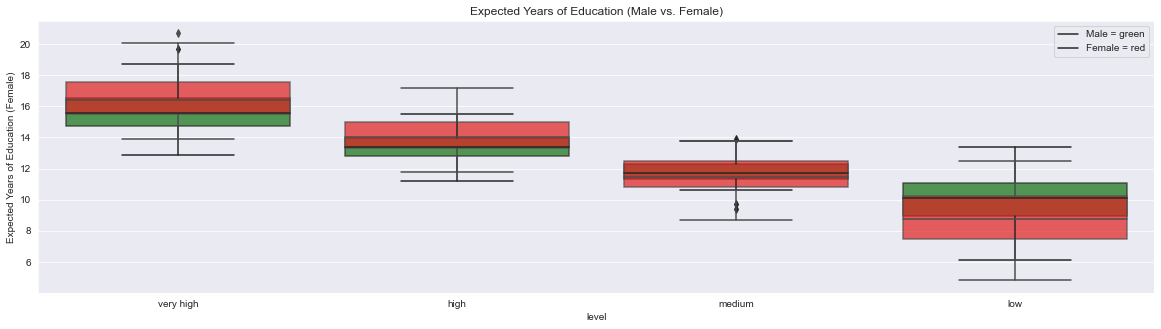

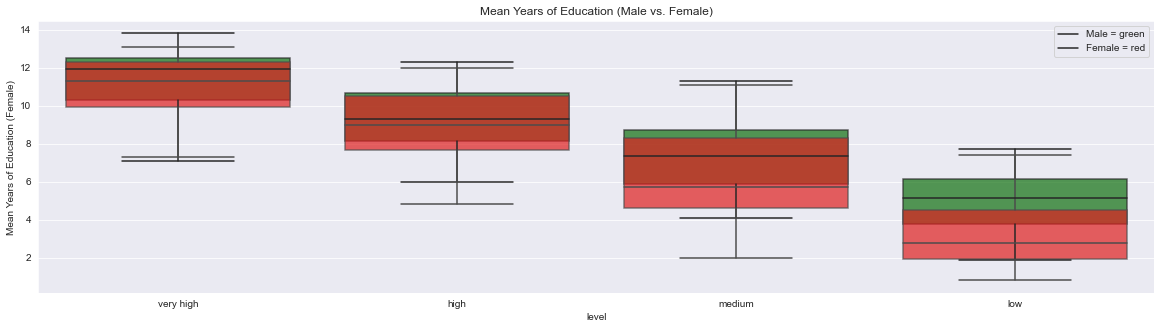

In [90]:
# Create graph with boxplot that compares expected years of education between sexes per hdi level
ax = sns.boxplot(x="level", y='Expected Years of Education (Male)',data=gdi, color = 'g', boxprops=dict(alpha=.7))
ax = sns.boxplot(x="level", y='Expected Years of Education (Female)',data=gdi, color = 'r', boxprops=dict(alpha=.7))

# Add title and legend
plt.title('Expected Years of Education (Male vs. Female)')
plt.legend(labels = ['Male = green', 'Female = red'])

plt.show()

# Create graph with boxplot that compares mean years of education between sexes per hdi level
ax = sns.boxplot(x="level", y='Mean Years of Education (Male)',data=gdi, color = 'g', boxprops=dict(alpha=.7))
ax = sns.boxplot(x="level", y='Mean Years of Education (Female)',data=gdi, color = 'r', boxprops=dict(alpha=.7))

# Add title and legend
plt.title('Mean Years of Education (Male vs. Female)')
plt.legend(labels = ['Male = green', 'Female = red'])

# Show plot
plt.show()

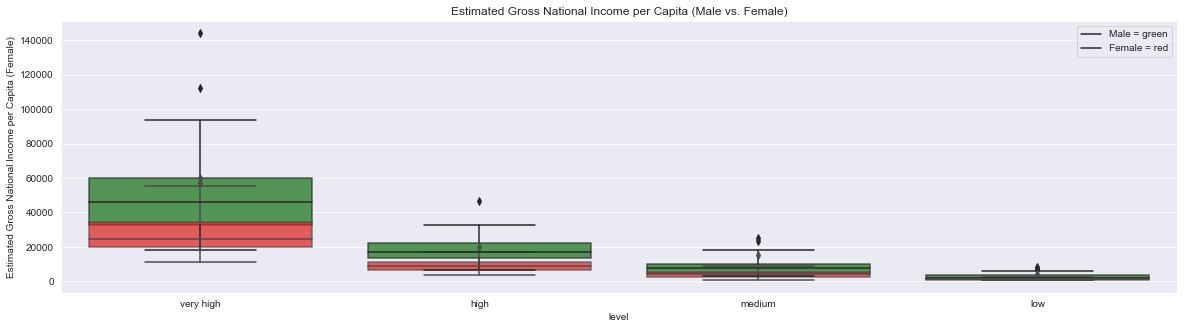

In [91]:
# Create graph with boxplot that compares estimated GNI per Capita between sexes per hdi level
ax = sns.boxplot(x="level", y='Estimated Gross National Income per Capita (Male)',data=gdi, color = 'g', boxprops=dict(alpha=.7))
ax = sns.boxplot(x="level", y='Estimated Gross National Income per Capita (Female)',data=gdi, color = 'r', boxprops=dict(alpha=.7))

# Add title and legend
plt.title('Estimated Gross National Income per Capita (Male vs. Female)')
plt.legend(labels = ['Male = green', 'Female = red'])

# Show plot
plt.show()

## Inferential Statistics

____________________________________________________________________________________________________________________________

SCATTER PLOTS

____________________________________________________________________________________________________________________________

OVERALL DATA

Text(0.5, 0, 'Education Index')

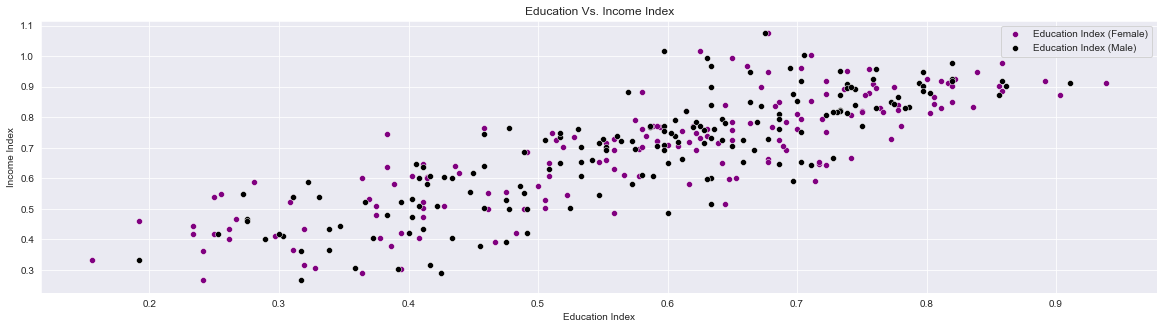

In [92]:
# Scatter plot for EI vs II (F)
# Scatter plot for EI vs II (M)
# on Same plot
sns.scatterplot(x = 'Education Index (Female)', y = 'Income Index', data = gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Income Index', data = gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

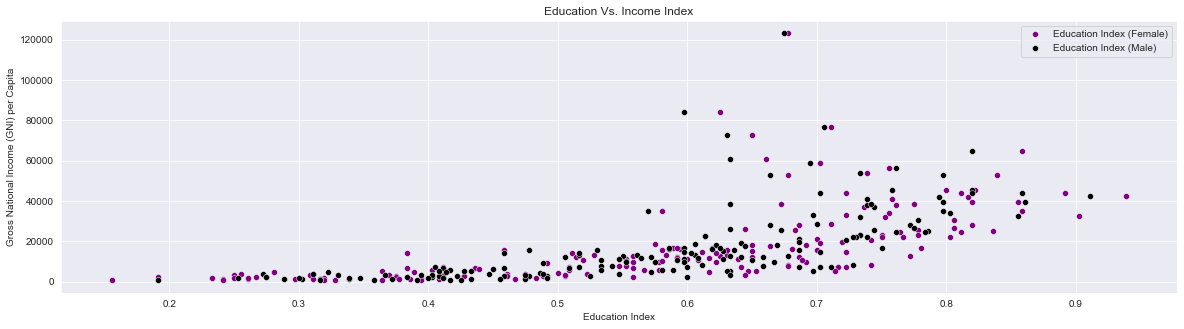

In [93]:
# Scatter plot for EI vs GNI (F)
# Scatter plot for EI vs GNI (M)
# on Same plot
sns.scatterplot(x = 'Education Index (Female)', y = 'Gross National Income (GNI) per Capita', data = gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Gross National Income (GNI) per Capita', data = gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

____________________________________________________________________________________________________________________________

HEATMAPS

____________________________________________________________________________________________________________________________

<AxesSubplot:>

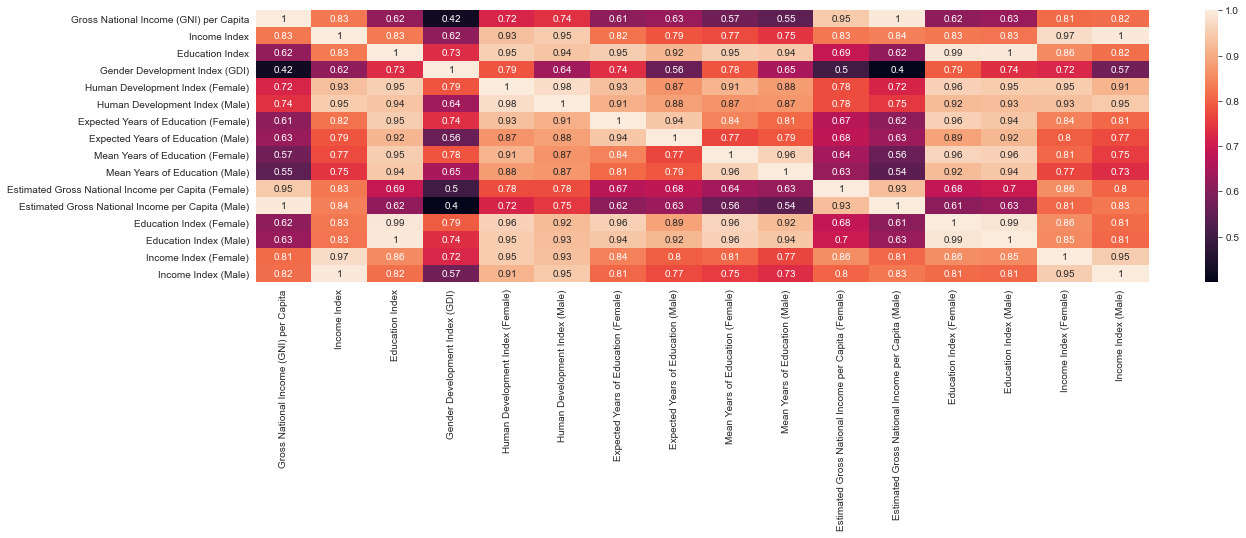

In [94]:
# Create a list of column names we are intersted in looking at
interest = ['Gross National Income (GNI) per Capita','Income Index', 'Education Index','Gender Development Index (GDI)',
            'Human Development Index (Female)', 'Human Development Index (Male)', 'Expected Years of Education (Female)', 
            'Expected Years of Education (Male)', 'Mean Years of Education (Female)', 'Mean Years of Education (Male)', 
            'Estimated Gross National Income per Capita (Female)', 'Estimated Gross National Income per Capita (Male)', 
           'Education Index (Female)', 'Education Index (Male)', 'Income Index (Female)', 'Income Index (Male)']

# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_gdi = gdi[interest].corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_gdi, annot = True)

<AxesSubplot:>

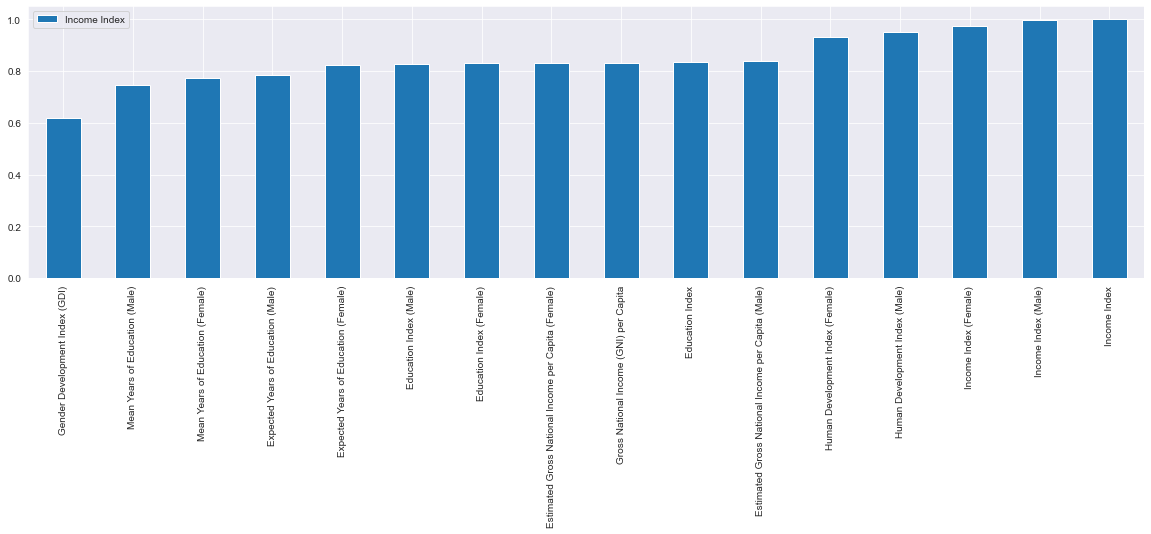

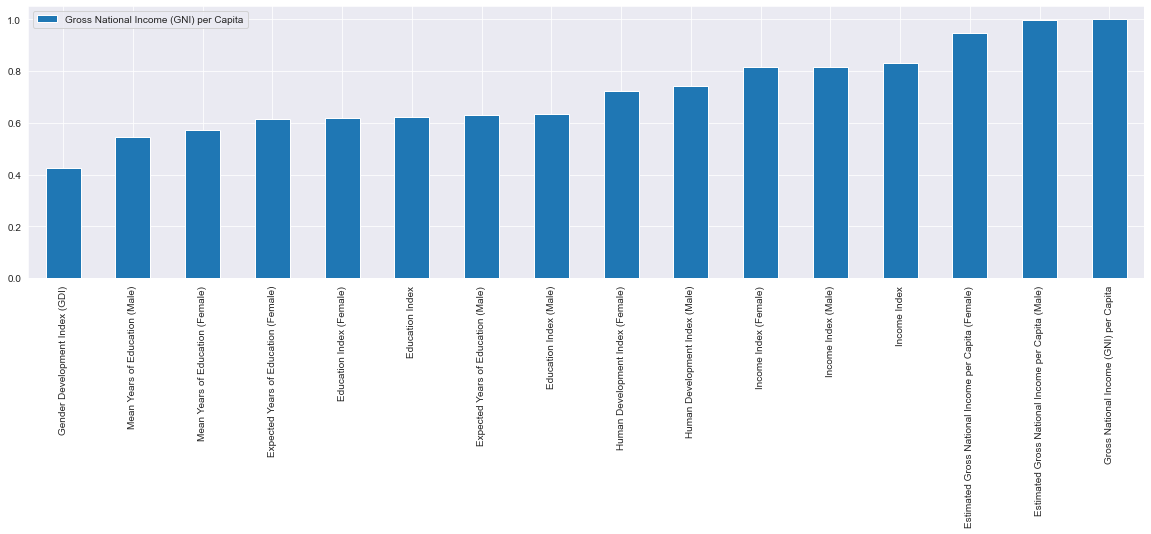

In [95]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_gdi.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_gdi.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

____________________________________________________________________________________________________________________________

REGRESSION MODELS

____________________________________________________________________________________________________________________________

In [16]:
# Find regression model between independent and dependent variables as noted above
independent_variables = gdi[['Education Index (Female)','Education Index (Male)']]
dependent_variables = gdi['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     183.7
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.05e-42
Time:                        15:00:41   Log-Likelihood:                 149.33
No. Observations:                 168   AIC:                            -292.7
Df Residuals:                     165   BIC:                            -283.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\18607\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(array([0, 1, 2]),
 [Text(0, 0, 'const'),
  Text(1, 0, 'Education Index (Male)'),
  Text(2, 0, 'Education Index (Female)')])

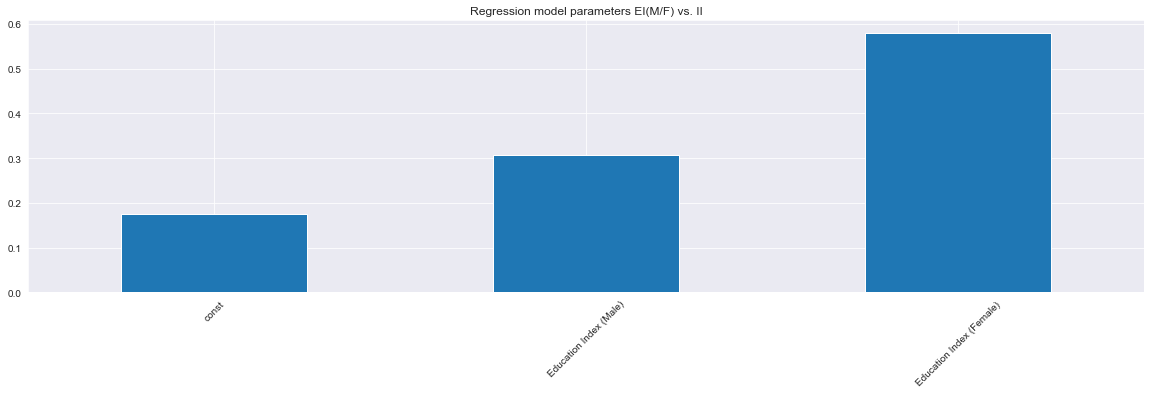

In [21]:
# Create panda core series from regression model paramaters
# Sort values
regression_params = regression_model.params.sort_values()

# Plot regression_params as bar chart
regression_params.plot(kind = 'bar', y = 'Income Index')
plt.title('Regression model parameters EI(M/F) vs. II')
plt.xticks(rotation = 45)

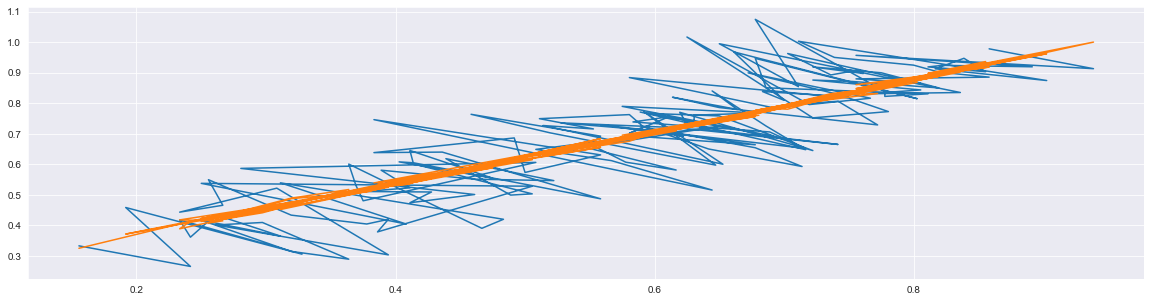

In [20]:
# Create a prediction model column based on independent variables in regression_model 
gdi['GDI Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs income index
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(gdi['Education Index (Female)'], 
       gdi[['Income Index', 'GDI Prediction']])

plt.show()

KeyError: "['Gross National Income per Capita (GNI)'] not in index"

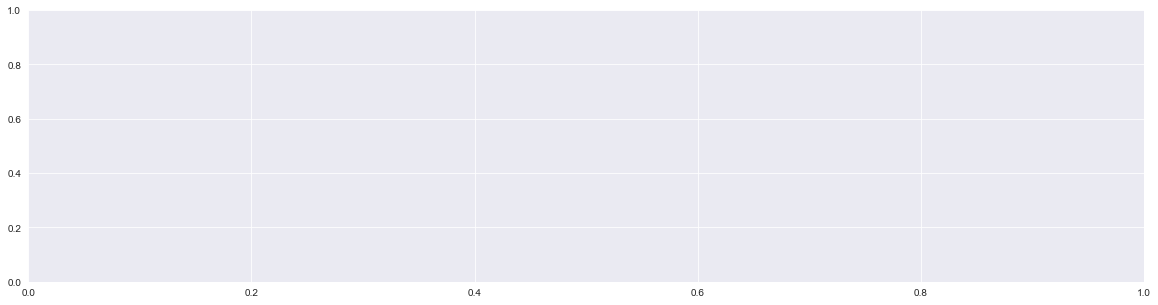

In [60]:
# Create a prediction model column based on independent variables in regression_model 
gdi['GDI GNI Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs income index
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(gdi['Education Index (Female)'], 
       gdi[['Gross National Income per Capita (GNI)', 'GDI GNI Prediction']])

plt.show()

In [59]:
gdi[['Income Index', 'GDI Prediction', 'GDI Male Prediction']].head()

Income Index  GDI Prediction  GDI Male Prediction
0      0.978365        0.925499             0.925499
1      0.913351        1.000367             1.000367
2      0.957029        0.848010             0.848010
3      0.919528        0.956774             0.956774
4      0.924290        0.904577             0.904577

____________________________________________________________________________________________________________________________

SCATTER PLOTS

____________________________________________________________________________________________________________________________

LEVEL DATA

Text(0.5, 0, 'Education Index')

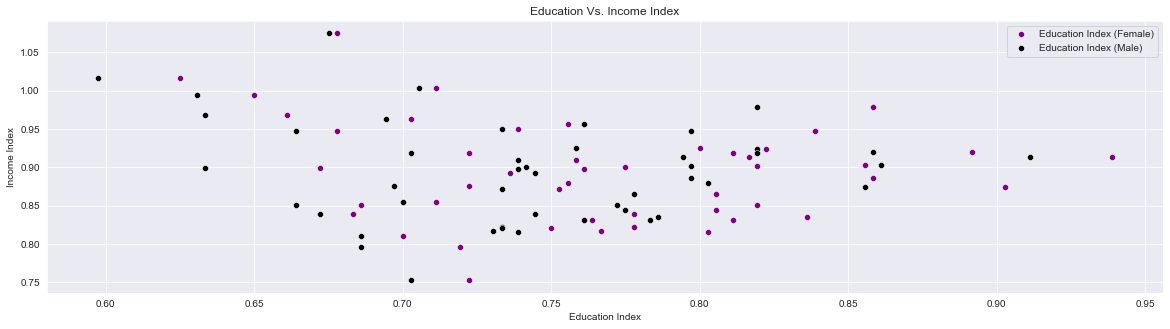

In [99]:
# Scatter plot for EI(F) vs II (F)
# Scatter plot for EI(M) vs II (M)
# very_high_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Income Index', data = very_high_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Income Index', data = very_high_gdi, color = 'black')

# Add title and legend
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

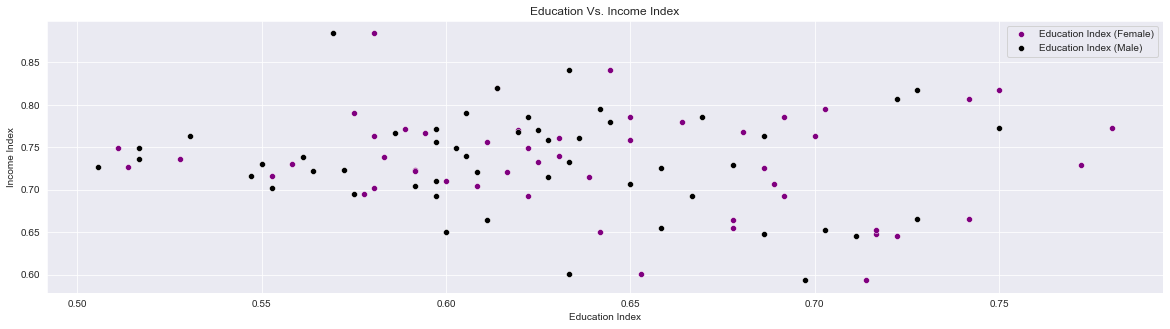

In [100]:
# Scatter plot for EI(F) vs II (F)
# Scatter plot for EI(M) vs II (M)
# high_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Income Index', data = high_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Income Index', data = high_gdi, color = 'black')

# Add title and legend
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

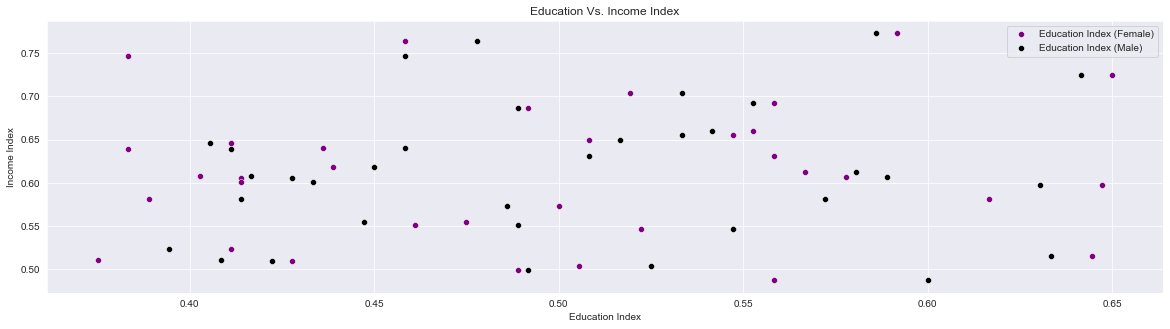

In [101]:
# Scatter plot for EI(F) vs II (F)
# Scatter plot for EI(M) vs II (M)
# medium_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Income Index', data = medium_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Income Index', data = medium_gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

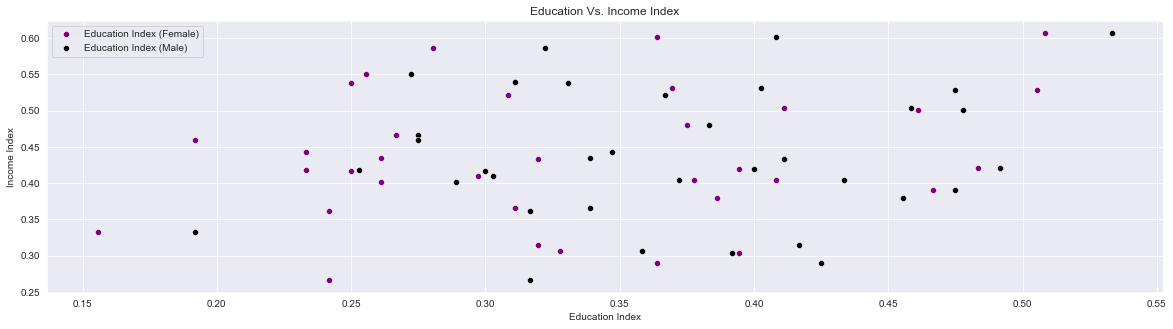

In [102]:
# Scatter plot for EI(F) vs II (F)
# Scatter plot for EI(M) vs II (M)
# low_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Income Index', data = low_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Income Index', data = low_gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

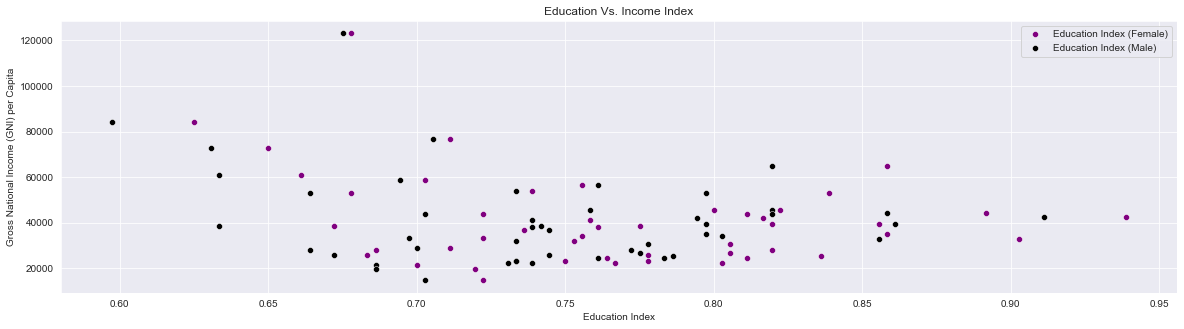

In [103]:
# Scatter plot for EI(F) vs GNI
# Scatter plot for EI(M) vs GNI
# very_high_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Gross National Income (GNI) per Capita', data = very_high_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Gross National Income (GNI) per Capita', data = very_high_gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

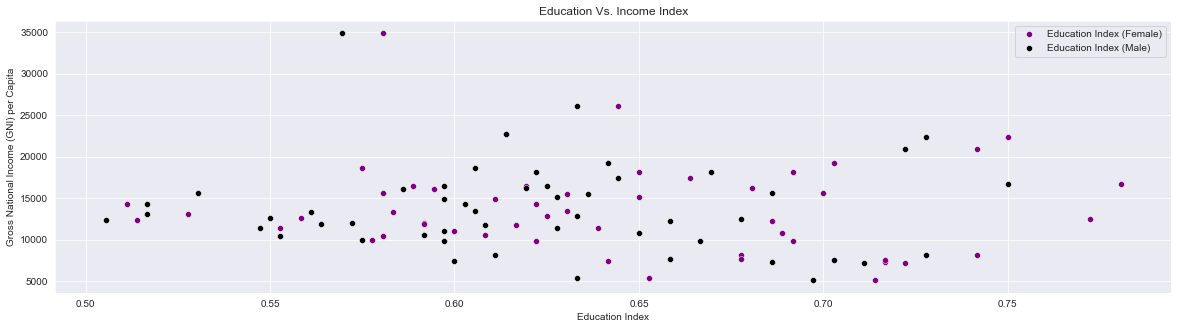

In [104]:
# Scatter plot for EI(F) vs GNI
# Scatter plot for EI(M) vs GNI
# high_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Gross National Income (GNI) per Capita', data = high_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Gross National Income (GNI) per Capita', data = high_gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

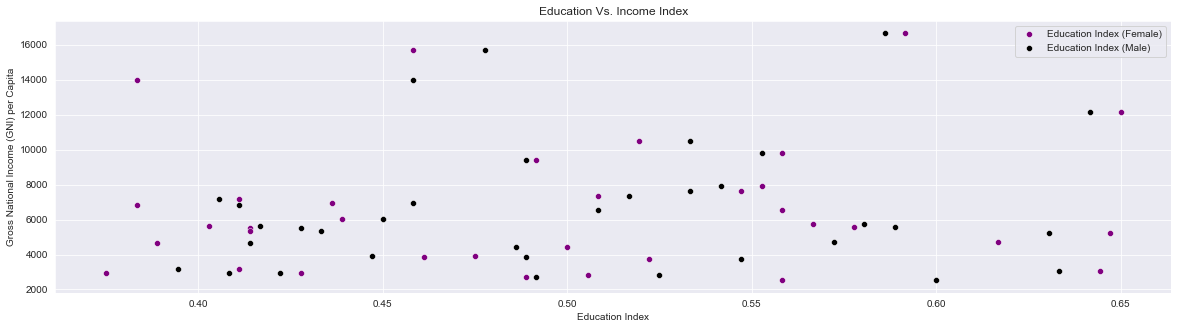

In [105]:
# Scatter plot for EI(F) vs GNI
# Scatter plot for EI(M) vs GNI
# medium_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Gross National Income (GNI) per Capita', data = medium_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Gross National Income (GNI) per Capita', data = medium_gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

Text(0.5, 0, 'Education Index')

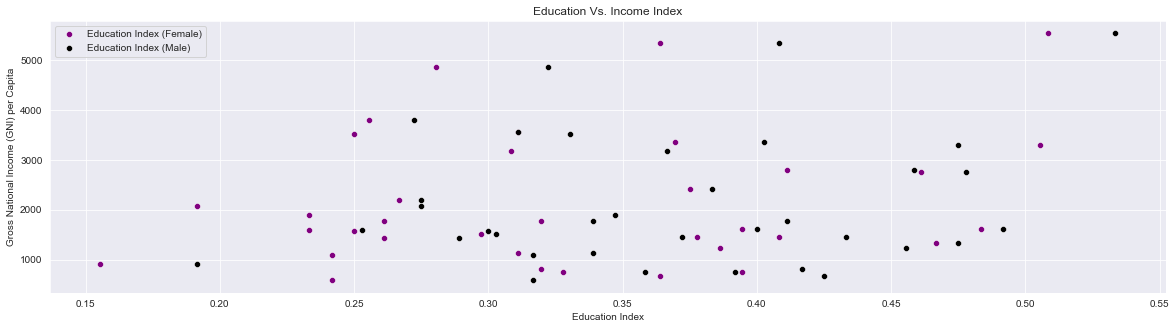

In [106]:
# Scatter plot for EI(F) vs GNI
# Scatter plot for EI(M) vs GNI
# low_gdi
sns.scatterplot(x = 'Education Index (Female)', y = 'Gross National Income (GNI) per Capita', data = low_gdi, color = 'purple').set(title = 'Education Vs. Income Index')
sns.scatterplot(x = 'Education Index (Male)', y = 'Gross National Income (GNI) per Capita', data = low_gdi, color = 'black')

# label education factors
plt.legend(labels = ['Education Index (Female)', 'Education Index (Male)'])
plt.xlabel('Education Index')

____________________________________________________________________________________________________________________________

HEATMAP

____________________________________________________________________________________________________________________________

<AxesSubplot:>

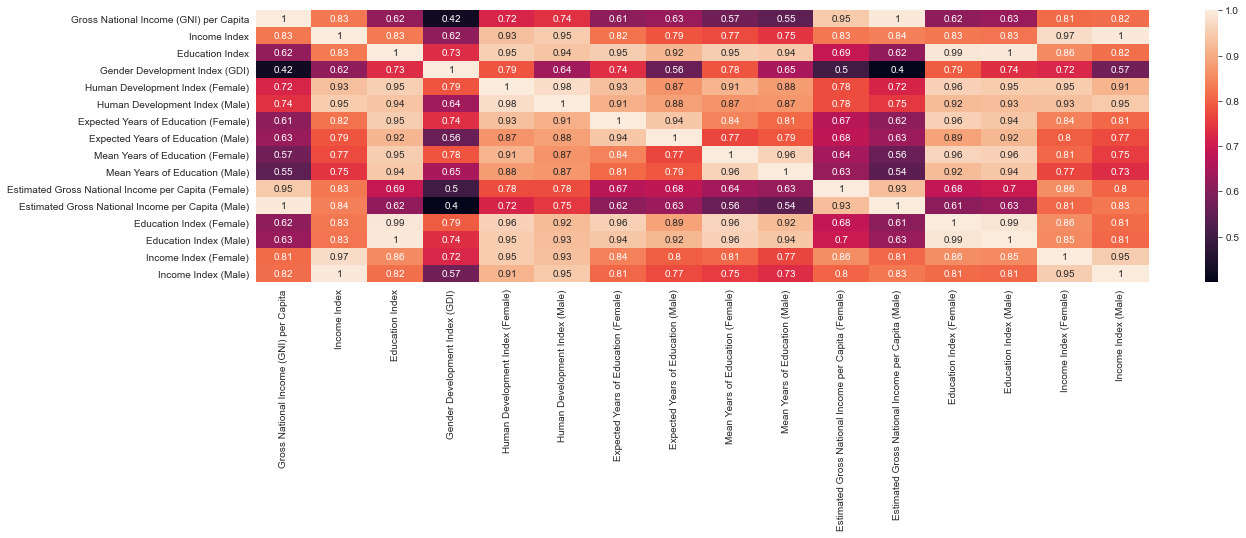

In [107]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_very_high_gdi = very_high_gdi.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_gdi, annot = True)

<AxesSubplot:>

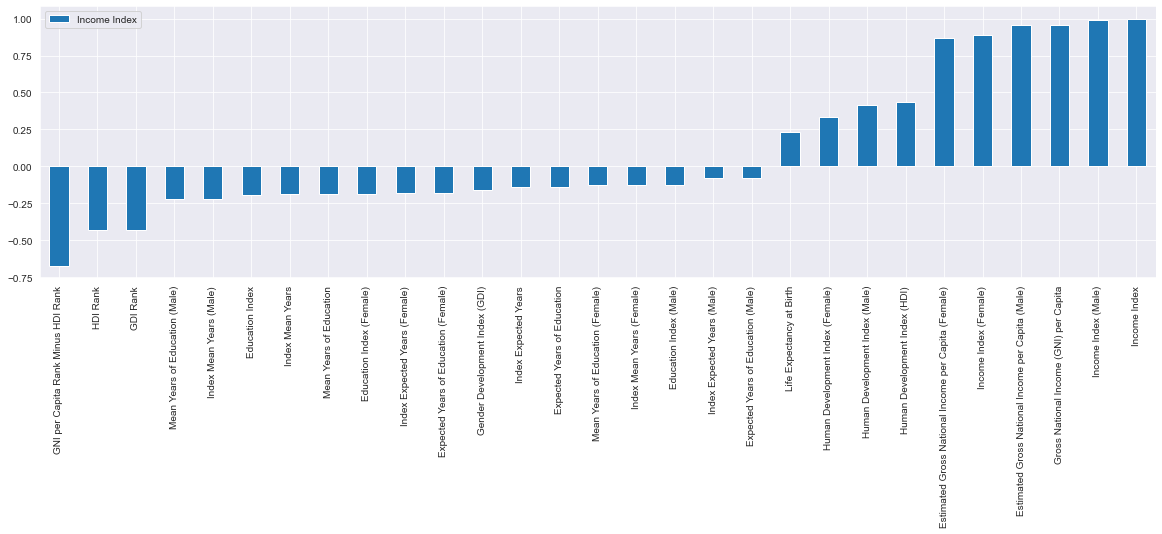

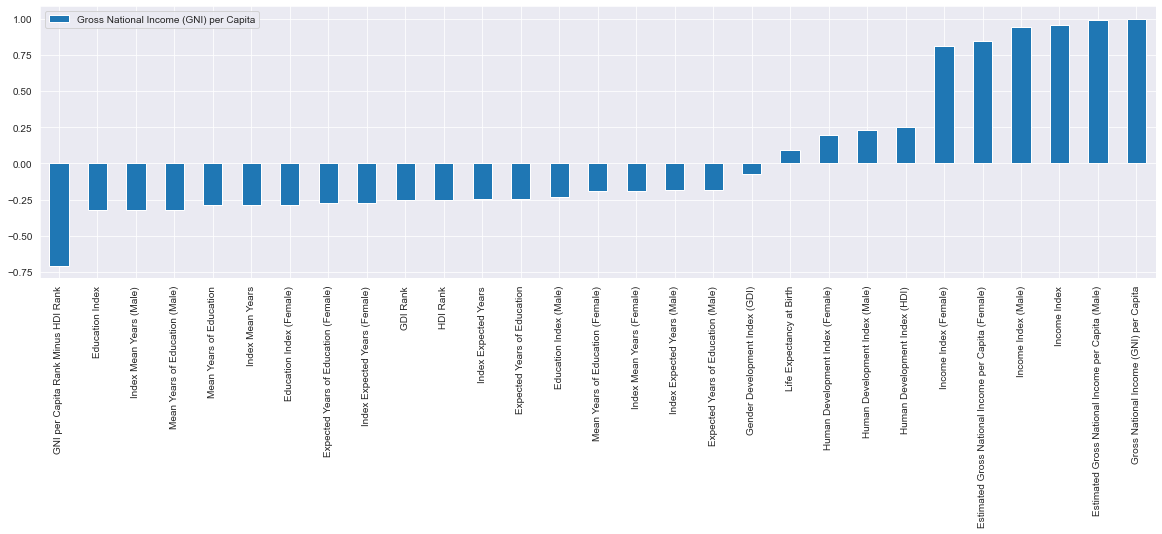

In [108]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_very_high_gdi.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_very_high_gdi.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

<AxesSubplot:>

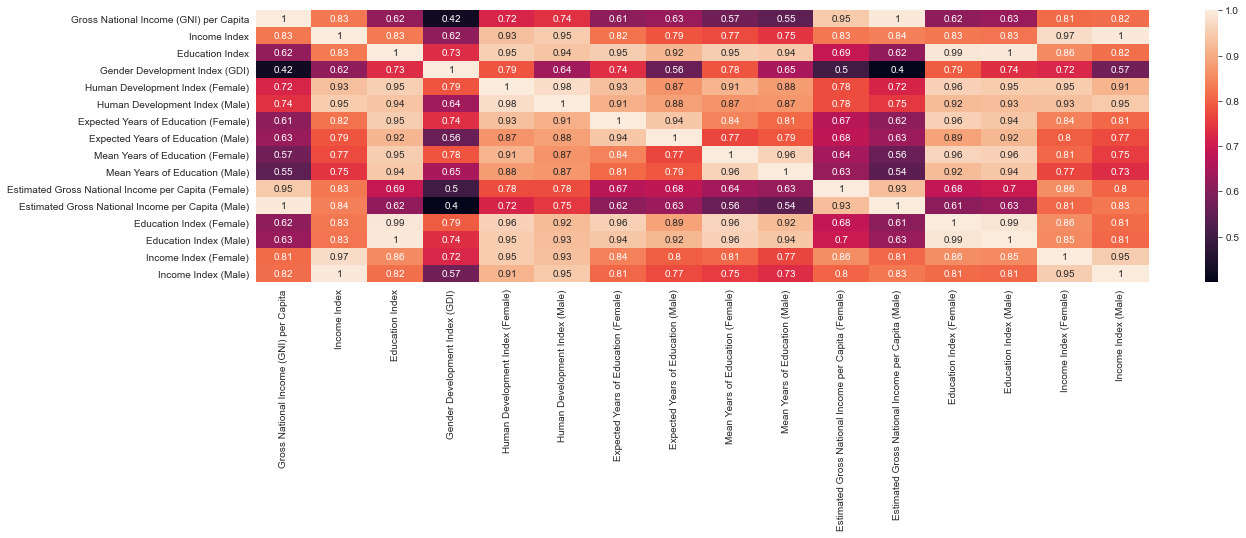

In [186]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_high_gdi = high_gdi.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_gdi, annot = True)

<AxesSubplot:>

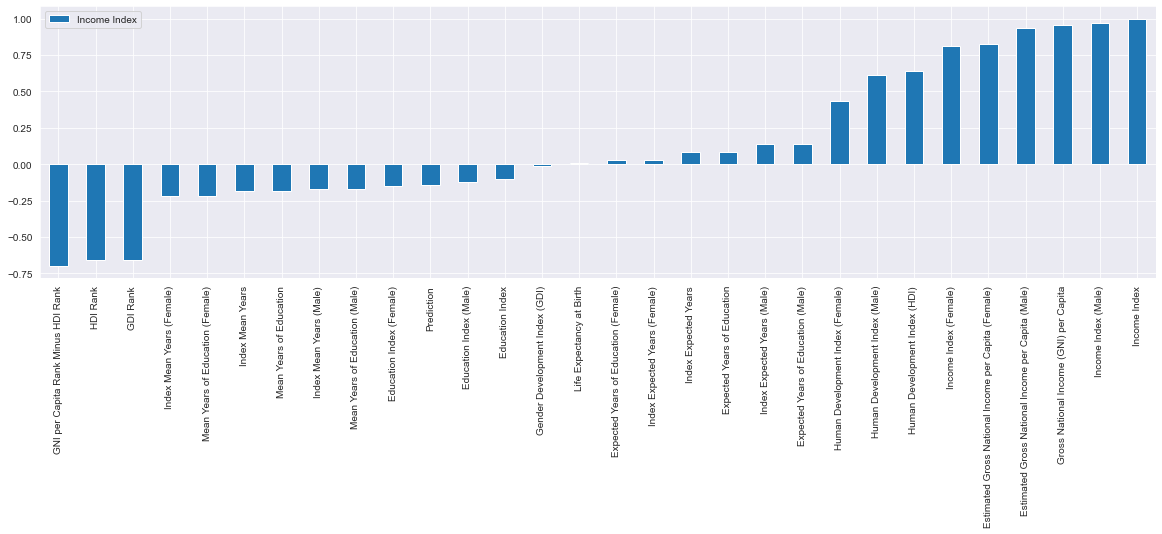

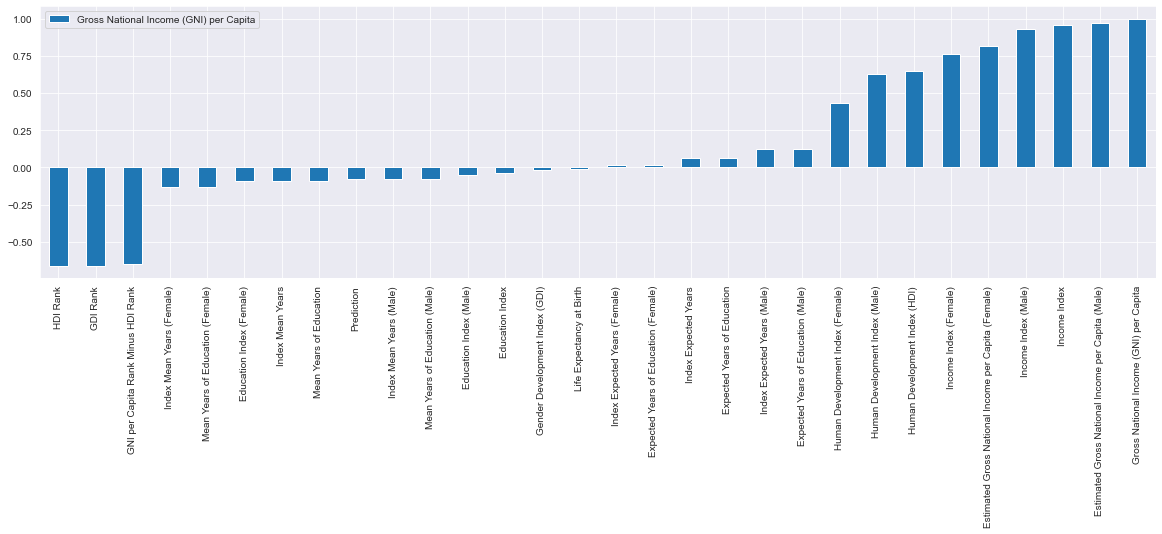

In [109]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_high_gdi.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_high_gdi.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

<AxesSubplot:>

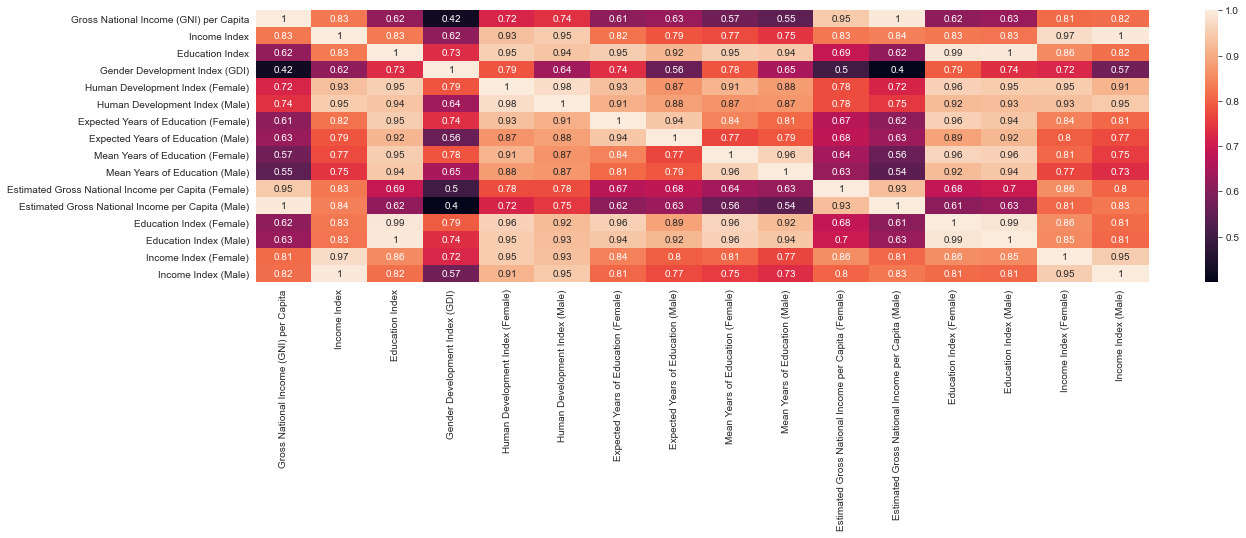

In [187]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_medium_gdi = medium_gdi.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_gdi, annot = True)

<AxesSubplot:>

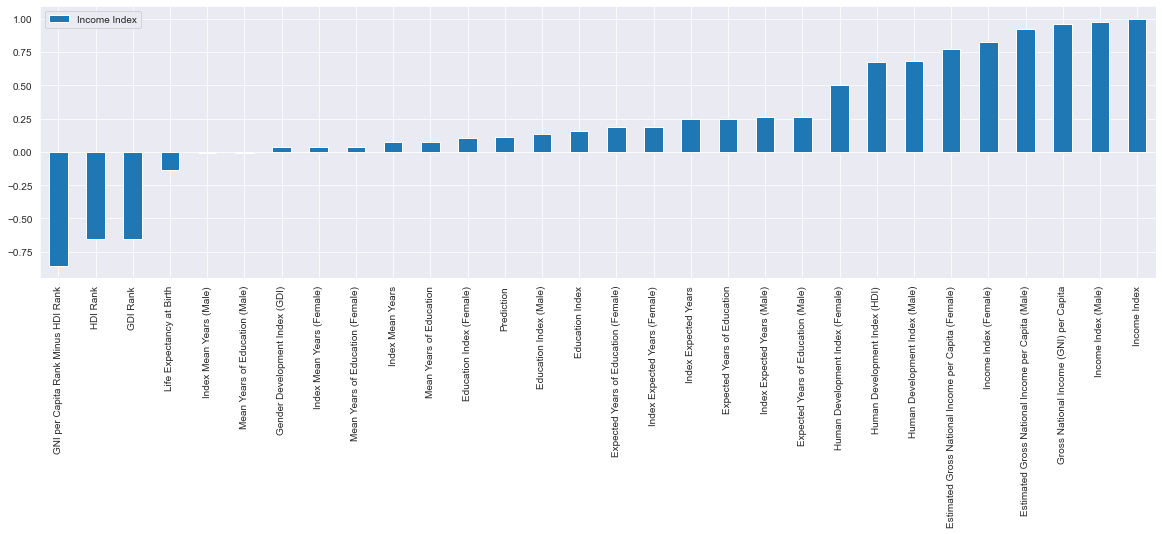

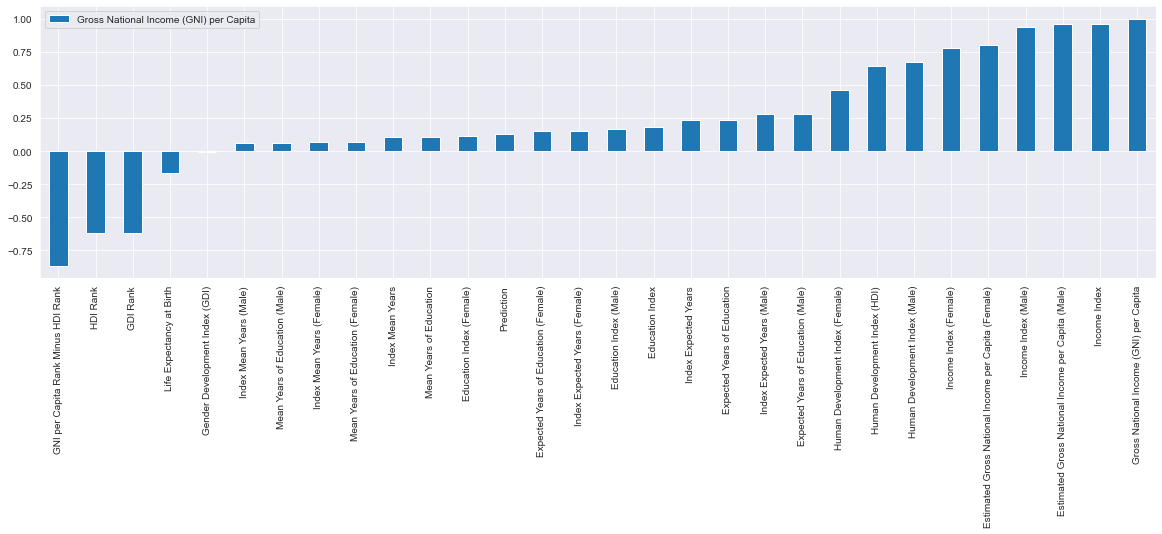

In [111]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_medium_gdi.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_medium_gdi.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

<AxesSubplot:>

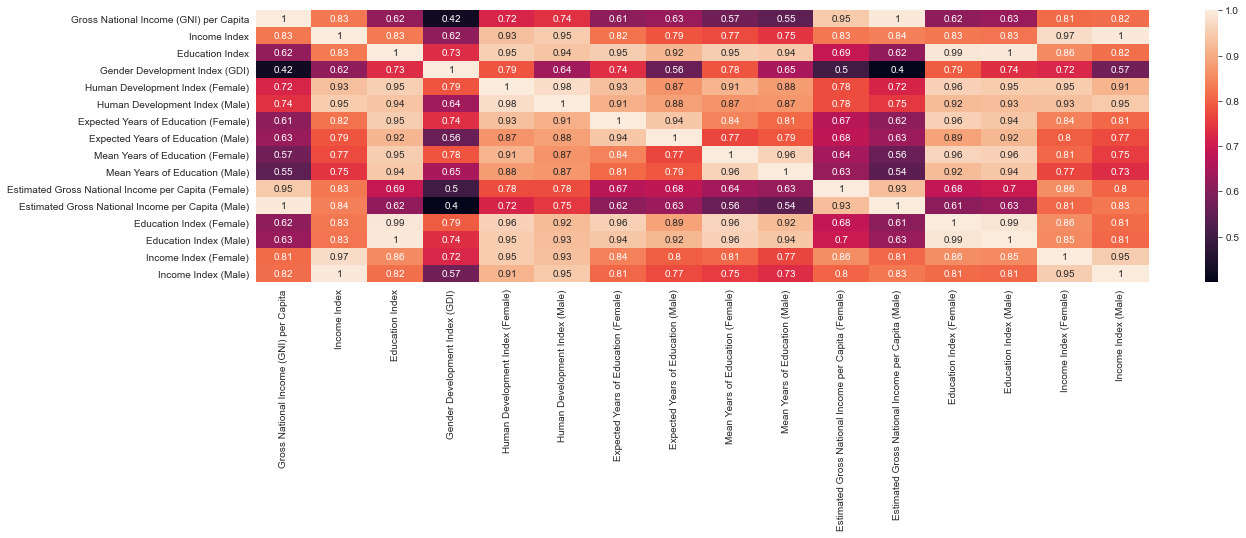

In [188]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_low_gdi = low_gdi.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_gdi, annot = True)

<AxesSubplot:>

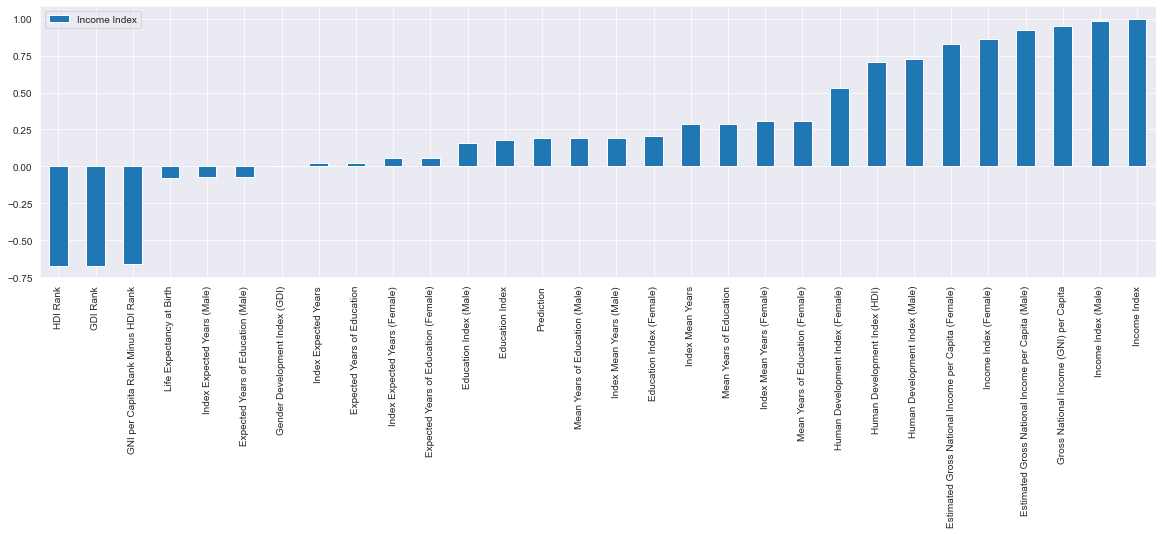

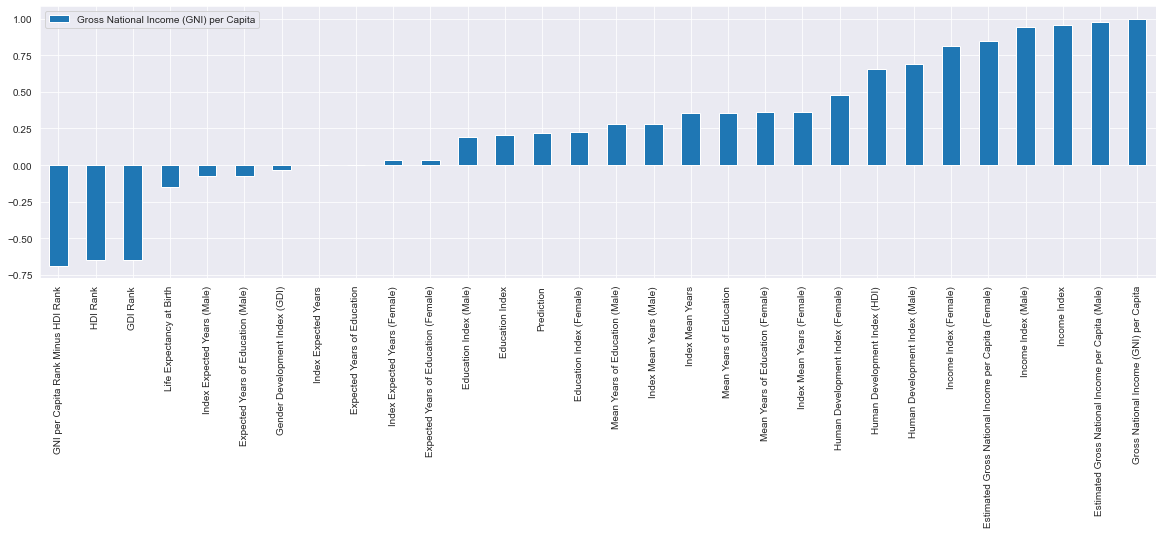

In [113]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_low_gdi.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_low_gdi.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

____________________________________________________________________________________________________________________________

REGRESSION MODELS

____________________________________________________________________________________________________________________________

In [43]:
# very_hgih_gdi df
# Find regression model between independent and dependent variables as noted above
independent_variables = very_high_gdi[['Education Index (Female)', 'Education Index (Male)', 'Education Index']]
dependent_variables = very_high_gdi['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     3.184
Date:                Sun, 19 Dec 2021   Prob (F-statistic):             0.0332
Time:                        16:19:43   Log-Likelihood:                 67.250
No. Observations:                  47   AIC:                            -126.5
Df Residuals:                      43   BIC:                            -119.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\18607\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
# hgih_gdi df
# Find regression model between independent and dependent variables as noted above
independent_variables = high_gdi[['Education Index (Female)', 'Education Index (Male)', 'Education Index']]
dependent_variables = high_gdi['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.6714
Date:                Sun, 19 Dec 2021   Prob (F-statistic):              0.574
Time:                        16:19:46   Log-Likelihood:                 74.085
No. Observations:                  51   AIC:                            -140.2
Df Residuals:                      47   BIC:                            -132.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\18607\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [111]:
# medium_gdi df
# Find regression model between independent and dependent variables as noted above
independent_variables = medium_gdi[['Education Index (Female)', 'Education Index (Male)', 'Education Index']]
dependent_variables = medium_gdi['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.5129
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.677
Time:                        16:48:22   Log-Likelihood:                 39.801
No. Observations:                  34   AIC:                            -71.60
Df Residuals:                      30   BIC:                            -65.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [112]:
# low_gdi df
# Find regression model between independent and dependent variables as noted above
independent_variables = low_gdi[['Education Index (Female)', 'Education Index (Male)', 'Education Index']]
dependent_variables = low_gdi['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.5244
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.669
Time:                        16:48:24   Log-Likelihood:                 35.631
No. Observations:                  35   AIC:                            -63.26
Df Residuals:                      31   BIC:                            -57.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Analysis outside of HDI 

## Now that trends have been found within HDI, we can begin to explore trends in the other DataFrames

We will first look into any exisiting relationships within the Gender Inequality Index (GII). This index explores issues such as distribution of secondary education, division of seats held in government, and labor force participation by sex. 

In [113]:
# Describe gii df
print(gii.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 187
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HDI Rank                                      159 non-null    float64
 1   Country                                       166 non-null    object 
 2   Human Development Index (HDI)                 166 non-null    float64
 3   Life Expectancy at Birth                      166 non-null    float64
 4   Expected Years of Education                   166 non-null    float64
 5   Mean Years of Education                       166 non-null    float64
 6   Gross National Income (GNI) per Capita        166 non-null    float64
 7   GNI per Capita Rank Minus HDI Rank            159 non-null    float64
 8   Index Expected Years                          166 non-null    float64
 9   Index Mean Years                              166 non-null    flo

____________________________________________________________________________________________________________________________

MEAN & MEDIAN

____________________________________________________________________________________________________________________________

In [114]:
# Start with finding the mean, median, and spread of GII Values per country OVERALL
gii_interest = ['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
            'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']
# Find the mean & median for gii by iterating through gii using list gii_interest
for i in gii_interest:
    mean = round(np.mean(gii[i]),2)
    median = round(np.median(gii[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Population with Secondary Education (Female) Mean : 54.92
Population with Secondary Education (Female) Median: 56.0
Population with Secondary Education (Male) Mean : 60.54
Population with Secondary Education (Male) Median: 60.3
Labour Force Participation Rate (Female) Mean : 52.21
Labour Force Participation Rate (Female) Median: 53.15
Labour Force Participation Rate (Male) Mean : 74.43
Labour Force Participation Rate (Male) Median: 74.95


In [115]:
# very_high_gii
for i in gii_interest:
    mean = round(np.mean(very_high_gii[i]),2)
    median = round(np.median(very_high_gii[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Population with Secondary Education (Female) Mean : 82.76
Population with Secondary Education (Female) Median: 85.0
Population with Secondary Education (Male) Mean : 85.1
Population with Secondary Education (Male) Median: 89.1
Labour Force Participation Rate (Female) Mean : 51.82
Labour Force Participation Rate (Female) Median: 52.5
Labour Force Participation Rate (Male) Mean : 69.9
Labour Force Participation Rate (Male) Median: 68.6


In [116]:
# high_gii
for i in gii_interest:
    mean = round(np.mean(high_gii[i]),2)
    median = round(np.median(high_gii[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Population with Secondary Education (Female) Mean : 63.85
Population with Secondary Education (Female) Median: 58.55
Population with Secondary Education (Male) Mean : 67.87
Population with Secondary Education (Male) Median: 66.2
Labour Force Participation Rate (Female) Mean : 47.19
Labour Force Participation Rate (Female) Median: 49.65
Labour Force Participation Rate (Male) Mean : 73.56
Labour Force Participation Rate (Male) Median: 74.85


In [117]:
# medium_gii
for i in gii_interest:
    mean = round(np.mean(medium_gii[i]),2)
    median = round(np.median(medium_gii[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Population with Secondary Education (Female) Mean : 44.72
Population with Secondary Education (Female) Median: 38.1
Population with Secondary Education (Male) Mean : 52.03
Population with Secondary Education (Male) Median: 47.7
Labour Force Participation Rate (Female) Mean : 48.97
Labour Force Participation Rate (Female) Median: 51.25
Labour Force Participation Rate (Male) Mean : 76.46
Labour Force Participation Rate (Male) Median: 79.3


In [118]:
# low_gii
for i in gii_interest:
    mean = round(np.mean(low_gii[i]),2)
    median = round(np.median(low_gii[i]),2)
    print(i + " Mean : " + str(mean))
    print(i + ' Median: ' + str(median))

Population with Secondary Education (Female) Mean : 13.57
Population with Secondary Education (Female) Median: 11.3
Population with Secondary Education (Male) Mean : 24.46
Population with Secondary Education (Male) Median: 26.0
Labour Force Participation Rate (Female) Mean : 63.13
Labour Force Participation Rate (Female) Median: 66.0
Labour Force Participation Rate (Male) Mean : 79.98
Labour Force Participation Rate (Male) Median: 81.3


____________________________________________________________________________________________________________________________

SPREAD

____________________________________________________________________________________________________________________________

OVERALL GII DATA

In [119]:
# Find spread
# IQR for overall GII data

# Define Q1 & Q3
q1 = gii.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = gii.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gii_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Population with Secondary Education (Female) IQR is:   56.18, Lower limit is:   -56.84, and upper limit is:   167.87
Population with Secondary Education (Male) IQR is:   48.38, Lower limit is:   -34.02, and upper limit is:   159.5
Labour Force Participation Rate (Female) IQR is:   17.53, Lower limit is:   18.13, and upper limit is:   88.24
Labour Force Participation Rate (Male) IQR is:   11.47, Lower limit is:   51.52, and upper limit is:   97.4


In [120]:
# Overall GII Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers

outliers = gii[((gii < lower_limit) | ((gii > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in gii')

# Count original amount of rows
count = gii.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in gii is within the IQR')

There are 23 outliers in gii
86.14% of the data in gii is within the IQR


LEVEL DATA

In [121]:
# Find spread 
# IQR for overall very_high_gii data

# Define Q1 & Q3
q1 = very_high_gii.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = very_high_gii.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gii_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Population with Secondary Education (Female) IQR is:   23.4, Lower limit is:   37.55, and upper limit is:   131.15
Population with Secondary Education (Male) IQR is:   18.45, Lower limit is:   50.73, and upper limit is:   124.52
Labour Force Participation Rate (Female) IQR is:   8.1, Lower limit is:   36.0, and upper limit is:   68.4
Labour Force Participation Rate (Male) IQR is:   6.95, Lower limit is:   55.58, and upper limit is:   83.37


In [122]:
# very_high_gii Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers

outliers = very_high_gii[((very_high_gii < lower_limit) | ((very_high_gii > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in very_high_gii')

# Count original amount of rows
count = very_high_gii.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in very_high_gii is within the IQR')

There are 10 outliers in very_high_gii
78.72% of the data in very_high_gii is within the IQR


In [123]:
# Find spread
# IQR for high_gii data

# Define Q1 & Q3
q1 = high_gii.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = high_gii.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gii_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Population with Secondary Education (Female) IQR is:   28.92, Lower limit is:   10.37, and upper limit is:   126.06
Population with Secondary Education (Male) IQR is:   30.3, Lower limit is:   9.23, and upper limit is:   130.43
Labour Force Participation Rate (Female) IQR is:   13.67, Lower limit is:   21.95, and upper limit is:   76.63
Labour Force Participation Rate (Male) IQR is:   9.15, Lower limit is:   56.18, and upper limit is:   92.78


In [124]:
# Overall high_gii
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers

outliers = high_gii[((high_gii < lower_limit) | ((high_gii > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in high_gii')

# Count original amount of rows
count = high_gii.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in high_gii is within the IQR')

There are 7 outliers in high_gii
86.54% of the data in high_gii is within the IQR


In [125]:
# Find spread
# IQR for medium_gii

# Define Q1 & Q3
q1 = medium_gii.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = medium_gii.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gii_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Population with Secondary Education (Female) IQR is:   26.45, Lower limit is:   -10.85, and upper limit is:   94.95
Population with Secondary Education (Male) IQR is:   23.4, Lower limit is:   2.88, and upper limit is:   96.48
Labour Force Participation Rate (Female) IQR is:   29.17, Lower limit is:   -8.1, and upper limit is:   108.58
Labour Force Participation Rate (Male) IQR is:   8.83, Lower limit is:   59.68, and upper limit is:   95.0


In [126]:
# medium_gii Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers

outliers = medium_gii[((medium_gii < lower_limit) | ((medium_gii > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in medium_gii')

# Count original amount of rows
count = medium_gii.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in medium_gii is within the IQR')

There are 8 outliers in medium_gii
75.0% of the data in medium_gii is within the IQR


In [127]:
# Find spread
# IQR for low_gii data

# Define Q1 & Q3
q1 = low_gii.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = low_gii.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in gii_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Population with Secondary Education (Female) IQR is:   12.65, Lower limit is:   -11.32, and upper limit is:   39.28
Population with Secondary Education (Male) IQR is:   16.75, Lower limit is:   -9.93, and upper limit is:   57.08
Labour Force Participation Rate (Female) IQR is:   22.35, Lower limit is:   21.77, and upper limit is:   111.18
Labour Force Participation Rate (Male) IQR is:   9.0, Lower limit is:   61.5, and upper limit is:   97.5


In [128]:
# low_gii Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers

outliers = low_gii[((low_gii < lower_limit) | ((low_gii > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]

# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in low_gii')

# Count original amount of rows
count = low_gii.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in low_gii is within the IQR')

There are 4 outliers in low_gii
88.57% of the data in low_gii is within the IQR


____________________________________________________________________________________________________________________________

BOXPLOTS

____________________________________________________________________________________________________________________________

OVERALL GII DATA

Text(0.5, 1.0, 'Labour Force Participation Rate Comparison')

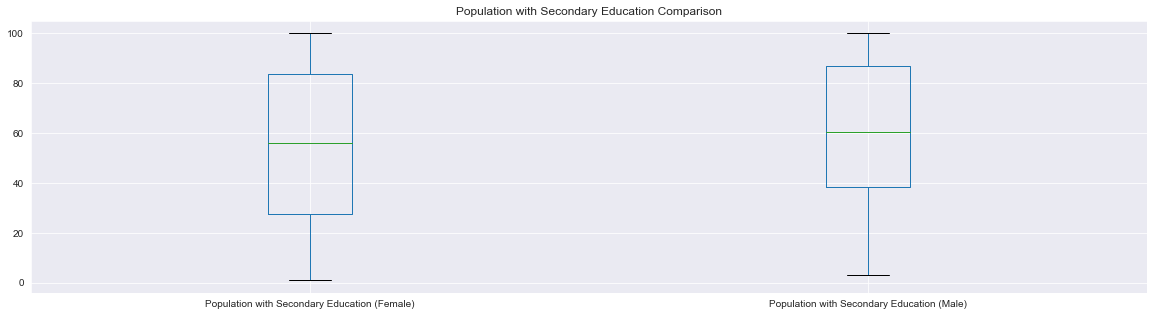

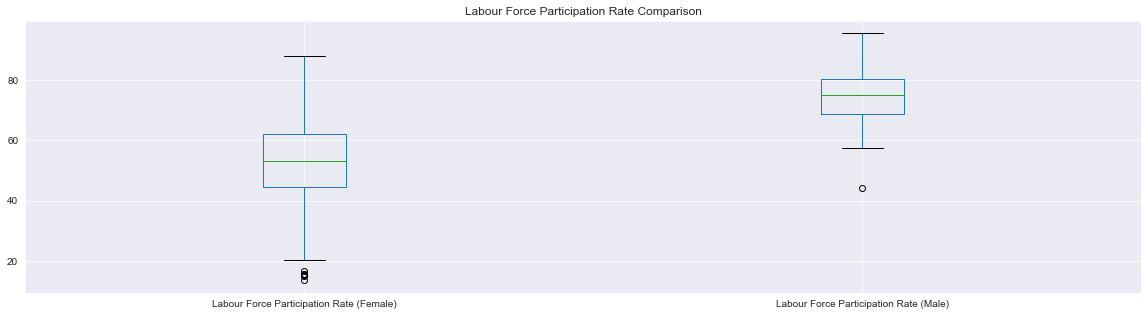

In [129]:
# Construct boxplots to show index distrubution by sex
# Overall GII data

# Population with Secondary Education for female and male population
gii[['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)']].plot(kind = 'box')
plt.title('Population with Secondary Education Comparison')

# Education Index vs. HDI for female and male
gii[['Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']].plot(kind = 'box')
plt.title('Labour Force Participation Rate Comparison')

LEVEL DATA

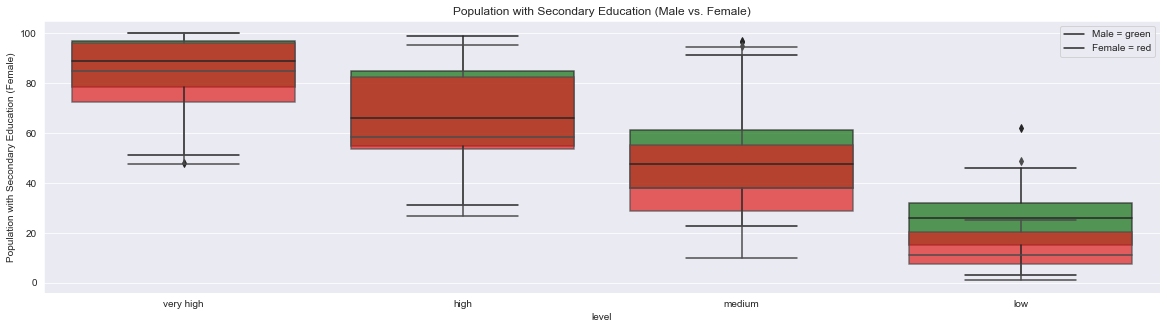

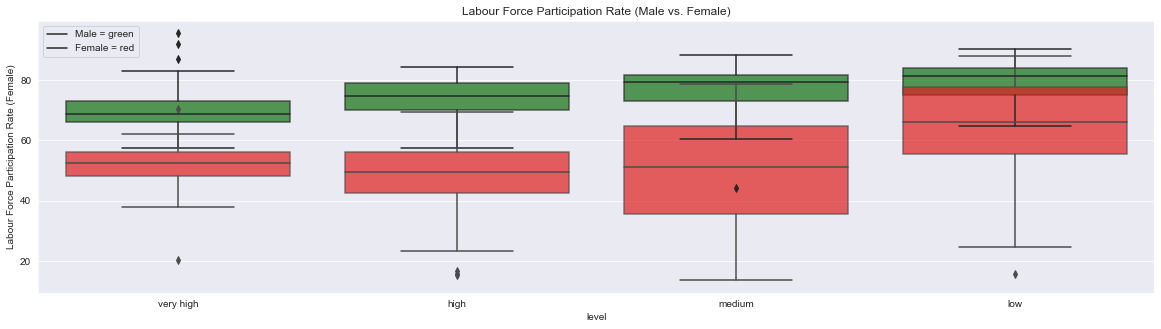

In [130]:
# Create graph with boxplot that compares hdi between sexes per hdi level
ax = sns.boxplot(x="level", y='Population with Secondary Education (Male)',data=gii, color = 'g', boxprops=dict(alpha=.7))
ax = sns.boxplot(x="level", y='Population with Secondary Education (Female)',data=gii, color = 'r', boxprops=dict(alpha=.7))

plt.title('Population with Secondary Education (Male vs. Female)')
plt.legend(labels = ['Male = green', 'Female = red'])
plt.show()

# Create graph with boxplot that compares education index between sexes per hdi level
ax = sns.boxplot(x="level", y='Labour Force Participation Rate (Male)',data=gii, color = 'g', boxprops=dict(alpha=.7))
ax = sns.boxplot(x="level", y='Labour Force Participation Rate (Female)',data=gii, color = 'r', boxprops=dict(alpha=.7))


plt.title('Labour Force Participation Rate (Male vs. Female)')
plt.legend(labels = ['Male = green', 'Female = red'])

plt.show()

## Inferental GII

____________________________________________________________________________________________________________________________

SCATTER PLOTS

____________________________________________________________________________________________________________________________

OVERALL

[Text(0.5, 1.0, 'Education Vs. Income Index')]

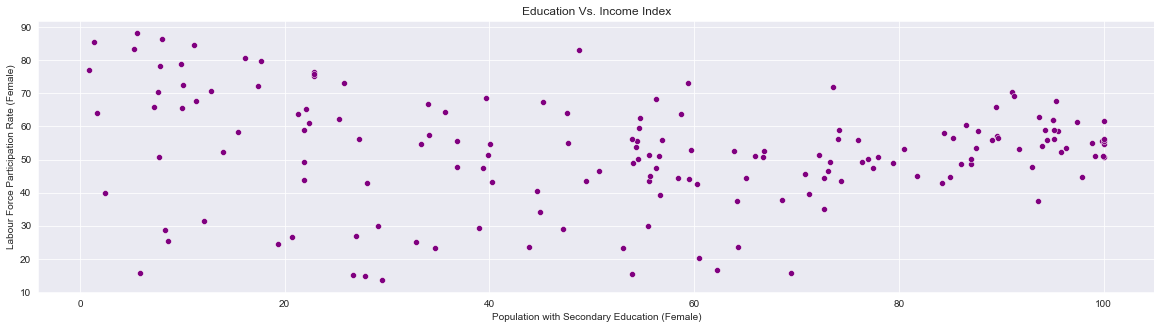

In [131]:
# Scatter plot for Secondary(F) vs Labour(F)
# Overall GII
sns.scatterplot(x = 'Population with Secondary Education (Female)',
                y = 'Labour Force Participation Rate (Female)', data = gii, 
                color = 'purple').set(title = 'Education Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Labour Force Participation Rate (Male)', data = gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

Text(0.5, 0, 'Population with Secondary Education')

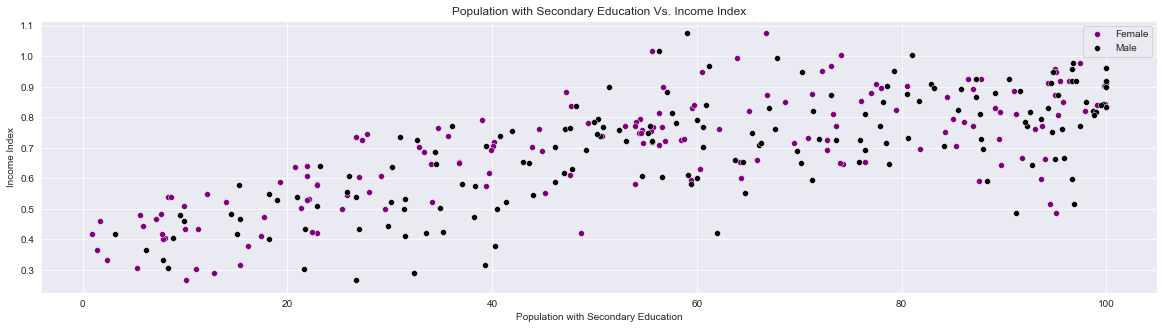

In [132]:
# Scatter plot for Secondary(F) vs II
# Overall GII
sns.scatterplot(x = 'Population with Secondary Education (Female)', y = 'Income Index', 
                data = gii, color = 'purple').set(title = 'Population with Secondary Education Vs. Income Index')
sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', data = gii, color = 'black')

# label 
plt.legend(labels = ['Female', 'Male'])
plt.xlabel('Population with Secondary Education')

[Text(0.5, 1.0, 'Education Index Vs. Labour Force Participation Rate (Female)')]

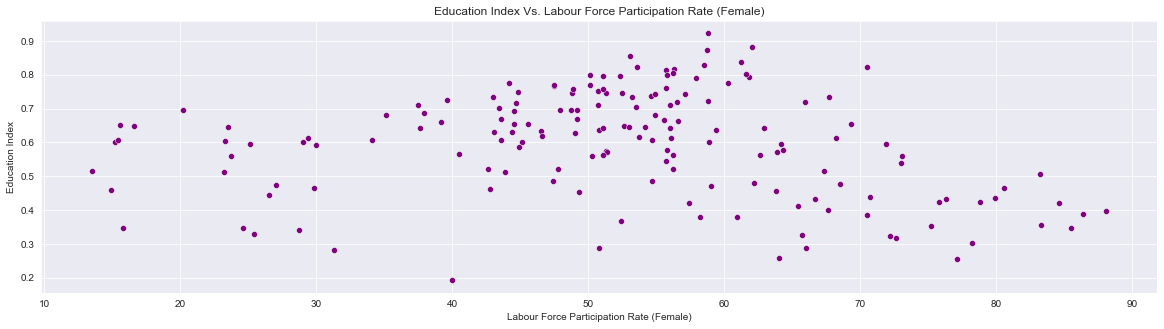

In [133]:
# Scatter plot for EI vs Labour(F)
# Overall GII
sns.scatterplot(y = 'Education Index', x = 'Labour Force Participation Rate (Female)', data = gii, 
                color = 'purple').set(title = 'Education Index Vs. Labour Force Participation Rate (Female)')
#sns.scatterplot(y = 'Education Index', x = 'Labour Force Participation Rate (Male)', data = gii, color = 'black')

# label 
#plt.legend(labels = ['Female', 'Male'])

____________________________________________________________________________________________________________________________

HEATMAP

____________________________________________________________________________________________________________________________

<AxesSubplot:>

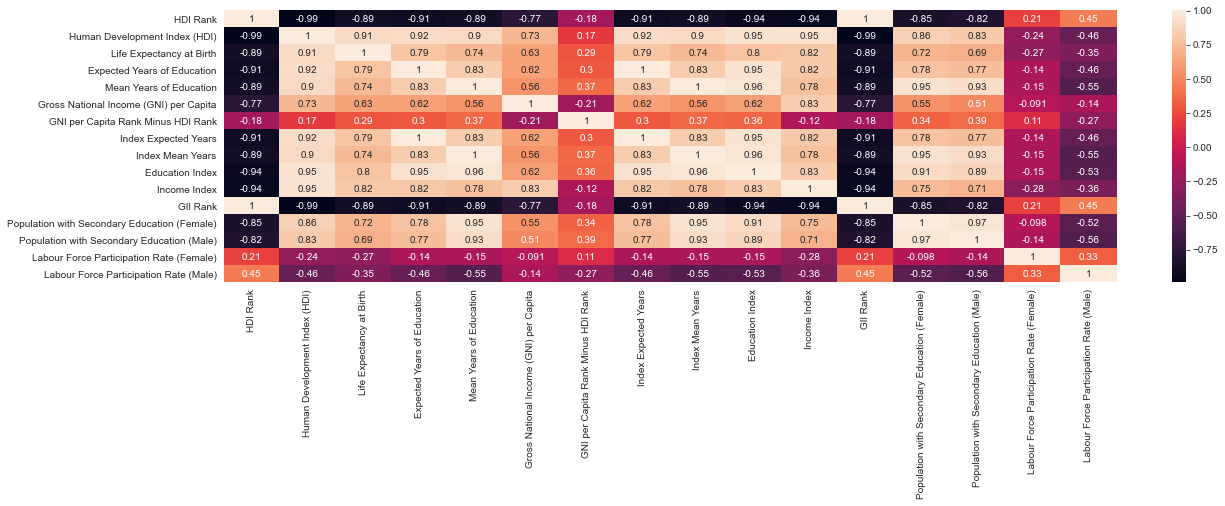

In [134]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_gii = gii.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_gii, annot = True)

<AxesSubplot:>

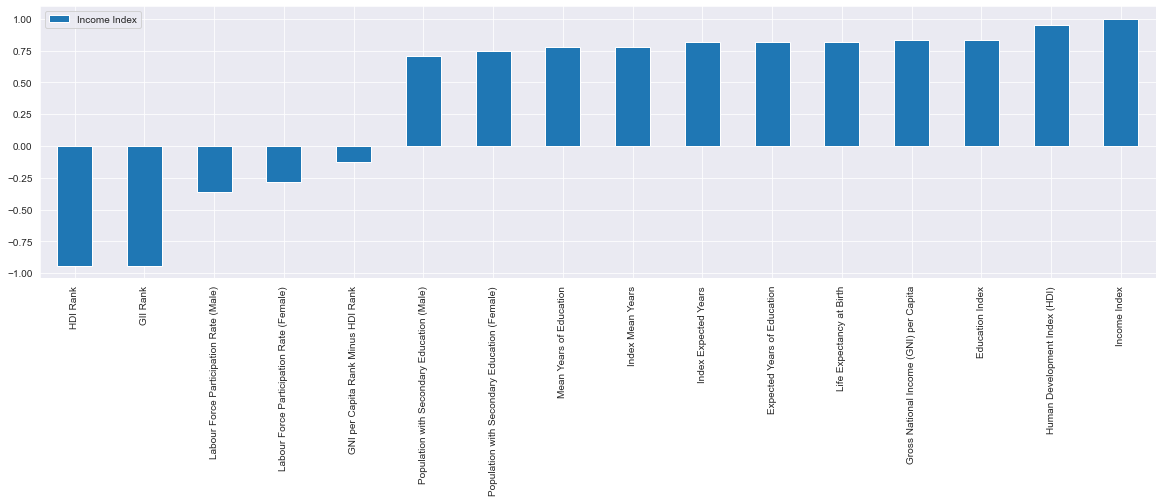

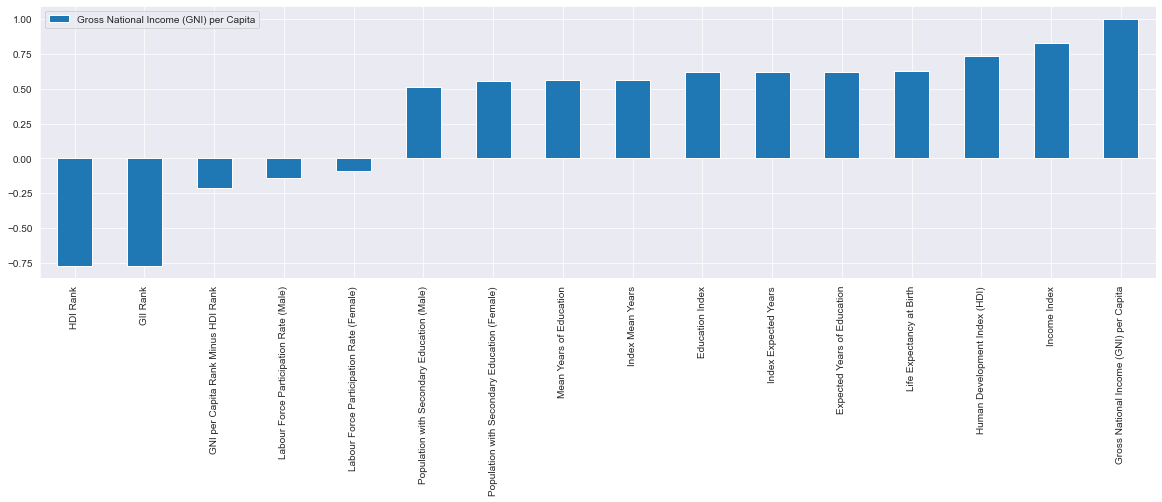

In [135]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_gii.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_gii.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

____________________________________________________________________________________________________________________________

REGRESSION MODELS

____________________________________________________________________________________________________________________________

In [45]:
# Overall GII df
# Find regression model between independent and dependent variables as noted above
independent_variables = gii[['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
            'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']]
dependent_variables = gii['Income Index']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income Index   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     66.57
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           3.87e-33
Time:                        16:20:03   Log-Likelihood:                 133.83
No. Observations:                 166   AIC:                            -257.7
Df Residuals:                     161   BIC:                            -242.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

C:\Users\18607\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

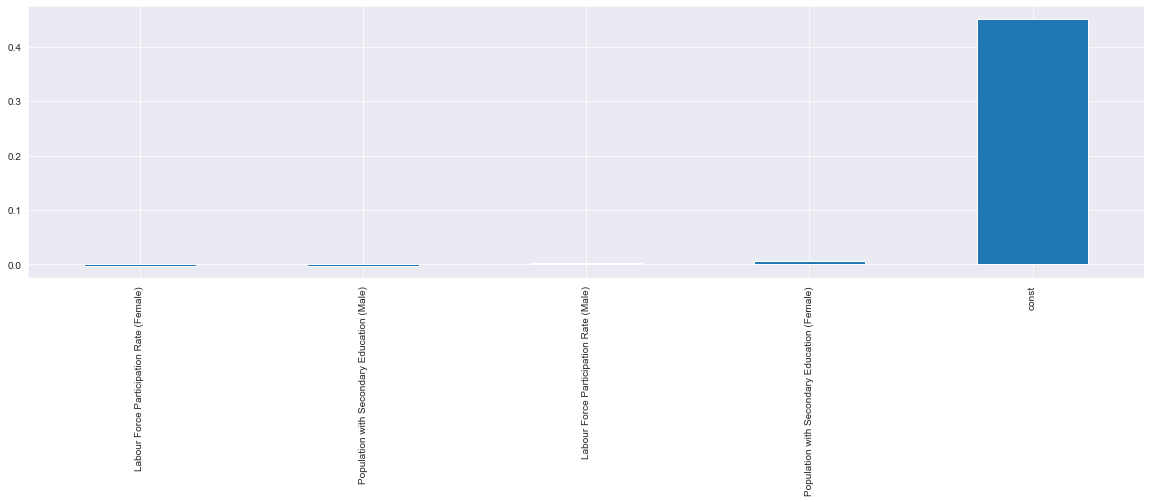

In [46]:
# Create panda core series from regression model paramaters
# Sort values
regression_params = regression_model.params.sort_values()

# Plot regression_params as bar chart
regression_params.plot(kind = 'bar', y = 'Income Index')

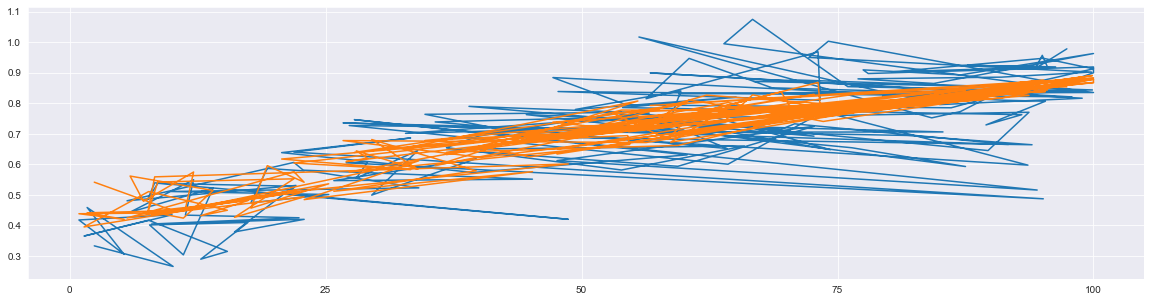

In [47]:
# Create a prediction model column based on independent variables in regression_model 
gii['GII Income Index Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs income index
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(gii['Population with Secondary Education (Female)'], 
       gii[['Income Index', 'GII Income Index Prediction']])

plt.show()

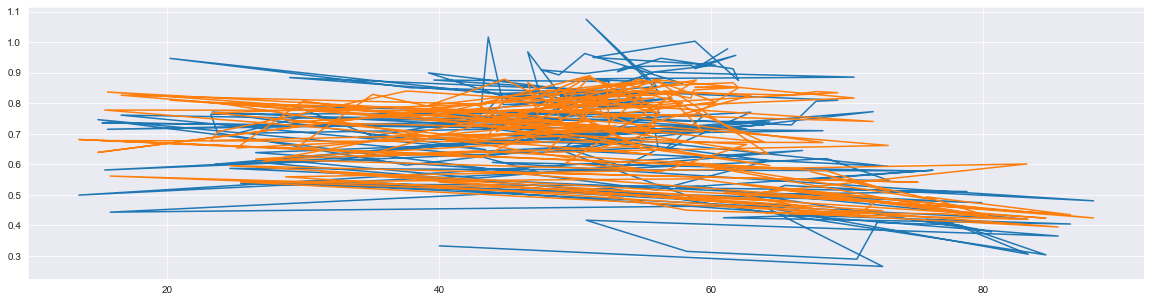

In [48]:
# Create a prediction model column based on independent variables in regression_model 
gii['Labour Income Index Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs income index
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(gii['Labour Force Participation Rate (Female)'], 
       gii[['Income Index', 'Labour Income Index Prediction']])

plt.show()

In [49]:
# Overall GII
# Find regression model between independent and dependent variables as noted above
independent_variables = gii[['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
            'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']]
dependent_variables = gii['Gross National Income (GNI) per Capita']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Gross National Income (GNI) per Capita   R-squared:                       0.345
Model:                                                OLS   Adj. R-squared:                  0.329
Method:                                     Least Squares   F-statistic:                     21.19
Date:                                    Sun, 19 Dec 2021   Prob (F-statistic):           4.70e-14
Time:                                            16:20:27   Log-Likelihood:                -1833.3
No. Observations:                                     166   AIC:                             3677.
Df Residuals:                                         161   BIC:                             3692.
Df Model:                                               4                                         
Covariance Type:                                nonrobust                                         
          

C:\Users\18607\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

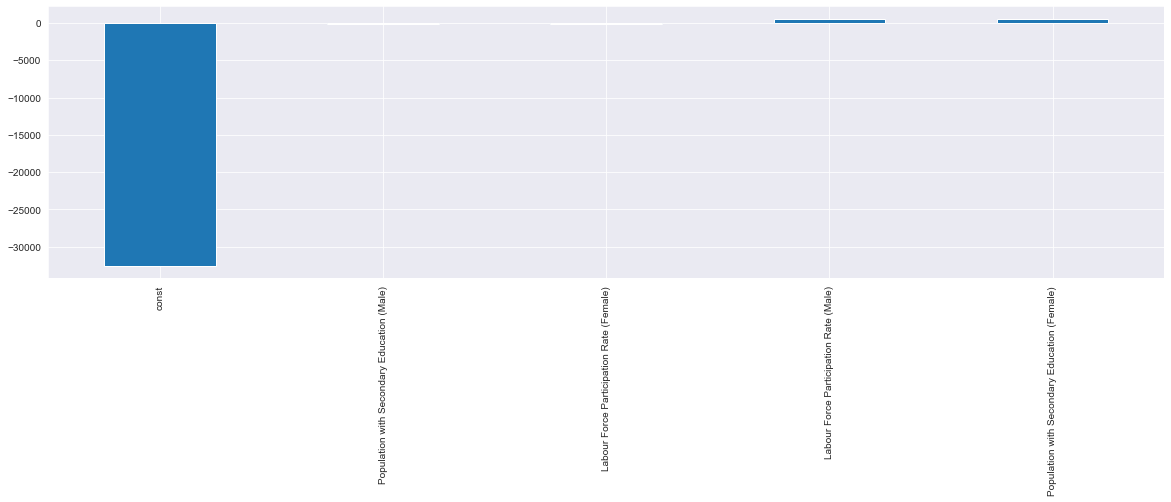

In [50]:
# Create panda core series from regression model paramaters
# Sort values
regression_params = regression_model.params.sort_values()

# Plot regression_params as bar chart
regression_params.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

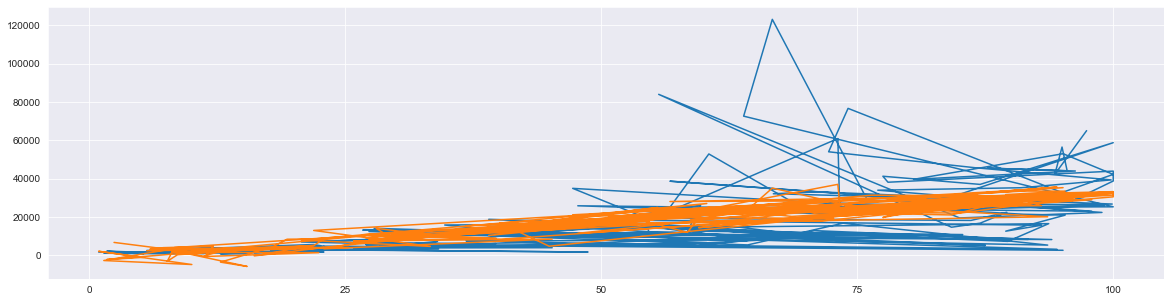

In [51]:
# Create a prediction model column based on independent variables in regression_model 
gii['GII GNI Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs income index
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(gii['Population with Secondary Education (Female)'], 
       gii[['Gross National Income (GNI) per Capita', 'GII GNI Prediction']])

plt.show()

____________________________________________________________________________________________________________________________

SCATTER PLOTS

____________________________________________________________________________________________________________________________

LEVEL DATA

Text(0.5, 0, 'Population with Secondary Education (Female)')

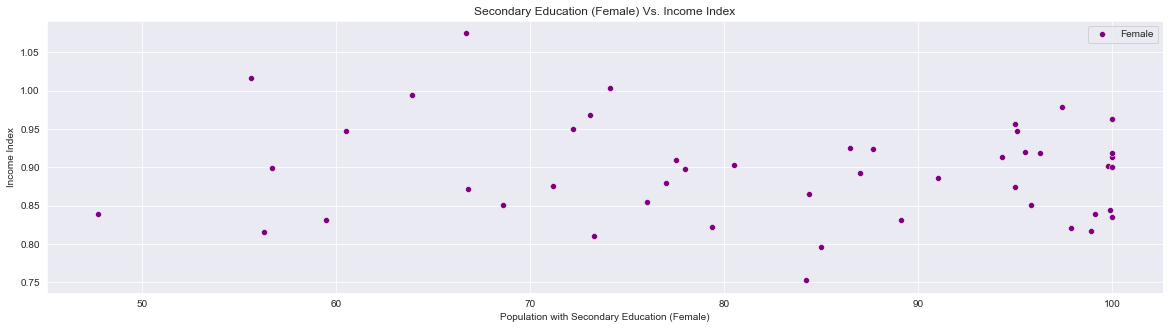

In [143]:
# Scatter plot for Second(F) vs II
# very_high_gii
sns.scatterplot(x = 'Population with Secondary Education (Female)', y = 'Income Index', 
                data = very_high_gii, color = 'purple').set(title = 'Secondary Education (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# Add labels
plt.legend(labels = ['Female', 'Male'])
plt.xlabel('Population with Secondary Education (Female)')

[Text(0.5, 1.0, 'Labour Force Participation Rate (Female) Vs. Income Index')]

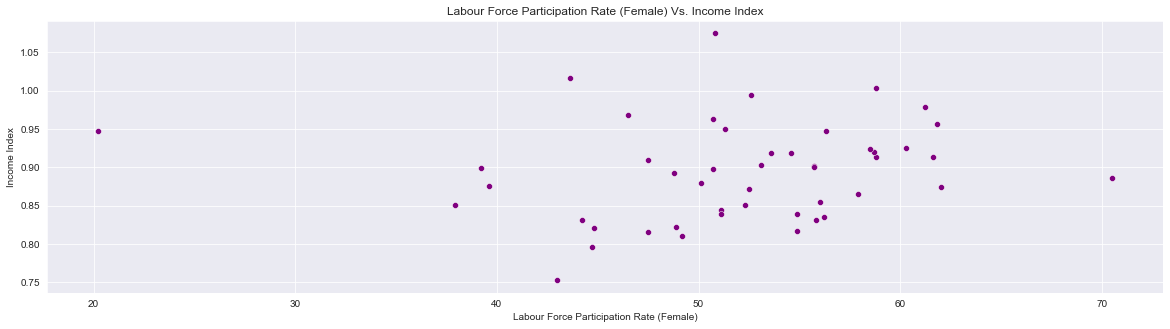

In [144]:
# Scatter plot for Labour(F) vs II
# very_high_gii
sns.scatterplot(x = 'Labour Force Participation Rate (Female)', y = 'Income Index', 
                data = very_high_gii, color = 'purple').set(title = 'Labour Force Participation Rate (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

[Text(0.5, 1.0, 'Secondary Education (Female) Vs. Income Index')]

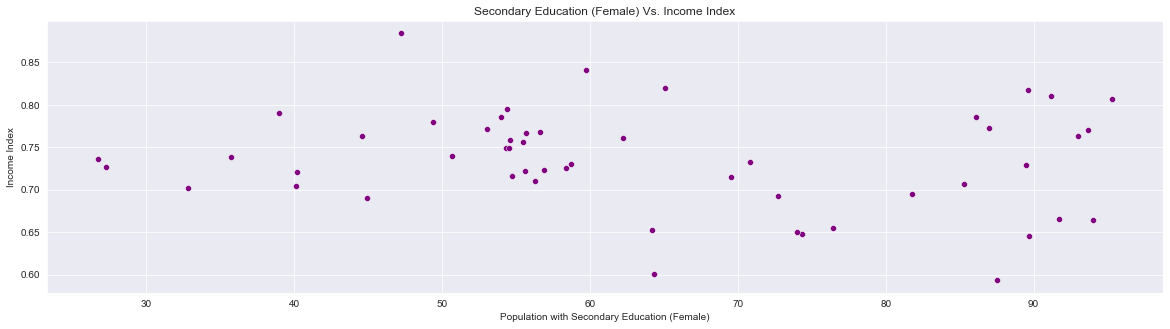

In [145]:
# Scatter plot for Second(F) vs II
# high_gii
sns.scatterplot(x = 'Population with Secondary Education (Female)', y = 'Income Index', 
                data = high_gii, color = 'purple').set(title = 'Secondary Education (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

[Text(0.5, 1.0, 'Labour Force Participation Rate (Female) Vs. Income Index')]

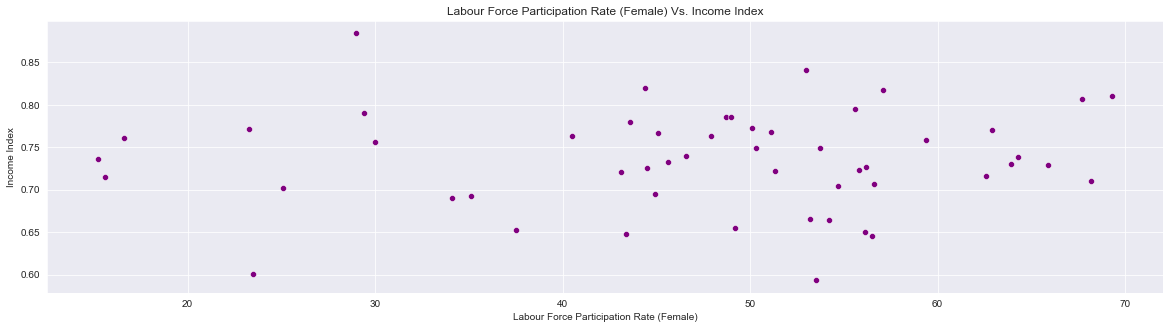

In [146]:
# Scatter plot for Labour(F) vs II
# high_gii
sns.scatterplot(x = 'Labour Force Participation Rate (Female)', y = 'Income Index', 
                data = high_gii, color = 'purple').set(title = 'Labour Force Participation Rate (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

[Text(0.5, 1.0, 'Secondary Education (Female) Vs. Income Index')]

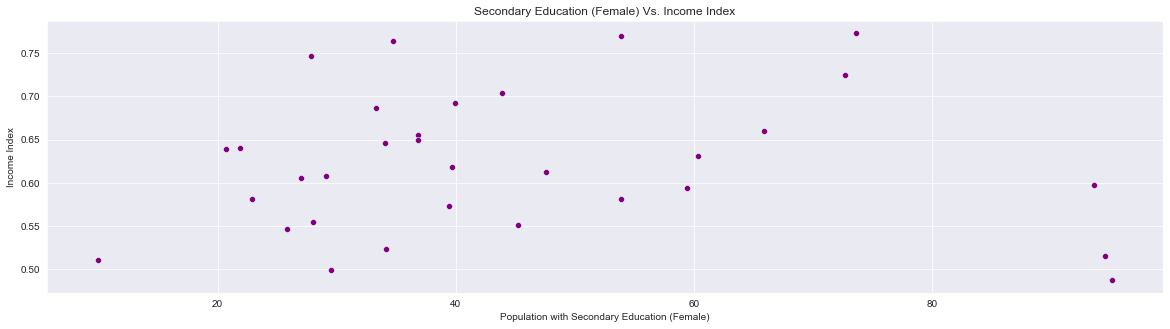

In [147]:
# Scatter plot for Second(F) vs II
# medium_gii
sns.scatterplot(x = 'Population with Secondary Education (Female)', y = 'Income Index', 
                data = medium_gii, color = 'purple').set(title = 'Secondary Education (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

[Text(0.5, 1.0, 'Labour Force Participation Rate (Female) Vs. Income Index')]

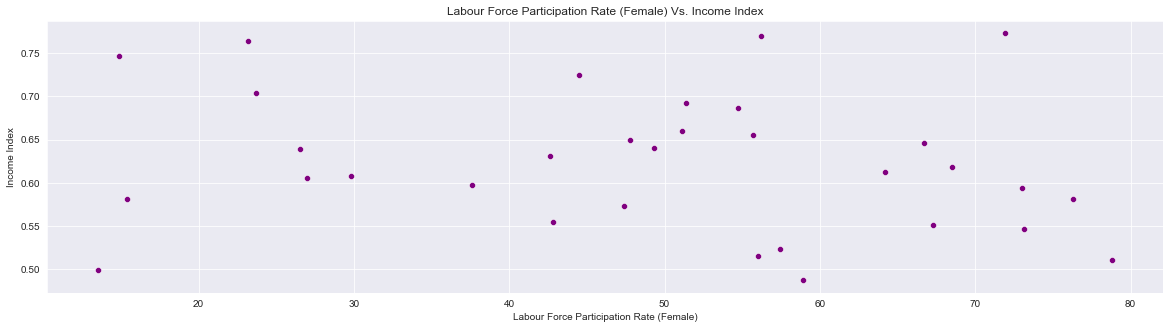

In [148]:
# Scatter plot for Labour(F) vs II
# medium_gii
sns.scatterplot(x = 'Labour Force Participation Rate (Female)', y = 'Income Index', 
                data = medium_gii, color = 'purple').set(title = 'Labour Force Participation Rate (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

[Text(0.5, 1.0, 'Secondary Education (Female) Vs. Income Index')]

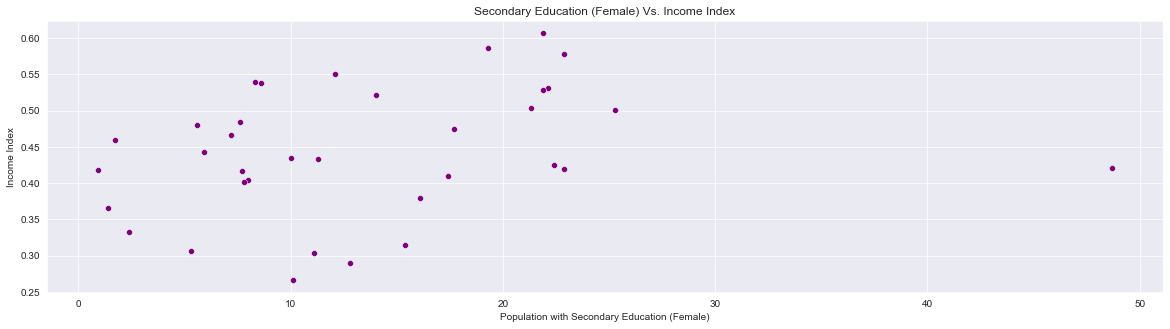

In [149]:
# Scatter plot for Second(F) vs II
# low_gii
sns.scatterplot(x = 'Population with Secondary Education (Female)', y = 'Income Index', 
                data = low_gii, color = 'purple').set(title = 'Secondary Education (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

[Text(0.5, 1.0, 'Labour Force Participation Rate (Female) Vs. Income Index')]

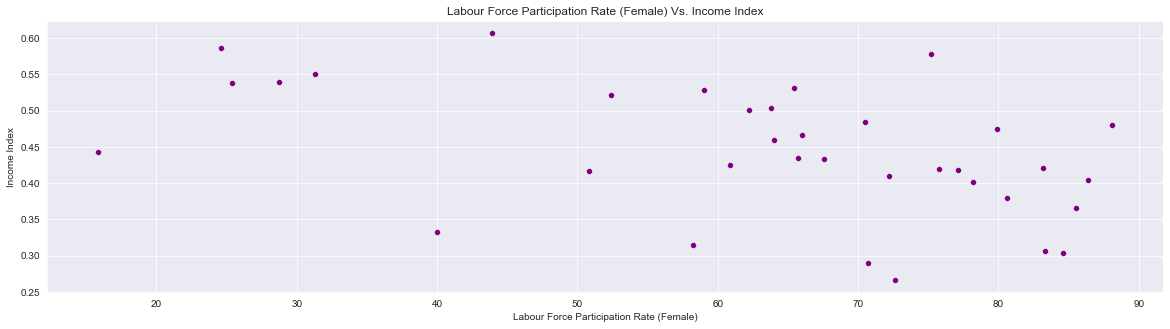

In [150]:
# Scatter plot for Labour(F) vs II
# low_gii
sns.scatterplot(x = 'Labour Force Participation Rate (Female)', y = 'Income Index', 
                data = low_gii, color = 'purple').set(title = 'Labour Force Participation Rate (Female) Vs. Income Index')
#sns.scatterplot(x = 'Population with Secondary Education (Male)', y = 'Income Index', 
                #data = very_high_gii, color = 'black')

# label education factors
#plt.legend(labels = ['Female', 'Male'])

____________________________________________________________________________________________________________________________

HEATMAPS

____________________________________________________________________________________________________________________________

<AxesSubplot:>

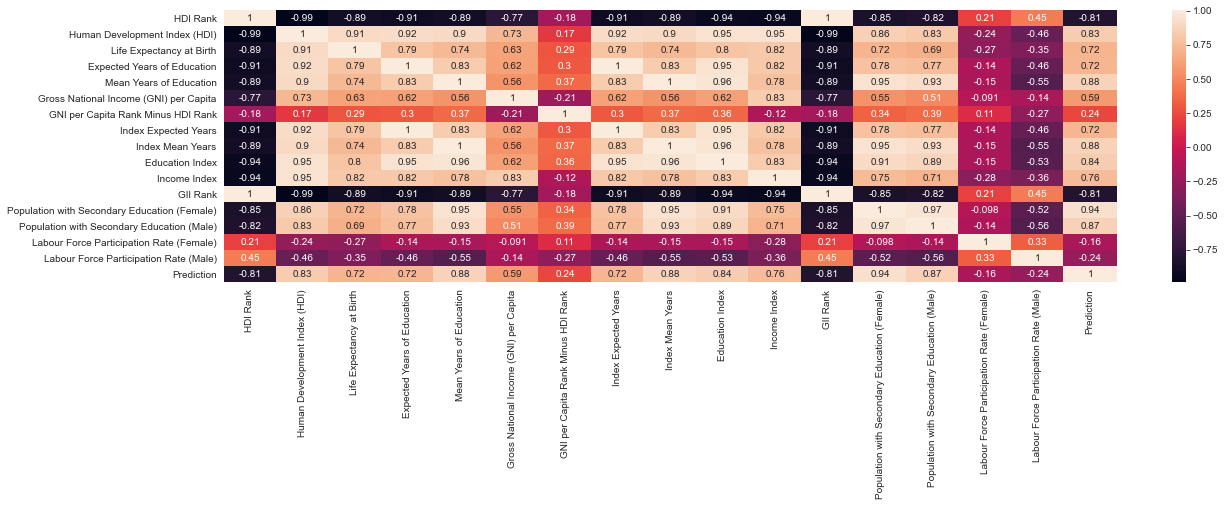

In [151]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_vh_gii = gii.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_vh_gii, annot = True)

<AxesSubplot:>

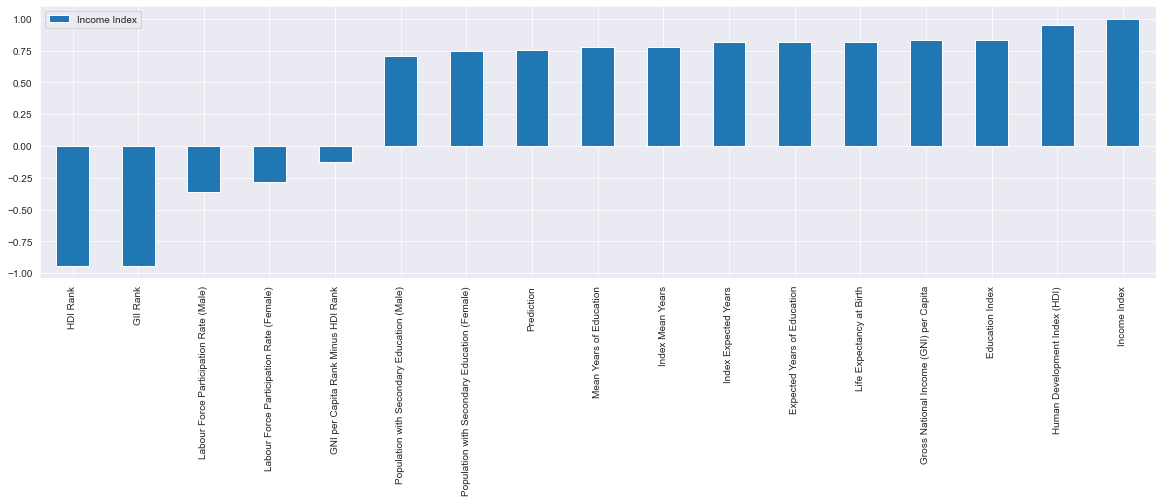

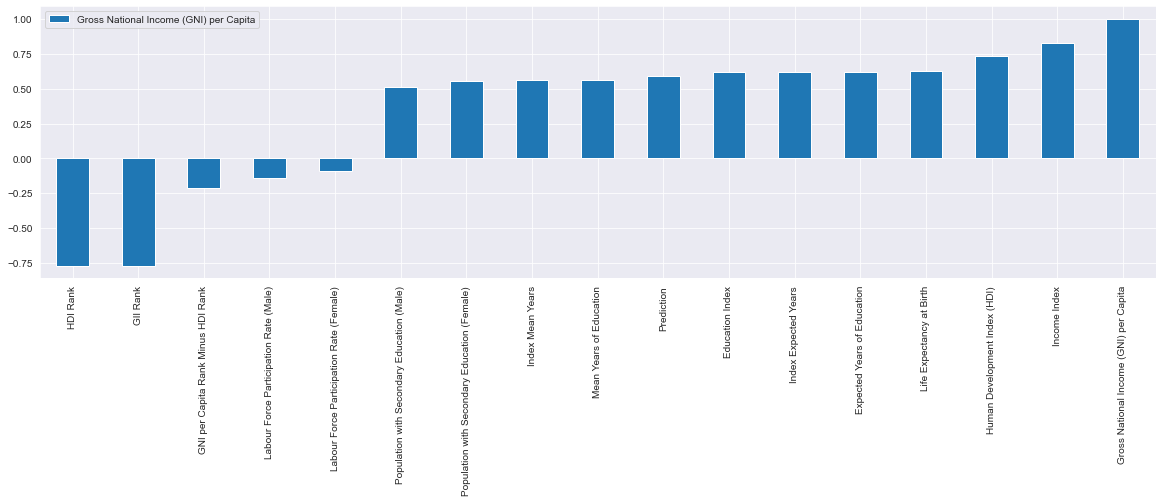

In [152]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_vh_gii.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_vh_gii.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

<AxesSubplot:>

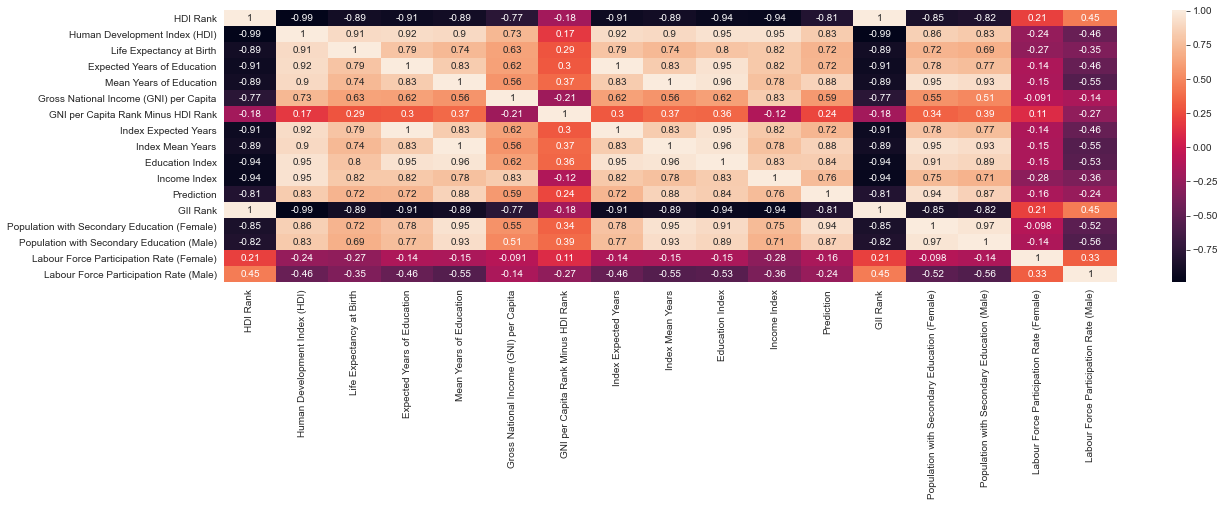

In [167]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_h_gii = gii.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_h_gii, annot = True)

<AxesSubplot:>

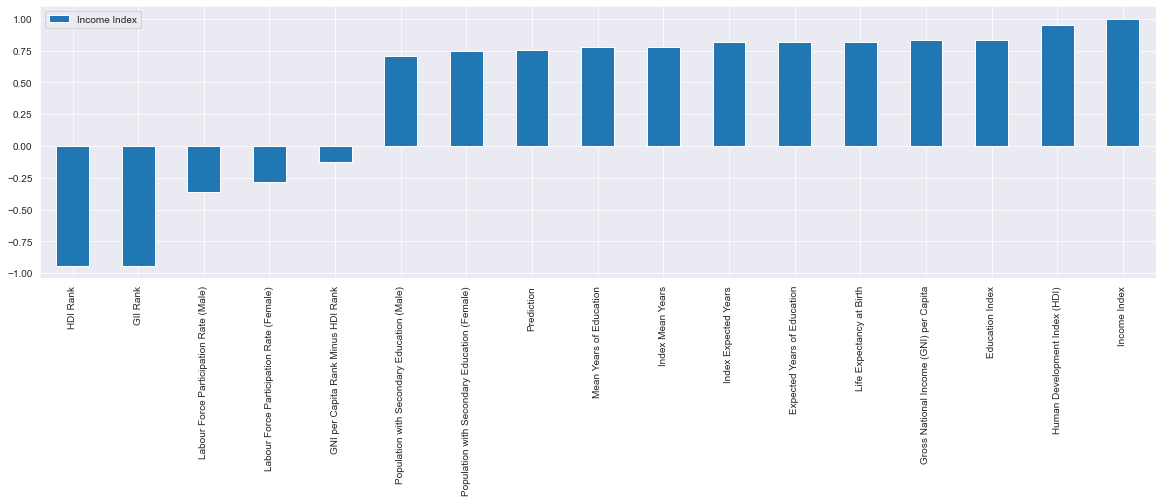

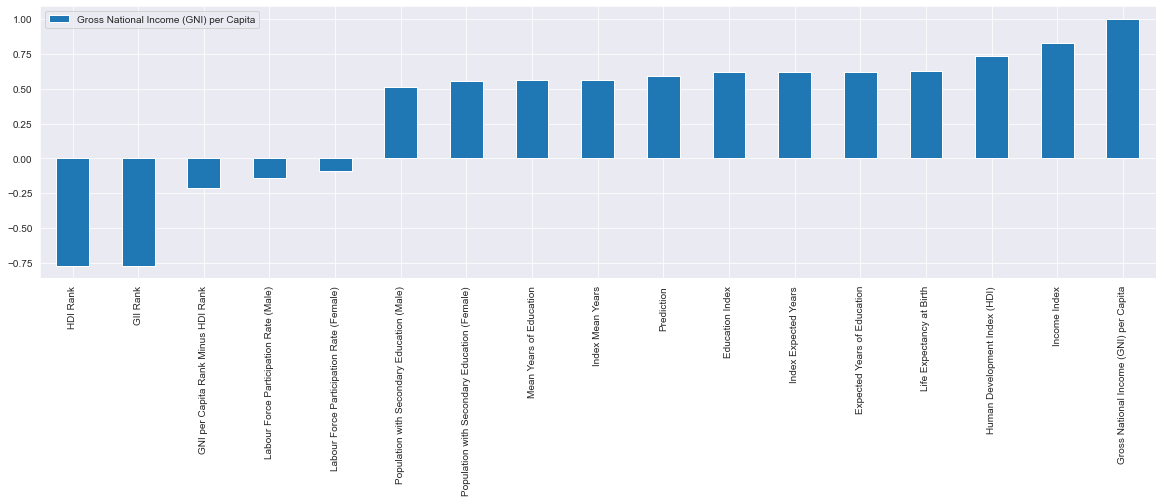

In [168]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_h_gii.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_h_gii.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

<AxesSubplot:>

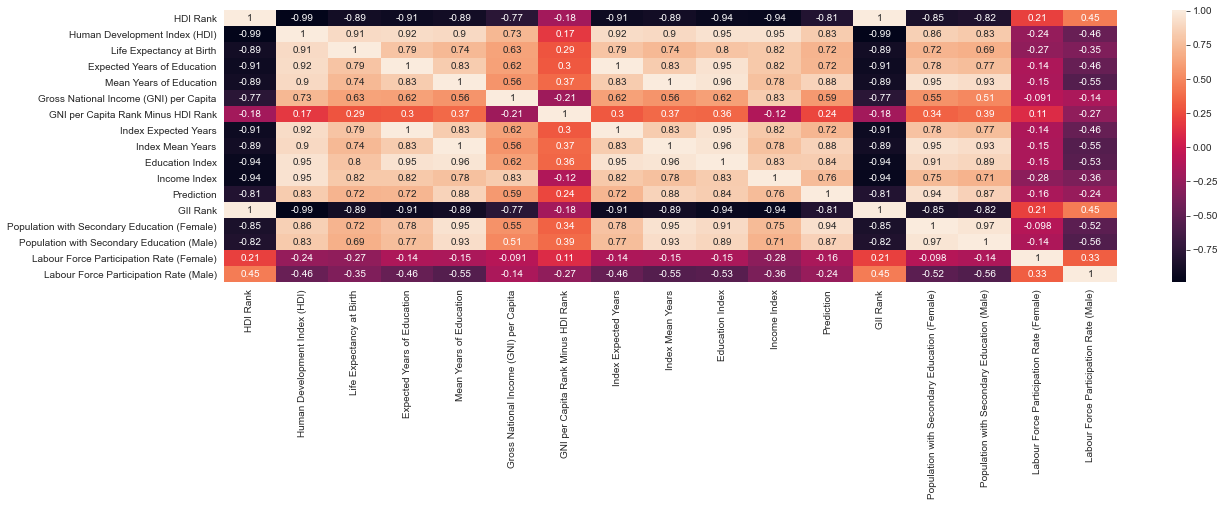

In [169]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_m_gii = gii.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_m_gii, annot = True)

<AxesSubplot:>

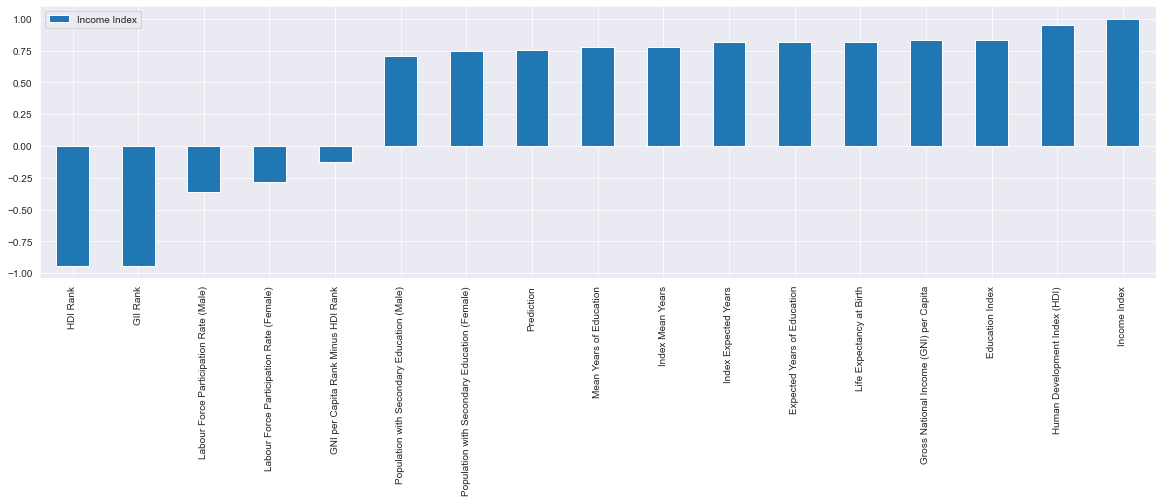

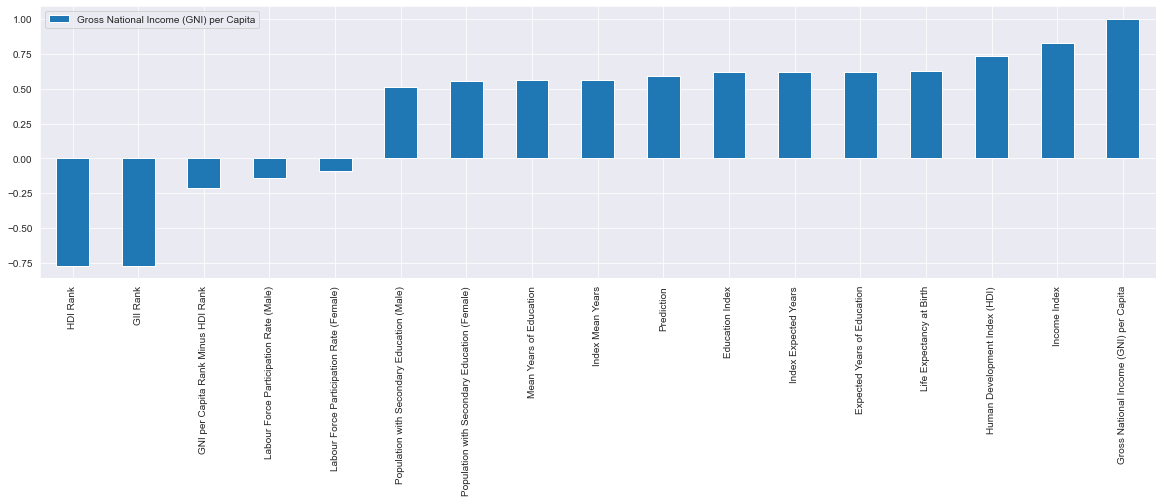

In [170]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_m_gii.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_m_gii.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

<AxesSubplot:>

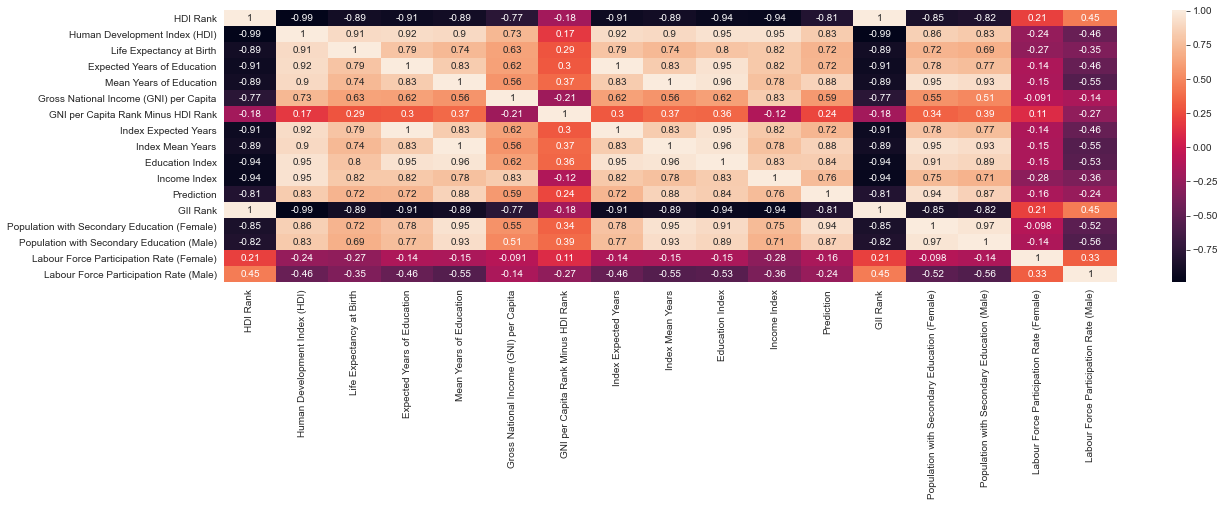

In [171]:
# Find correlations between values of interest through heatmap
# Compute pairwise correlation between column values
correlated_l_gii = gii.corr()

# Generate heatmap from pairwise correlations
sns.heatmap(correlated_l_gii, annot = True)

<AxesSubplot:>

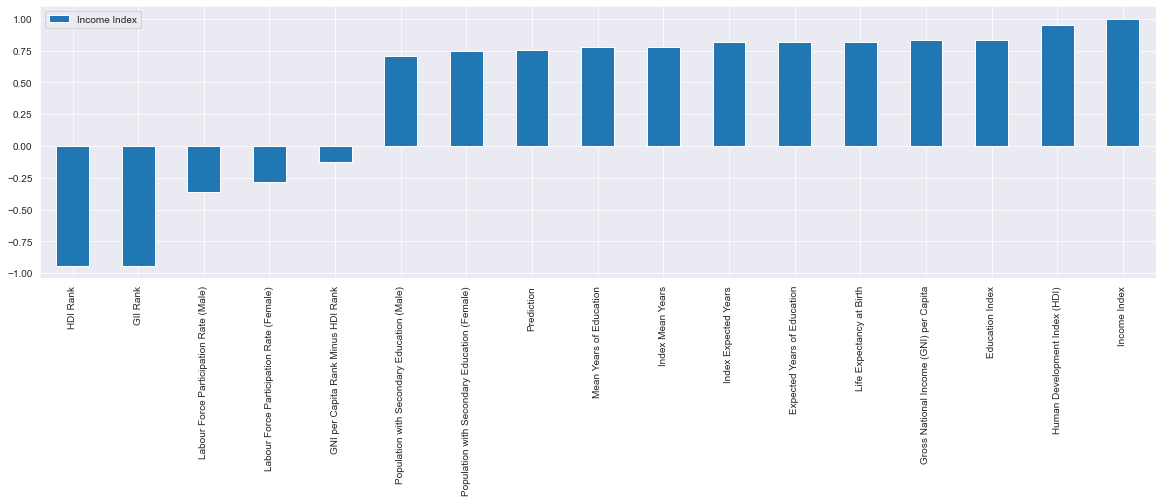

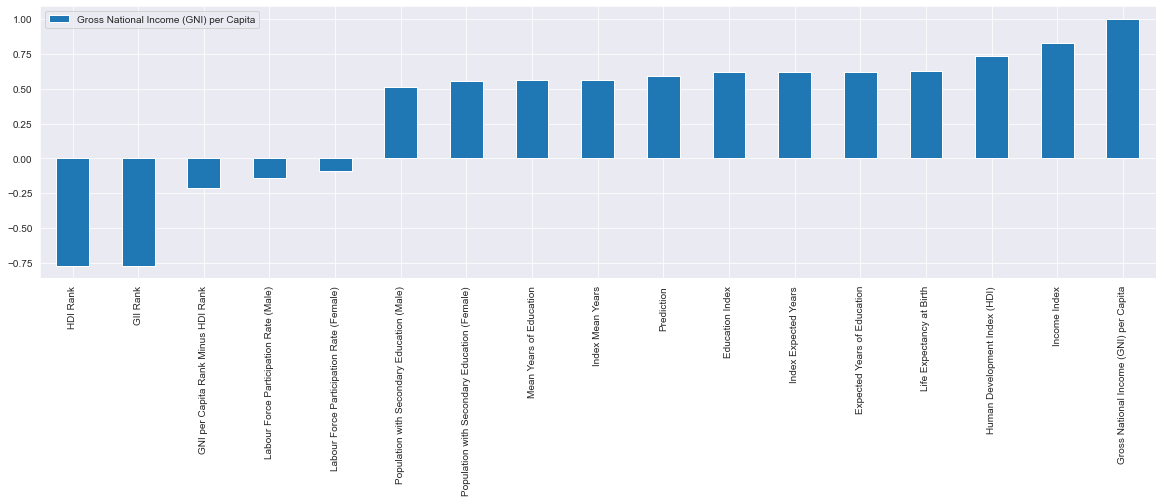

In [172]:
# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_l_gii.sort_values('Income Index', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Income Index')

# Create bar plots to see correlations with income index and GNI
sorted_correlated_index = correlated_l_gii.sort_values('Gross National Income (GNI) per Capita', ascending = True)
sorted_correlated_index.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

____________________________________________________________________________________________________________________________

REGRESSION MODELS

____________________________________________________________________________________________________________________________

In [153]:
# very_hgih_gii df
# Find regression model between independent and dependent variables as noted above
independent_variables = very_high_gii[['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
            'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']]
dependent_variables = very_high_gii['Gross National Income (GNI) per Capita']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Gross National Income (GNI) per Capita   R-squared:                       0.417
Model:                                                OLS   Adj. R-squared:                  0.362
Method:                                     Least Squares   F-statistic:                     7.525
Date:                                    Wed, 15 Dec 2021   Prob (F-statistic):           0.000115
Time:                                            16:49:43   Log-Likelihood:                -518.70
No. Observations:                                      47   AIC:                             1047.
Df Residuals:                                          42   BIC:                             1057.
Df Model:                                               4                                         
Covariance Type:                                nonrobust                                         
          

The null hypothesis cannot be rejected because of the high p value

In [154]:
# hgih_gii df
# Find regression model between independent and dependent variables as noted above
independent_variables = high_gii[['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
            'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']]
dependent_variables = high_gii['Gross National Income (GNI) per Capita']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Gross National Income (GNI) per Capita   R-squared:                       0.084
Model:                                                OLS   Adj. R-squared:                  0.006
Method:                                     Least Squares   F-statistic:                     1.081
Date:                                    Wed, 15 Dec 2021   Prob (F-statistic):              0.376
Time:                                            16:49:44   Log-Likelihood:                -518.82
No. Observations:                                      52   AIC:                             1048.
Df Residuals:                                          47   BIC:                             1057.
Df Model:                                               4                                         
Covariance Type:                                nonrobust                                         
          

In [155]:
# medium_gii df
# Find regression model between independent and dependent variables as noted above
independent_variables = medium_gii[['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
            'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']]
dependent_variables = medium_gii['Gross National Income (GNI) per Capita']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Gross National Income (GNI) per Capita   R-squared:                       0.089
Model:                                                OLS   Adj. R-squared:                 -0.046
Method:                                     Least Squares   F-statistic:                    0.6606
Date:                                    Wed, 15 Dec 2021   Prob (F-statistic):              0.625
Time:                                            16:49:46   Log-Likelihood:                -309.09
No. Observations:                                      32   AIC:                             628.2
Df Residuals:                                          27   BIC:                             635.5
Df Model:                                               4                                         
Covariance Type:                                nonrobust                                         
          

In [156]:
# low_gii df
# Find regression model between independent and dependent variables as noted above
independent_variables = low_gii[['Population with Secondary Education (Female)', 'Population with Secondary Education (Male)', 
            'Labour Force Participation Rate (Female)', 'Labour Force Participation Rate (Male)']]
dependent_variables = low_gii['Gross National Income (GNI) per Capita']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Gross National Income (GNI) per Capita   R-squared:                       0.526
Model:                                                OLS   Adj. R-squared:                  0.463
Method:                                     Least Squares   F-statistic:                     8.316
Date:                                    Wed, 15 Dec 2021   Prob (F-statistic):           0.000122
Time:                                            16:49:48   Log-Likelihood:                -285.72
No. Observations:                                      35   AIC:                             581.4
Df Residuals:                                          30   BIC:                             589.2
Df Model:                                               4                                         
Covariance Type:                                nonrobust                                         
          

<AxesSubplot:>

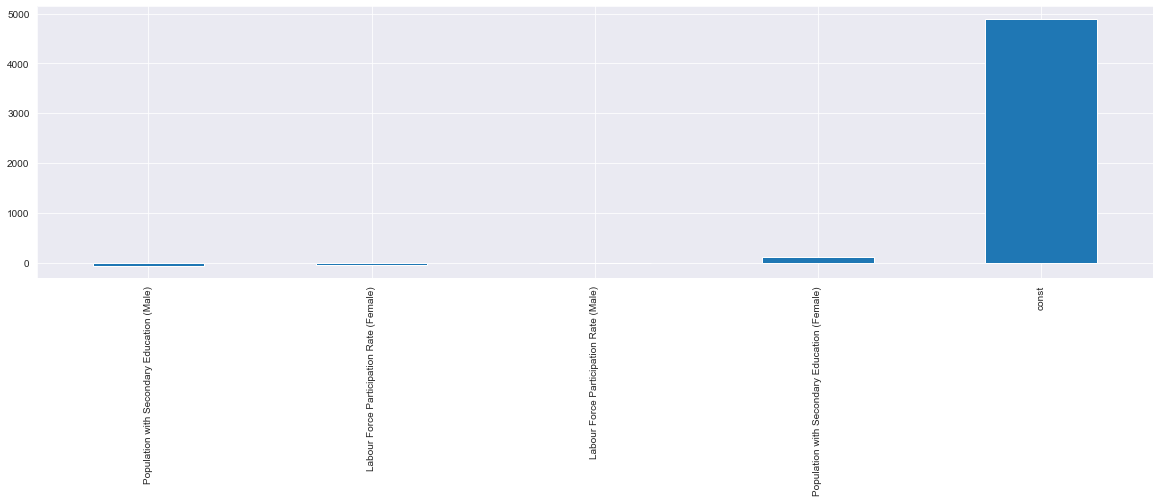

In [157]:
# Create panda core series from regression model paramaters
# Sort values
regression_params = regression_model.params.sort_values()

# Plot regression_params as bar chart
regression_params.plot(kind = 'bar', y = 'Gross National Income (GNI) per Capita')

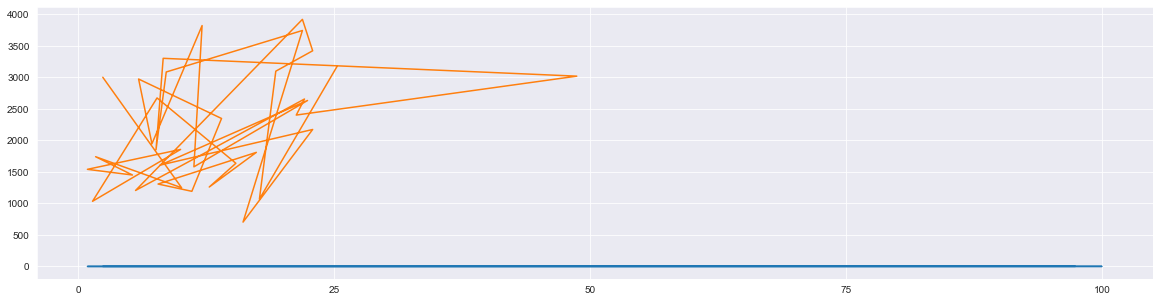

In [158]:
# Create a prediction model column based on independent variables in regression_model 
gii['Prediction'] = regression_model.predict(independent_variables)

# Plot prediction over education index vs income index
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(gii['Population with Secondary Education (Female)'], 
       gii[['Income Index', 'Prediction']])

plt.show()

# MPI Data Analysis

The final DataFrame is the Multidimensional Poverty Index (MPI). This index does not include sex desegregated data, but we still might be able to find some useful imformation. The index identifies multiple deprivations at the household level in education, health, and standard of living.

Now that we know which countries have the highest education inequalities and lowest economic potentials, we can begin to zoom in on what life looks like in these countries and see what similarities exist. Then, we can compare them to the highest performing countries. 

## Descriptive

In [159]:
# Describe the DataFrame
print(mpi.info())
mpi.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 92
Data columns (total 45 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   HDI Rank                                             78 non-null     float64
 1   Country                                              78 non-null     object 
 2   Human Development Index (HDI)                        78 non-null     float64
 3   Life Expectancy at Birth                             78 non-null     float64
 4   Expected Years of Education                          78 non-null     float64
 5   Mean Years of Education                              78 non-null     float64
 6   Gross National Income (GNI) per Capita               78 non-null     float64
 7   GNI per Capita Rank Minus HDI Rank                   78 non-null     float64
 8   Index Expected Years                                 78 non-null     flo

HDI Rank     Country  Human Development Index (HDI)  \
1      49.0  Montenegro                          0.802   
2      50.0     Belarus                          0.798   
3      56.0  Kazakhstan                          0.788   
6      66.0      Serbia                          0.771   
7      74.0      Mexico                          0.756   

   Life Expectancy at Birth  Expected Years of Education  \
1                      76.2                         15.2   
2                      71.3                         15.7   
3                      69.4                         15.0   
6                      74.9                         14.4   
7                      76.8                         13.1   

   Mean Years of Education  Gross National Income (GNI) per Capita  \
1                     11.2                                 14558.0   
2                     12.0                                 16676.0   
3                     11.4                                 20867.0   
6                     10.5                                 12190.0   
7                      8.5                                 16056.0   

   GNI per Capita Rank Minus HDI Rank  Index Expected Years  Index Mean Years  \
1                                27.0              0.844444          0.622222   
2                                14.0              0.872222          0.666667   
3                                -1.0              0.833333          0.633333   
6                                20.0              0.800000          0.583333   
7                                -4.0              0.727778          0.472222   

   ...  MPI HDRO Percent  Multidimensional Poverty Index (MPI, 2010)  \
1  ...               0.5                                       0.001   
2  ...               0.4                                       0.000   
3  ...               1.1                                       0.001   
6  ...               0.4                                       0.001   
7  ...               6.0                                       0.011   

  MPI 2010 Percent  Population in Multidimensional Poverty  \
1              0.3                                     3.0   
2              0.0                                    41.0   
3              0.2                                   173.0   
6              0.2                                    41.0   
7              2.8                                  7272.0   

   Intensity of Deprivation  Education Deprivation  Health Deprivation  \
1                      38.9                   22.0                59.9   
2                      34.5                    2.6                89.7   
3                      36.4                    4.3                83.9   
6                      40.6                   30.7                40.7   
7                      39.9                   31.4                25.6   

  Living Standards Population Below National Poverty Line  \
1             18.1                                   11.3   
2              7.7                                    5.5   
3             11.8                                    2.9   
6             28.7                                   24.6   
7             43.0                                   52.3   

   Population Below $1.25 per Day  
1                             0.2  
2                             0.0  
3                             0.1  
6                             0.1  
7                             1.0  

[5 rows x 45 columns]

____________________________________________________________________________________________________________________________

MEAN & MEDIAN

____________________________________________________________________________________________________________________________

OVERALL

In [160]:
# Start by finding the mean & median of new values of interest
# Create a list of values to iterate through
mpi_interest = ['Income Index', 'Education Index', 'Education Index (Female)', 'Education Index (Male)','Population in Multidimensional Poverty', 'Intensity of Deprivation', 'Education Deprivation', 
                'Living Standards', 'Population Below National Poverty Line', 'Population Below $1.25 per Day']
# iterate through mpi to find mean and median for values within mpi_interest
for i in mpi_interest:
    mean = round(np.mean(mpi[i]),2)
    median = round(np.mean(mpi[i]),2)
    print(i + ' Mean : ' + str(mean))
    print(i + ' Median : ' + str(median))

Income Index Mean : 0.56
Income Index Median : 0.56
Education Index Mean : 0.49
Education Index Median : 0.49
Education Index (Female) Mean : 0.46
Education Index (Female) Median : 0.46
Education Index (Male) Mean : 0.48
Education Index (Male) Median : 0.48
Population in Multidimensional Poverty Mean : 17843.71
Population in Multidimensional Poverty Median : 17843.71
Intensity of Deprivation Mean : 46.48
Intensity of Deprivation Median : 46.48
Education Deprivation Mean : 25.62
Education Deprivation Median : 25.62
Living Standards Mean : 37.19
Living Standards Median : 37.19
Population Below National Poverty Line Mean : 35.54
Population Below National Poverty Line Median : 35.54
Population Below $1.25 per Day Mean : 26.19
Population Below $1.25 per Day Median : 26.19


LEVEL DATA

In [161]:
# Find mean and median for high_mpi
for i in mpi_interest:
    mean = round(np.mean(high_mpi[i]),2)
    median = round(np.mean(high_mpi[i]),2)
    print(i + ' Mean : ' + str(mean))
    print(i + ' Median : ' + str(median))

Income Index Mean : 0.72
Income Index Median : 0.72
Education Index Mean : 0.64
Education Index Median : 0.64
Education Index (Female) Mean : 0.64
Education Index (Female) Median : 0.64
Education Index (Male) Mean : 0.62
Education Index (Male) Median : 0.62
Population in Multidimensional Poverty Mean : 1195.47
Population in Multidimensional Poverty Median : 1195.47
Intensity of Deprivation Mean : 38.56
Intensity of Deprivation Median : 38.56
Education Deprivation Mean : 20.28
Education Deprivation Median : 20.28
Living Standards Mean : 25.59
Living Standards Median : 25.59
Population Below National Poverty Line Mean : 19.82
Population Below National Poverty Line Median : 19.82
Population Below $1.25 per Day Mean : 2.01
Population Below $1.25 per Day Median : 2.01


In [162]:
# Find mean and median for medium_mpi
for i in mpi_interest:
    mean = round(np.mean(medium_mpi[i]),2)
    median = round(np.mean(medium_mpi[i]),2)
    print(i + ' Mean : ' + str(mean))
    print(i + ' Median : ' + str(median))

Income Index Mean : 0.6
Income Index Median : 0.6
Education Index Mean : 0.52
Education Index Median : 0.52
Education Index (Female) Mean : 0.49
Education Index (Female) Median : 0.49
Education Index (Male) Mean : 0.5
Education Index (Male) Median : 0.5
Population in Multidimensional Poverty Mean : 31300.04
Population in Multidimensional Poverty Median : 31300.04
Intensity of Deprivation Mean : 44.18
Intensity of Deprivation Median : 44.18
Education Deprivation Mean : 27.04
Education Deprivation Median : 27.04
Living Standards Mean : 36.38
Living Standards Median : 36.38
Population Below National Poverty Line Mean : 33.24
Population Below National Poverty Line Median : 33.24
Population Below $1.25 per Day Mean : 17.87
Population Below $1.25 per Day Median : 17.87


In [163]:
# Find mean and median for low_mpi
for i in mpi_interest:
    mean = round(np.mean(low_mpi[i]),2)
    median = round(np.mean(low_mpi[i]),2)
    print(i + ' Mean : ' + str(mean))
    print(i + ' Median : ' + str(median))

Income Index Mean : 0.44
Income Index Median : 0.44
Education Index Mean : 0.37
Education Index Median : 0.37
Education Index (Female) Mean : 0.33
Education Index (Female) Median : 0.33
Education Index (Male) Mean : 0.37
Education Index (Male) Median : 0.37
Population in Multidimensional Poverty Mean : 17775.48
Population in Multidimensional Poverty Median : 17775.48
Intensity of Deprivation Mean : 53.03
Intensity of Deprivation Median : 53.03
Education Deprivation Mean : 27.74
Education Deprivation Median : 27.74
Living Standards Mean : 45.05
Living Standards Median : 45.05
Population Below National Poverty Line Mean : 47.07
Population Below National Poverty Line Median : 47.07
Population Below $1.25 per Day Mean : 47.21
Population Below $1.25 per Day Median : 47.21


____________________________________________________________________________________________________________________________

SPREAD

____________________________________________________________________________________________________________________________

OVERALL

In [164]:
# Overall mpi data
# Find spread

# Define Q1 & Q3
q1 = mpi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = mpi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in mpi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Income Index IQR is:   0.23, Lower limit is:   0.12, and upper limit is:   1.04
Education Index IQR is:   0.2, Lower limit is:   0.1, and upper limit is:   0.9
Education Index (Female) IQR is:   0.23, Lower limit is:   0.02, and upper limit is:   0.94
Education Index (Male) IQR is:   0.19, Lower limit is:   0.11, and upper limit is:   0.86
Population in Multidimensional Poverty IQR is:   9763.75, Lower limit is:   -14266.88, and upper limit is:   24788.12
Intensity of Deprivation IQR is:   12.1, Lower limit is:   21.3, and upper limit is:   69.7
Education Deprivation IQR is:   14.45, Lower limit is:   -3.07, and upper limit is:   54.72
Living Standards IQR is:   16.3, Lower limit is:   6.32, and upper limit is:   71.53
Population Below National Poverty Line IQR is:   26.1, Lower limit is:   -17.15, and upper limit is:   87.25
Population Below $1.25 per Day IQR is:   40.93, Lower limit is:   -58.95, and upper limit is:   104.77


In [165]:
# mpi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = mpi[((mpi < lower_limit) | ((mpi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in mpi df')
# Count original amount of rows
count = mpi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in mpi df is within the IQR')

There are 18 outliers in mpi df
76.92% of the data in mpi df is within the IQR


LEVEL DATA

In [166]:
# high_mpi data
# Find spread

# Define Q1 & Q3
q1 = high_mpi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = high_mpi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in mpi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Income Index IQR is:   0.05, Lower limit is:   0.62, and upper limit is:   0.82
Education Index IQR is:   0.07, Lower limit is:   0.49, and upper limit is:   0.78
Education Index (Female) IQR is:   0.09, Lower limit is:   0.46, and upper limit is:   0.82
Education Index (Male) IQR is:   0.06, Lower limit is:   0.49, and upper limit is:   0.73
Population in Multidimensional Poverty IQR is:   579.0, Lower limit is:   -805.5, and upper limit is:   1510.5
Intensity of Deprivation IQR is:   2.75, Lower limit is:   33.17, and upper limit is:   44.18
Education Deprivation IQR is:   16.45, Lower limit is:   -11.57, and upper limit is:   54.22
Living Standards IQR is:   17.55, Lower limit is:   -11.38, and upper limit is:   58.82
Population Below National Poverty Line IQR is:   15.1, Lower limit is:   -11.9, and upper limit is:   48.5
Population Below $1.25 per Day IQR is:   2.45, Lower limit is:   -3.53, and upper limit is:   6.28


In [167]:
# mpi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = high_mpi[((high_mpi < lower_limit) | ((high_mpi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in high_mpi df')
# Count original amount of rows
count = high_mpi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in high_mpi df is within the IQR')

There are 11 outliers in high_mpi df
42.11% of the data in high_mpi df is within the IQR


In [168]:
# medium_mpi data
# Find spread

# Define Q1 & Q3
q1 = medium_mpi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = medium_mpi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in mpi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Income Index IQR is:   0.1, Lower limit is:   0.4, and upper limit is:   0.8
Education Index IQR is:   0.12, Lower limit is:   0.27, and upper limit is:   0.75
Education Index (Female) IQR is:   0.14, Lower limit is:   0.2, and upper limit is:   0.77
Education Index (Male) IQR is:   0.12, Lower limit is:   0.25, and upper limit is:   0.73
Population in Multidimensional Poverty IQR is:   5527.0, Lower limit is:   -7596.5, and upper limit is:   14511.5
Intensity of Deprivation IQR is:   8.0, Lower limit is:   27.4, and upper limit is:   59.4
Education Deprivation IQR is:   23.8, Lower limit is:   -21.8, and upper limit is:   73.4
Living Standards IQR is:   16.2, Lower limit is:   5.9, and upper limit is:   70.7
Population Below National Poverty Line IQR is:   24.6, Lower limit is:   -15.0, and upper limit is:   83.4
Population Below $1.25 per Day IQR is:   24.7, Lower limit is:   -33.15, and upper limit is:   65.65


In [169]:
# medium_mpi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = medium_mpi[((medium_mpi < lower_limit) | ((medium_mpi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in medium_mpi df')
# Count original amount of rows
count = medium_mpi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in medium_mpi df is within the IQR')

There are 9 outliers in medium_mpi df
64.0% of the data in medium_mpi df is within the IQR


In [170]:
# low_mpi data
# Find spread

# Define Q1 & Q3
q1 = low_mpi.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
q3 = low_mpi.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

# Calculate IQR
iqr = round(q3 - q1, 2)

# To find outliers, need to find upper and lower limit
# Define upper & lower limits 
lower_limit = round(q1 - 1.5 * iqr, 2)
upper_limit = round(q3 + 1.5 * iqr, 2)

# Print IQR
for i in mpi_interest:
    print(i + ' IQR is:   ' + str(iqr[i]) + ', Lower limit is:   ' + str(lower_limit[i]) + 
          ', and upper limit is:   ' + str(upper_limit[i]))

Income Index IQR is:   0.12, Lower limit is:   0.2, and upper limit is:   0.68
Education Index IQR is:   0.12, Lower limit is:   0.14, and upper limit is:   0.62
Education Index (Female) IQR is:   0.13, Lower limit is:   0.07, and upper limit is:   0.59
Education Index (Male) IQR is:   0.11, Lower limit is:   0.15, and upper limit is:   0.58
Population in Multidimensional Poverty IQR is:   12522.0, Lower limit is:   -14059.0, and upper limit is:   36029.0
Intensity of Deprivation IQR is:   4.7, Lower limit is:   43.05, and upper limit is:   61.85
Education Deprivation IQR is:   9.3, Lower limit is:   9.85, and upper limit is:   47.05
Living Standards IQR is:   8.6, Lower limit is:   27.5, and upper limit is:   61.9
Population Below National Poverty Line IQR is:   13.2, Lower limit is:   22.2, and upper limit is:   75.0
Population Below $1.25 per Day IQR is:   25.7, Lower limit is:   -3.55, and upper limit is:   99.25


In [171]:
# low_mpi Data
# Calculate if any datapoints go above or below the IQR 
# Data going above or below saved in new df called outliers
outliers = low_mpi[((low_mpi < lower_limit) | ((low_mpi > upper_limit))).any(axis = 1)]

# Count how many rows are left when only outliers remain
count_out = outliers.shape[0]
# Print number of outliers in DataFrame
print('There are ' + str(count_out) + ' outliers in low_mpi df')
# Count original amount of rows
count = low_mpi.shape[0]

# Find what percent of the original data remains after taking out the outliers
percent = round((count - count_out)/count * 100, 2)
print(str(percent) + '% of the data in low_mpi df is within the IQR')

There are 9 outliers in low_mpi df
72.73% of the data in low_mpi df is within the IQR


____________________________________________________________________________________________________________________________

BOXPLOTS

____________________________________________________________________________________________________________________________

OVERALL

Text(0.5, 1.0, 'Population in Multidimensional Poverty')

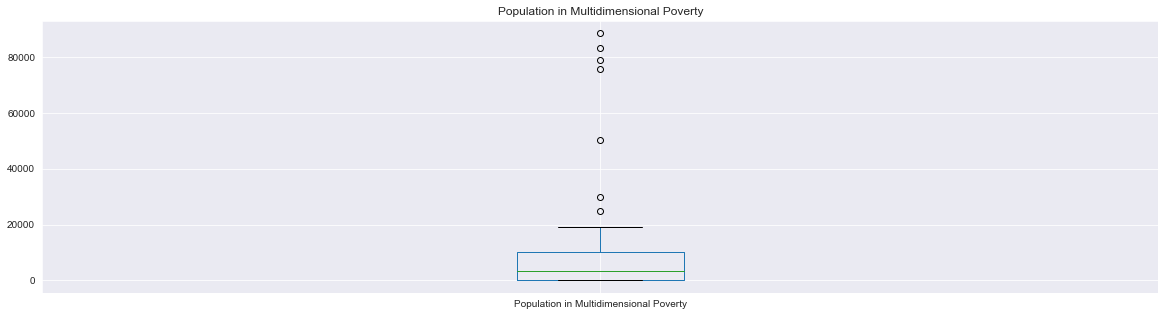

In [172]:
# Construct boxplots to show population living in poverty per country
# Overall MPI data

# Drop largest outlier since cannot see boxplot when it is in mpi
new = mpi[['Population in Multidimensional Poverty','level']].sort_values(by = 'Population in Multidimensional Poverty',ascending=True)
new.drop(48, inplace = True)
new.drop(45, inplace = True)

# Create boxplot to view spread of Population in Multidimensional Poverty with highest outlier dropped
new.plot(kind = 'box')
plt.title('Population in Multidimensional Poverty')


Text(0.5, 1.0, 'Deprivation measures')

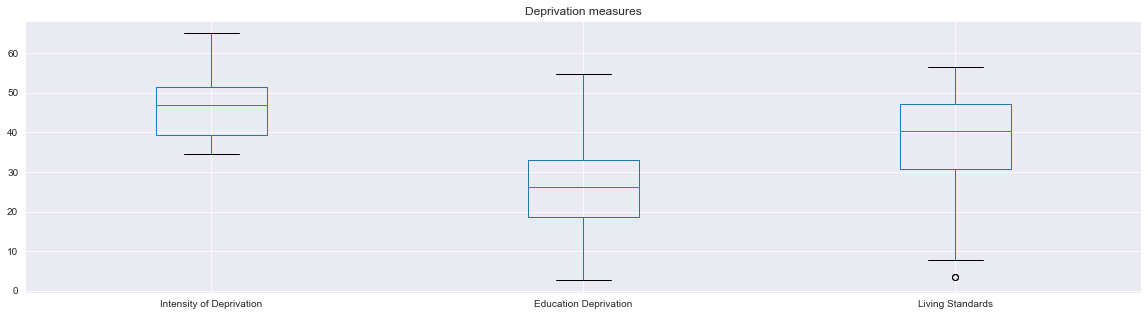

In [173]:
# Construct boxplots to distribution of deprivation measures per country
# Overall MPI data
mpi[['Intensity of Deprivation','Education Deprivation', 'Living Standards']].plot(kind = 'box')
plt.title('Deprivation measures')

Text(0.5, 1.0, 'Percent of Population in Poverty')

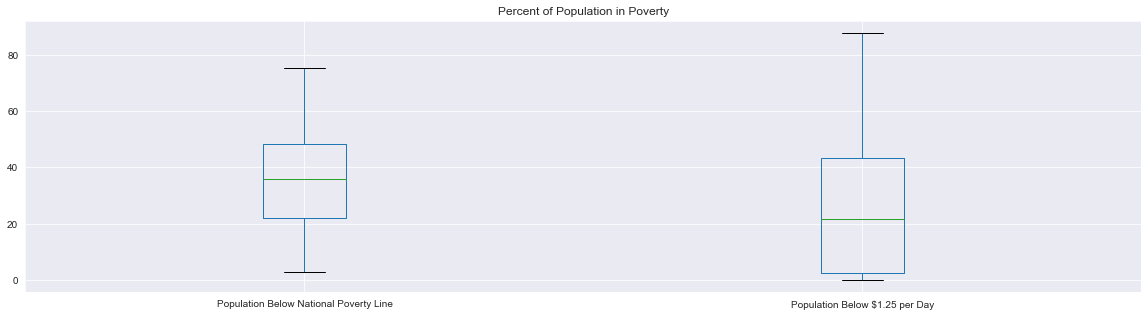

In [174]:
# Construct boxplots to show distribution of percent of population in poverty per country
# Overall MPI data
mpi[['Population Below National Poverty Line','Population Below $1.25 per Day']].plot(kind = 'box')
plt.title('Percent of Population in Poverty')

LEVEL DATA

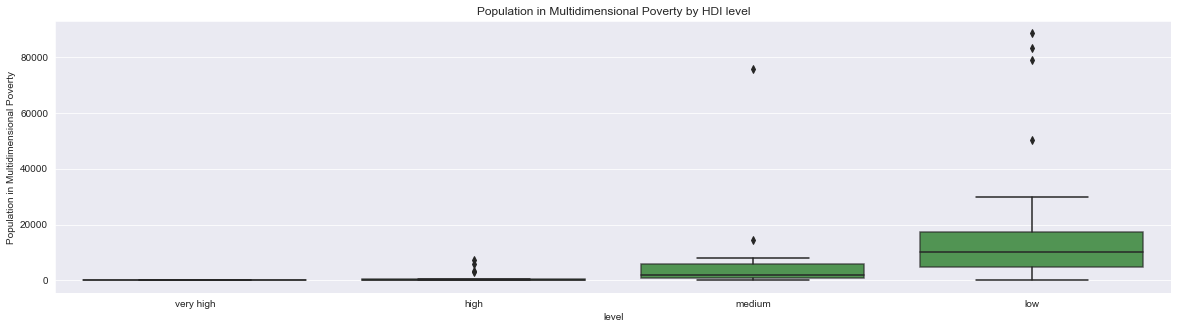

In [175]:
# Create graph with boxplot that compares population in multidim poverty per country by hdi level
ax = sns.boxplot(x="level", y='Population in Multidimensional Poverty',data=new, color = 'g', boxprops=dict(alpha=.7))
# Add title
plt.title('Population in Multidimensional Poverty by HDI level')
# Show plot
plt.show()

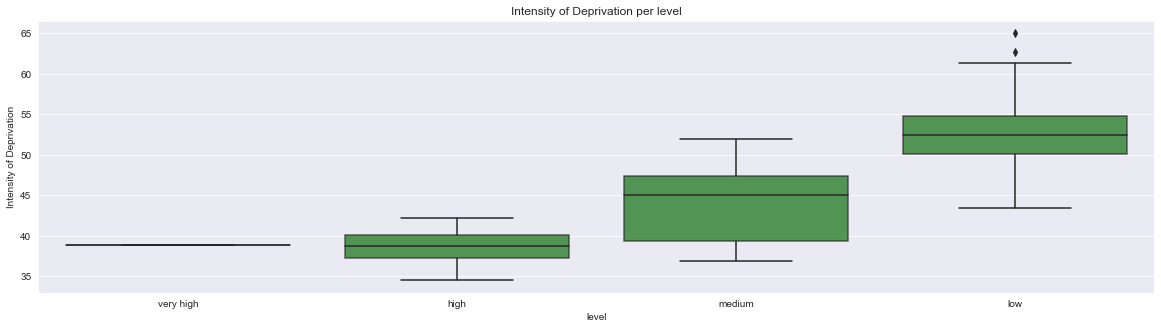

In [176]:
# Create graph with boxplot that compares Intensity of Deprivation per country by hdi level
ax = sns.boxplot(x="level", y='Intensity of Deprivation',data=mpi, color = 'g', boxprops=dict(alpha=.7))
# Add title
plt.title('Intensity of Deprivation per level')
# Show plot
plt.show()

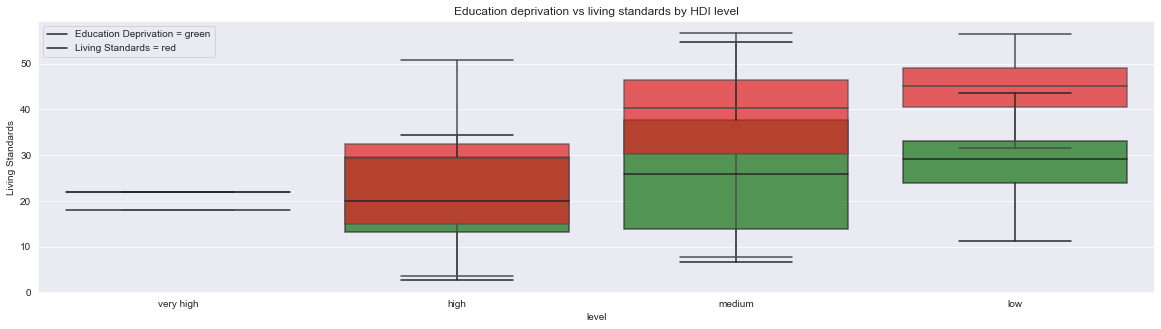

In [177]:
# Create graph with boxplot that compares education deprivation and living standards per country by hdi level
# Creat boxplot for education deprivation by HDI level
ax = sns.boxplot(x="level", y='Education Deprivation',data=mpi, color = 'g', boxprops=dict(alpha=.7))
# Create boxplot for living standards by HDI level
ax = sns.boxplot(x="level", y='Living Standards',data=mpi, color = 'r', boxprops=dict(alpha=.7))

# Add title and legend
plt.title('Education deprivation vs living standards by HDI level')
plt.legend(labels = ['Education Deprivation = green', 'Living Standards = red'])

# Show plot
plt.show()

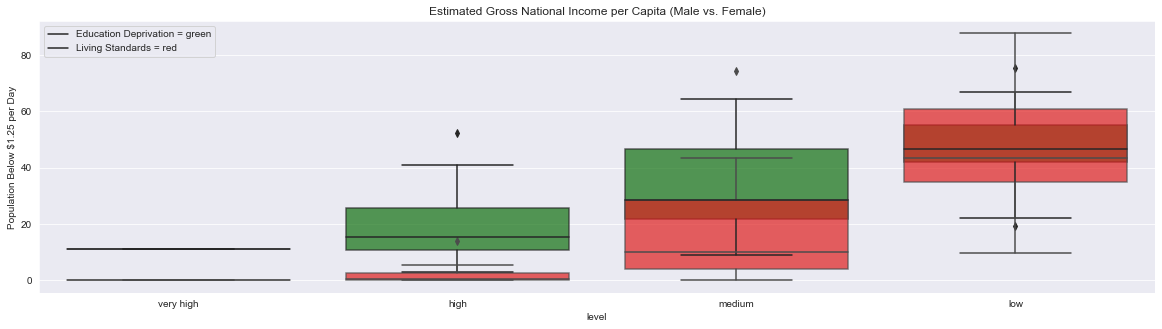

In [178]:
# Create graph with boxplot that compares pop below national poverty line and pop below $1.25/day per country by hdi level
# Creat boxplot for pop below national poverty line per country by HDI level
ax = sns.boxplot(x="level", y='Population Below National Poverty Line',data=mpi, color = 'g', boxprops=dict(alpha=.7))
# Creat boxplot for pop below $1.25/day per country by HDI level
ax = sns.boxplot(x="level", y='Population Below $1.25 per Day',data=mpi, color = 'r', boxprops=dict(alpha=.7))

# Add title and legend
plt.title('Estimated Gross National Income per Capita (Male vs. Female)')
plt.legend(labels = ['Education Deprivation = green', 'Living Standards = red'])

# Show plot
plt.show()

# Inferantial Stats on MPI

____________________________________________________________________________________________________________________________

SCATTERPLOTS

____________________________________________________________________________________________________________________________

OVERALL

[Text(0.5, 1.0, 'Education Deprivation Vs. Income Index')]

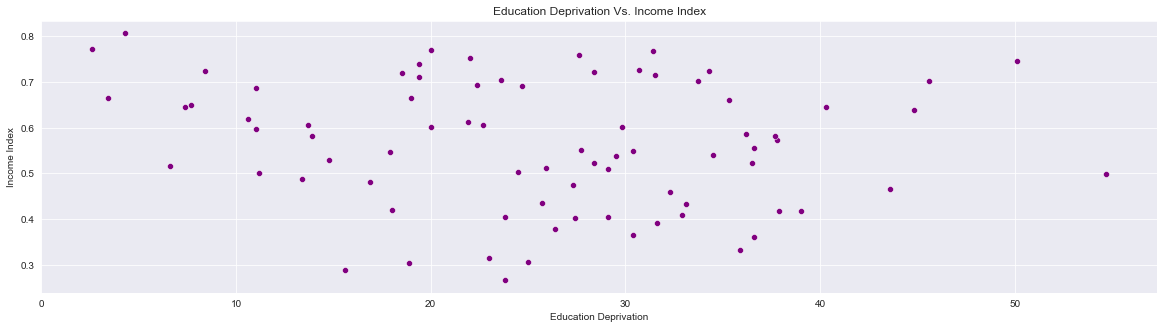

In [179]:
# Scatter plot for Education deprivation vs income index
sns.scatterplot(x = 'Education Deprivation', y = 'Income Index', data = mpi, 
                color = 'purple').set(title = 'Education Deprivation Vs. Income Index')

[Text(0.5, 1.0, 'Education Vs. Intensity of Deprivation')]

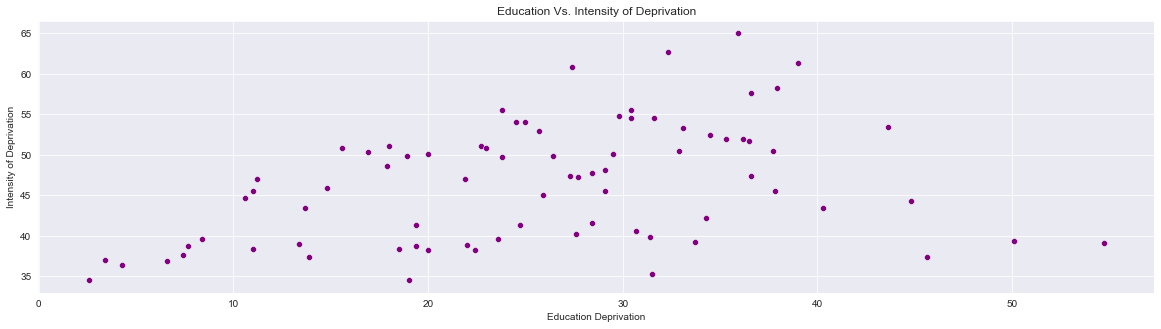

In [180]:
# Scatter plot for Education deprivation vs intensity of deprivation
sns.scatterplot(x = 'Education Deprivation', y = 'Intensity of Deprivation', data = mpi, 
                color = 'purple').set(title = 'Education Vs. Intensity of Deprivation')

[Text(0.5, 1.0, 'Education Index Vs. Intensity of Deprivation')]

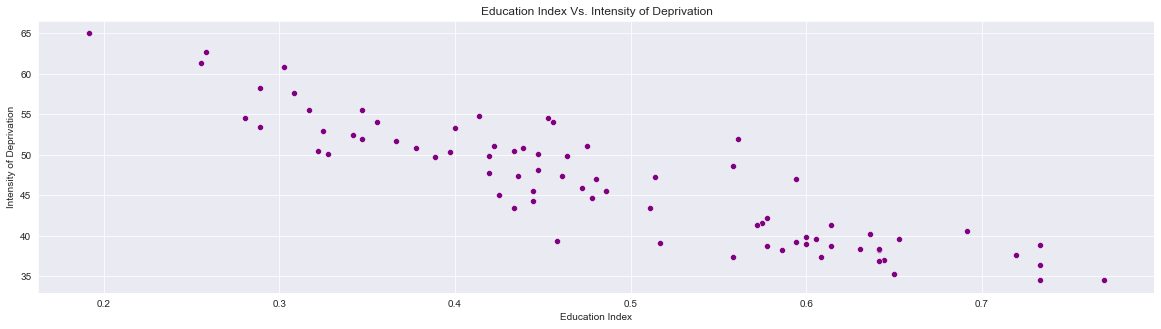

In [181]:
# Scatter plot for Education index vs intensity of deprivation
sns.scatterplot(x = 'Education Index', y = 'Intensity of Deprivation', data = mpi, 
                color = 'purple').set(title = 'Education Index Vs. Intensity of Deprivation')

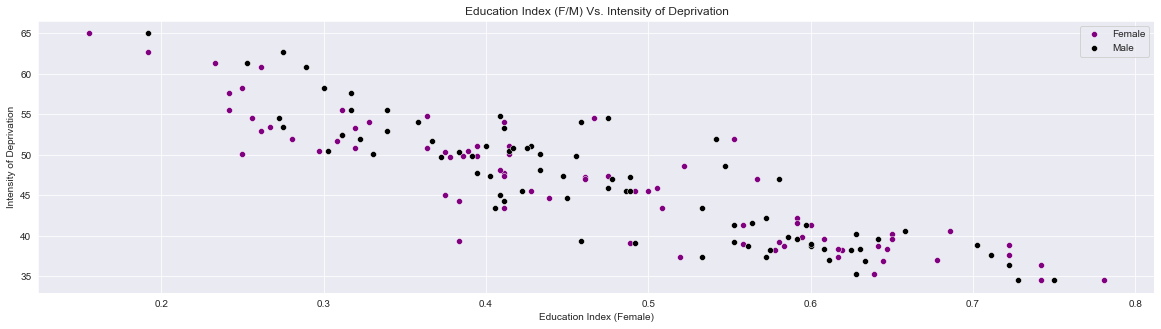

In [182]:
# Scatter plot for Education Index (female) vs intensity of deprivation
sns.scatterplot(x = 'Education Index (Female)', y = 'Intensity of Deprivation', data = mpi, 
                color = 'purple').set(title = 'Education Index (F/M) Vs. Intensity of Deprivation')
# Scatter plot for Education Index (male) vs intensity of deprivation
sns.scatterplot(x = 'Education Index (Male)', y = 'Intensity of Deprivation', data = mpi, 
                color = 'black')

# Add legend
plt.legend(labels = ['Female', 'Male'])

____________________________________________________________________________________________________________________________

HEATMAPS

____________________________________________________________________________________________________________________________

<AxesSubplot:>

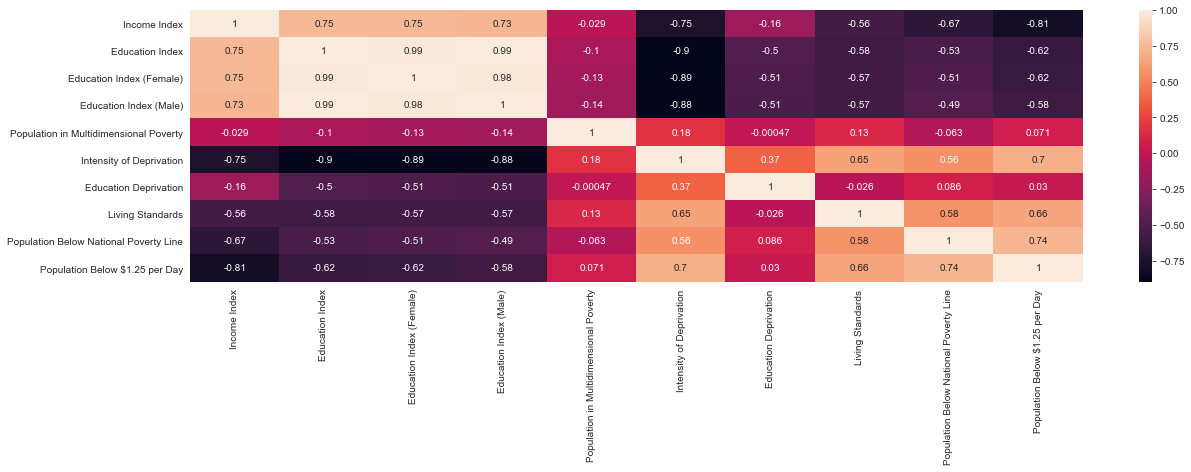

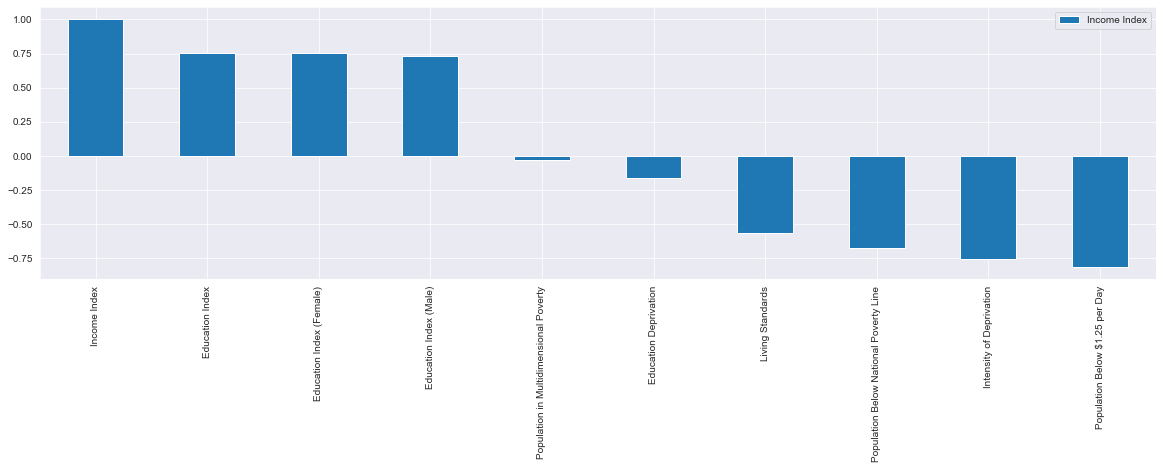

In [60]:
# Overall MPI
# Find Correlations between values we are interested in using heat map
correlated_mpi = mpi[mpi_interest].corr()
# Generate heatmap
sns.heatmap(correlated_mpi, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_mpi.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

HDI LEVELS

____________________________________________________________________________________________________________________________

REGRESSION MODELS

____________________________________________________________________________________________________________________________

In [183]:
# mpi df
# Find regression model between independent and dependent variables as noted above
independent_variables = mpi[['Education Index', 'Education Index (Female)', 'Education Index (Male)']]
dependent_variables = mpi['Population in Multidimensional Poverty']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Population in Multidimensional Poverty   R-squared:                       0.141
Model:                                                OLS   Adj. R-squared:                  0.106
Method:                                     Least Squares   F-statistic:                     4.044
Date:                                    Wed, 15 Dec 2021   Prob (F-statistic):             0.0102
Time:                                            16:50:33   Log-Likelihood:                -977.56
No. Observations:                                      78   AIC:                             1963.
Df Residuals:                                          74   BIC:                             1973.
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

In [184]:
# mpi df
# Find regression model between independent and dependent variables as noted above
independent_variables = mpi[['Education Index', 'Education Index (Female)', 'Education Index (Male)']]
dependent_variables = mpi['Living Standards']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Living Standards   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     13.46
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.23e-07
Time:                        16:50:35   Log-Likelihood:                -296.54
No. Observations:                  78   AIC:                             601.1
Df Residuals:                      74   BIC:                             610.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [185]:
# mpi df
# Find regression model between independent and dependent variables as noted above
independent_variables = mpi[['Education Index', 'Education Index (Female)', 'Education Index (Male)']]
dependent_variables = mpi['Population Below National Poverty Line']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Population Below National Poverty Line   R-squared:                       0.410
Model:                                                OLS   Adj. R-squared:                  0.387
Method:                                     Least Squares   F-statistic:                     17.17
Date:                                    Wed, 15 Dec 2021   Prob (F-statistic):           1.46e-08
Time:                                            16:50:36   Log-Likelihood:                -315.22
No. Observations:                                      78   AIC:                             638.4
Df Residuals:                                          74   BIC:                             647.9
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

In [186]:
# mpi df
# Find regression model between independent and dependent variables as noted above
independent_variables = mpi[['Education Index', 'Education Index (Female)', 'Education Index (Male)']]
dependent_variables = mpi['Population Below $1.25 per Day']

independent_variables = sm.add_constant(independent_variables)

# Use OLS method to calculate regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit()

print(regression_model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Population Below $1.25 per Day   R-squared:                       0.456
Model:                                        OLS   Adj. R-squared:                  0.434
Method:                             Least Squares   F-statistic:                     20.70
Date:                            Wed, 15 Dec 2021   Prob (F-statistic):           7.67e-10
Time:                                    16:50:38   Log-Likelihood:                -338.54
No. Observations:                              78   AIC:                             685.1
Df Residuals:                                  74   BIC:                             694.5
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.97

____________________________________________________________________________________________________________________________

HEATMAPS

____________________________________________________________________________________________________________________________

LEVEL DATA


<AxesSubplot:>

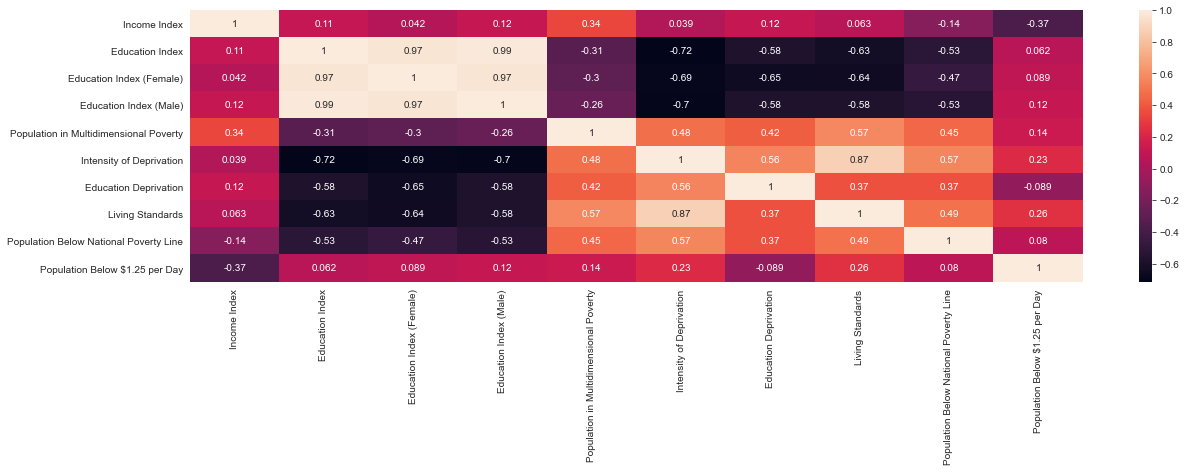

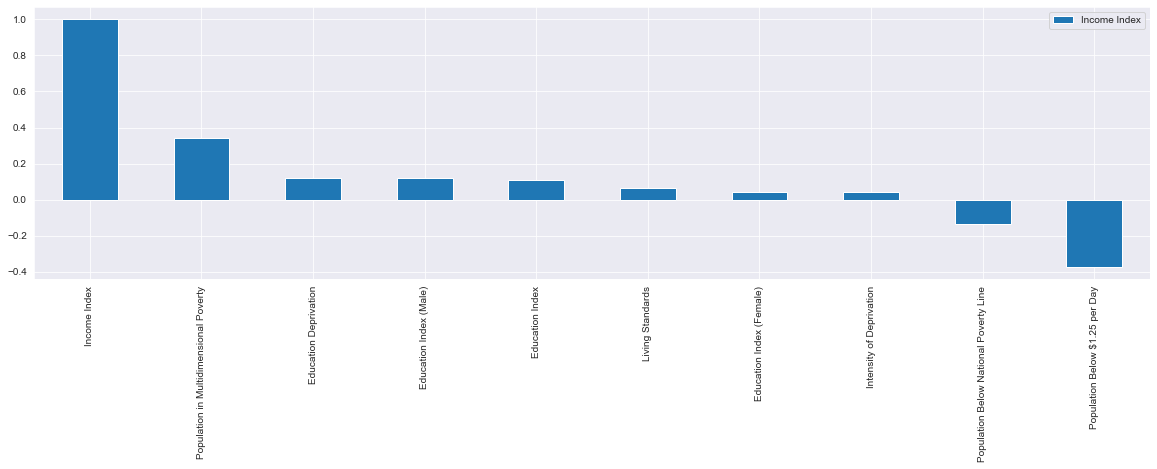

In [256]:
# high_mpi
# Find Correlations between values we are interested in using heat map
correlated_h_mpi = high_mpi[mpi_interest].corr()
# Generate heatmap
sns.heatmap(correlated_h_mpi, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_h_mpi.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

<AxesSubplot:>

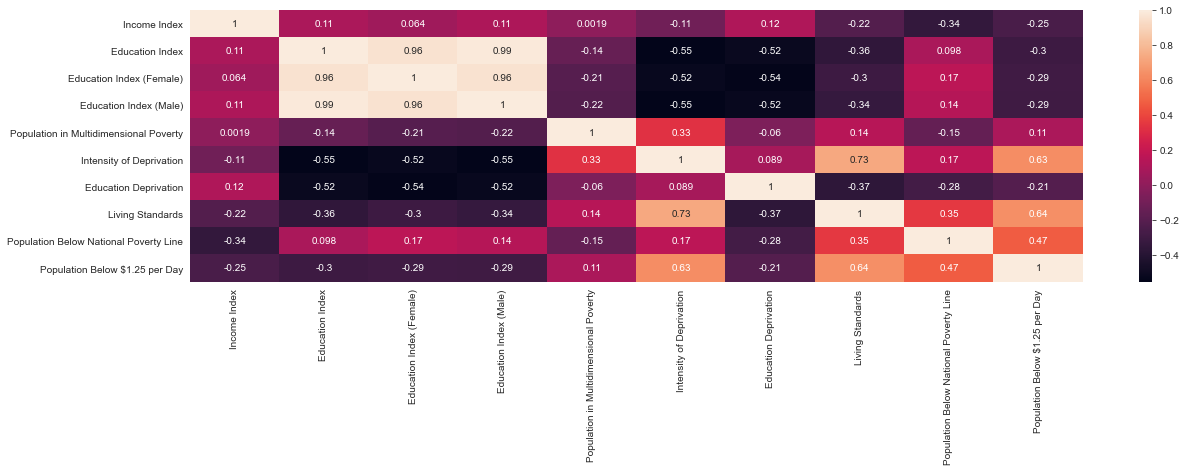

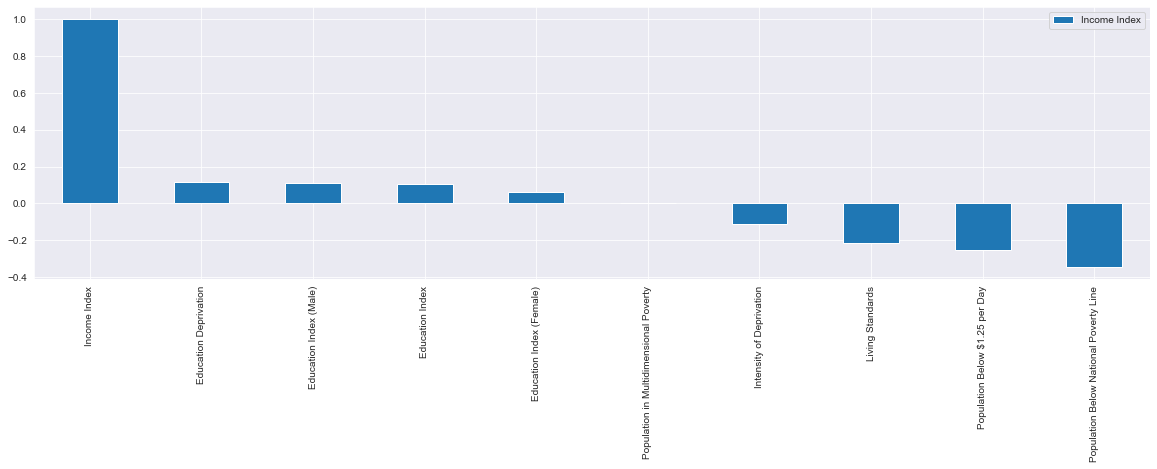

In [257]:
# medium_mpi
# Find Correlations between values we are interested in using heat map
correlated_m_mpi = medium_mpi[mpi_interest].corr()
# Generate heatmap
sns.heatmap(correlated_m_mpi, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_m_mpi.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

<AxesSubplot:>

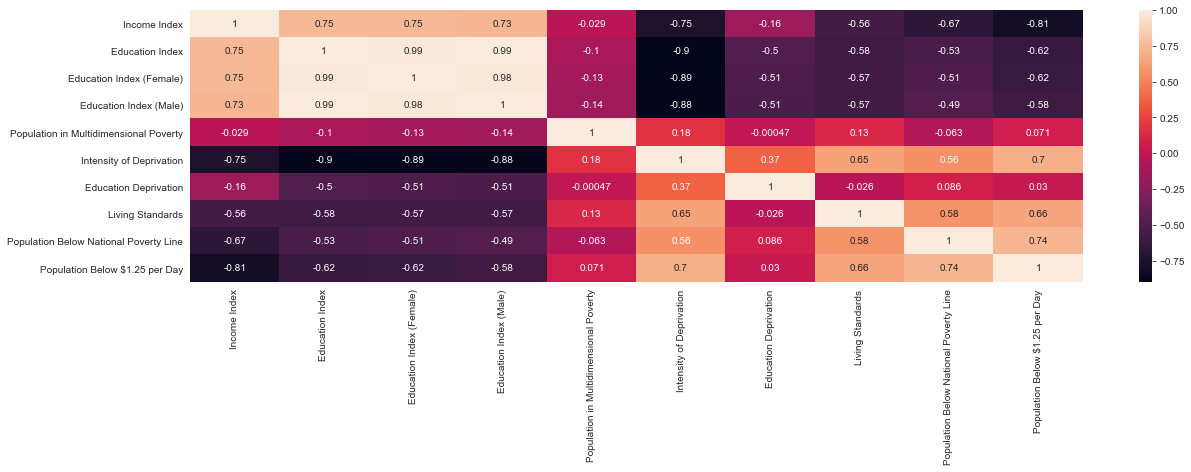

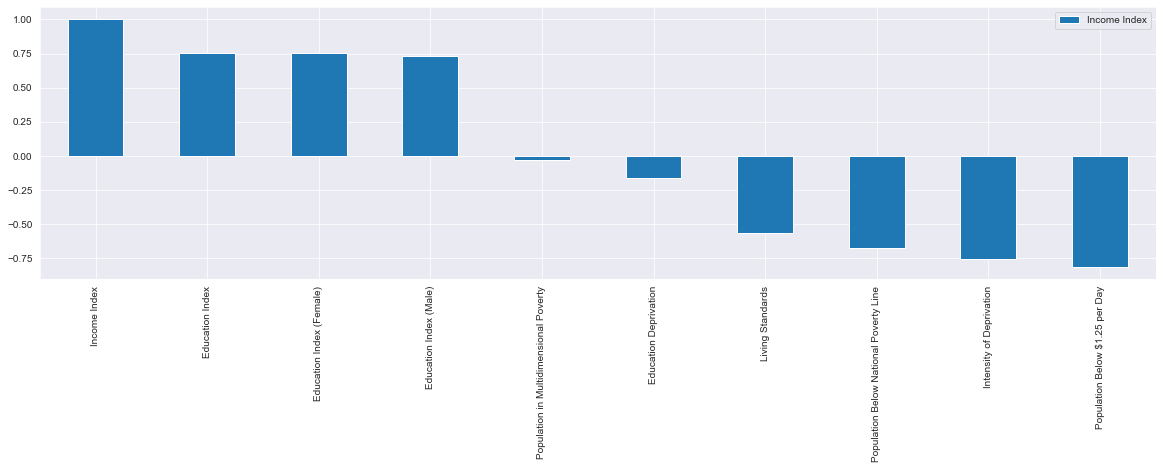

In [258]:
# low_mpi
# Find Correlations between values we are interested in using heat map
correlated_mpi = mpi[mpi_interest].corr()
# Generate heatmap
sns.heatmap(correlated_mpi, annot = True)

# make df of correlated values for Income Index
sorted_correlated_df = correlated_mpi.sort_values('Income Index', ascending = False)

# Create bar plots to see correlations with income index 
sorted_correlated_df.plot(kind ='bar', y = 'Income Index')

# Insights

This is where my insights will be shown

## HDI Insights

Overall HDI data

Descriptive Stats:

For overall HDI data, Income index had the highest spread of all indexes being measures (HDI, Education Index (EI), and Income Index (II)). EI had the lowest upper limit and the lowest lower limit. The mean for HDI and II were about equal. HDI had the smallest spread.

Overall, expected years of education was significantly higher than the average years of education, indicating that many people are either unable or unwilling to complete the expected levels of education within their respective countries. 

Overall, GNI contains the most outliers which only occur above the upper whisker. Countries with the highest GNIs far exceed the rest of the world. 

Inferental Stats:

It can be observed from the scatter plots that as EI increases, II increases as well. Additionally, as EI increases, GNI looks to have a logrithmic relationship but EI seems to loose influence over GNI around $40000

The regression models: EI could be a potential indicator of II and (less so) for GNI per capita.


_______________________________________________________________________________________________________________________________-

HDI level data

Descriptive Stats:
The levels each contain over 19 values (10 percent of the population) which allows us to conduct analysis on each level. The mean and median for EI and II decreases by 0.1 between very high and high levels and then by 0.2 afterward. The EI and II spead for each level reaches into the level above and below it. 

Inferential Stats: 
When countries are seperated into HDI levels, the data does not form any shape. EI vs II become clusters with not signs of being influencial over the other. None of the regression models done on each level df have a P-value low enough to reject the null. Therefore, on a level basis, we cannot assume that EI has an influence over II. 

______________________________________________________________________________________________________________________________

What does that mean for the HDI dataframe as a whole? 

For HDI overall, EI could potentially have influence over II when looking at all the data, ungrouped, but on an HDI level basis, it cannot be determined if EI has influence over II. 

## GDI Insights

Overall HDI data

Descriptive Stats:

Overall GDI Descriptive Data:

Expected years of education is basically equal for men and women with no skew. Mean years of education is slightly more for men and skewed to the right for females. GNI is significantly different between sexes with males having double the mean and median for females. both are skewed to the left. Education indexes are the same for mean and median, but the income index is 0.1 smaller for females.

Boxplots show that EI has the highest spread, which II has the smallest spread. HDI and II have around same median. EI has lowest whisker. EI (F) has large spread than ED (M) and upper whisker goes higher. Median for F is about same as overall EI median. M is slightly lower. Although, II (F) has smallest spread and has lowest upper and lower whisker. Male II foes above II. 
EYoE (F) has a larger spread then M and has a higher median. For MYoE, M has a higher whisker and shorter lower whisker. 
GNI (F) is very small compared to the GNI (M). The lower 50% of GNI (M/F) is very short compared to the upper half.

Inferental Stats:

When EI (F/M) is plotted against II, both show possible trend where when EI (F/M) increaes, so does II. Same trends seen in HDI repeat for GNI for both F & M. Within the regression moddels, EI (F) meets requirements to reject null, so prediction column is made and plotted. EI(M) does not have a small enough P-value to allw for the null hypothesis to be rejected. 



______________________________________________________________________________________________________________________________

HDI level data

Descriptive Stats:

very high: expected years of education is one year less for females, but mean years is the same. GNI is still halved for females, but less skewed. Skewed to the left for males. EI higher for females, but II is 0.1 less for females.

high: EYoE is 0.5 years higher for females, but 2 years lower than vh. MYoE is 2 less than vh and 0.3 years shorter for females. GNI for females is again halved compared to male GNI and half of female GNI for vh. EI still higher for females, but II is 0.1 less for females. Both ~ 0.2 smaller than vh.

medium: EYoE 3 years shorter for M & F, about same within level. MYoE 2 years shorter, 1 year shorter for F within m. Again, GNI is halved for both M & F. F, F is hald compared to M in m. EI now smaller for F than M by small amount and same differences with II (also 0.1 smaller than h)

low:1 year shorter for M than in m, F 1.5 years shorter than M in l. MYoE is 2-3 years shorter for F within l, and 3-4 years shorter than m. GNI more than halved for F & M compared to m, F GNI only $500 lower than M. EI for F slightly smaller than M. II 0.1-0.05 smaller but 0.2 smaller than m.

Boxplots: In EI , the upper levels of Q3 for EI(F) stay above EI(M) until reach low level HDI. II, GNI(M) stays above GNI(F). Q3 of GNI(F) does not reach Q2 GNI(M) until HDI level is medium, but GNI(F) is significantly smaller for all levels.   

Inferential Stats: 

Again, when grouped by HDI levels, scatterplots do not reveal any strong trends between EI(F/M) and II. The same goes for Ei(F/M) and GNI. All regression models made with EI(F) being independent variable do not allow us to reject the null. On a level basis it does not appear that there is a strong influence between EI(F) and II or GNI.


______________________________________________________________________________________________________________________________

What does that mean for the GDI dataframe as a whole? 

For GDI overall, EI(F) could potentially have influence over II when looking at all the data, but on an HDI level basis, it cannot be determined if EI(F) has influence over II. 

## GII Insights

Overall GII data

Descriptive Stats:

Overall GII Descriptive Data:

Population with Secondary Education (second) (F) is ~5% lower than M. F skewed slightly to the right. Labour Force Participation Rate (Labour) 9F) is 20% lower than M on average with no skew.

Boxplots: second(F) has larger spread, medians are about the same. Upper 50% of both looks similar is size, but second(F) has larger spread in bottom 50%. Laubor (M) has a very small spread with one outlier below the lower whisker. Labour (F) has a large spread with a few outliers below lower whiskers. Individually, they seem to have an even spread, except that labour (M) has a slightly long upper whisker. 


Inferental Stats:

Second(F) vs Labour(F) does not appear to have any strong trends when looking at the scatter plots. Second(F) and II do seem to have a trend, when one increase so does the other. The same goes for Second(M) and II. EI does not appear to have much influence over Labour(F). 

Within the regression models, Second(F) and Labour(F) both have p-values low enough to reject the null, second(M) and Labour(M) do not have low enough p-values. Suggesting that female ability to gain secondary education and female participation in the workforce have a stronger influence over II than male secondary education and II. Second(F) also appears to have a potential influence over GNI since the p-value is low enough to reject the null. 

_______________________________________________________________________________________________________________________________

GII level data

Descriptive Stats:

vh = second (F) is 30% higher than overall mean, second (M) is 25% hgiher, skewed to the right. Labour(F) is similar to overall, Labour(M) is 5% smaller.

h = second (F) is 10% higher than overall mean and skewed to the left, second (M) is 5% hgiher than overall mean, no skew. Labour(F) is 5% smaller, Labour(M) same as overall(M).

m = second(F) is 10-15% smaller with harsh left skew. second(M) ~ 10% smaller than overall(M) with skew to left. Labour(F) is slightly smaller than overall(F). Labour(M) is slightly higher than overall(M)

l = second(F) is almost nonexistant at only 10% of the population. second(M) ~ 40% smaller than overall(M) with slight skew to right. Labour(F) is 10% higher than overall(F) with slight skew to right. Labour(M) is slightly higher than overall(M)

Boxplots: Second boxplots seem relatively equal until medium level when second(F) begins to drop below M/ Upper Q3 for F does not reach median for second M. The labour boxplots show the laboutF stays below labour M. Upper whisker for F reaches median for M and Q3 makes it into Q2 for M in low level. 

Inferential Stats: 

Again, all scatterplots appear as random clusters within each level. Unable to reject null for very high, high, and medium levels. At low levelsecond(F) and labour (F) have low enough p-values to generate prediction models.

______________________________________________________________________________________________________________________________

What does that mean for the GDI dataframe as a whole? 

For GII overall, second(F) could potentially have influence over II and GNI when looking at all the data same for Second (F) and II, but on an HDI level basis, it cannot be determined if second(F) or labour(F) has influence over II. 

## MPI Insights

Overall MPI data

Descriptive Stats:

Overall MPI Descriptive Data:

None of the values are skewed. 


Inferental Stats:

There appeared to be a trend between EI and Intensity of deprivation, and EI(F) and Intensity of deprivation. But, the regression models showed very low R-squared values and high p-values for models between EI, EI(F) and EI(M) and the poverty dimensions given in the dataset.

_______________________________________________________________________________________________________________________________

HDI level data

Descriptive Stats:

vh = Could not calculate anything for very_high level because did not meet requirments for n

h = Pop in Multi Poverty (PMP) is about 50% smaller than overall average. Intensity of deprivation (ID) is ~ 10% less than overall. Education deprivation (ED) is 5% less, pop below national poverty line (PBNPL) is half of overall. and pop below $1.25 per day (PD) is 25% less. 

m = PMP is almost double overall. ID is slightly smaller. ED is slightly higher. LS is the same. PBNPL is slightly lower. PD is 10% lower. 

l = PMP is the same as overall. ID is 10% higher. ED is the same as m. LS is almost 10% higher.PBNPL is over 10% higher. PD is almost double



Inferential Stats: 

Similar observations on a HDI level scale. 


______________________________________________________________________________________________________________________________

What does that mean for the MPI dataframe as a whole? 

At very high levels of poverty, education inequality appears to have less of an influence over poverty conditions. Education seems to have some sway, but that is not what our hypothesis is asking for. 

## Overall Insights

Education index does have an influence over a countries economic potential. When drilling down further, there is evidence that the more educated the female population is, the better the country does according to Income index and in some cases GNI per capita. Secondary education within female population shows similar trends, but when looking at countries in intense poverty, education inequalities seem to have less of an impact on economic potential for the country. 